In [655]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas_profiling as pp

In [830]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')

In [831]:
#renaming train columns for easy identification of features
train.columns=['Applicant_ID','Creditworthiness score','riskiness_of_credit','Loan_Severity','Auto_loan_Severity',
               'Edu_loan_Severity','Min_credit_after_debt','Max_credit_available','Max_credit_after_debt',
               'Sum_avacredit_missed','Total_amo_credit_ava','The_amount_of_dues>500','Sum_amount_due_a_card',
               
               'Annual_amount_paid_preyear','Annual_income','Tproperty_market_value','Num_CC_automatically_renewed_as_debts_is_payed',
               'Num_CC_wchich_full_CL_is_utl','Num_CCL_wchich_full_CL_is_utl','Num_of_active_CC_75%_CL_is_utl',
               'Num_of_active_CCL_75%_CL_is_utl',' Avr_utl_of_active_revolving_CC_loans','Avr_utL_active_CL_activated_in_last_2_years',
               'Avr_utL_active_CC_activated_in_last_1_years','Avr_utL_active_CC_payment_missed_in_last6mon',
               
               'Avr_tenure_of_active_revolving_credit_cards(in_days)','Tenure_of_oldest_CC_among_all_act_CC(indays)',
               ' Tenure_of_oldest_revolving_CC_all_active _revolving_CC(indays)','Num_days_Last_mis_payment_CL','Oldest_CC_Tenure','Auto_loan_max_Tenure',
               'Edu_Loan_max_Tenure','Sum_of_tenures(inmonths)of_active_CC','Sum_of_tenures(inmonths)of_active_CC(1)',
               'Num_of_Active_CL_last_6_months_mis_1_payment','Num_of_Active_CC_last_2yrs_mis_1_payment','Num_active_CL',
               
              'Num_CC_tenure_of_at_least_2_years','Num_CC_tenure_least_2_yrs','Num_CL_with_current_delinquency','Utl_active_edu_loans','Utl_active_auto_loans',
              'FSI_borrower','Num_of_CL_never_mis_a_payment_last_2_years(high-risk loans)','Ratio_of_the_maximum_amount_CL_and_Sum_active_CL',
               'Number_of_mortgage_loans_which_borrower_has_missed_2_payments','Num_auto_loans_on_which_the_borrower_has_missed_2_payments',
              'Type_of_product','Undefined_Var','Undefined_Var(1)','Ratio_min_amount_CL_and_sum_of-amounts due_active_CL',
              'default_status']


#renaming test columns



test.columns=['Applicant_ID','Creditworthiness score','riskiness_of_credit','Loan_Severity','Auto_loan_Severity',
               'Edu_loan_Severity','Min_credit_after_debt','Max_credit_available','Max_credit_after_debt',
               'Sum_avacredit_missed','Total_amo_credit_ava','The_amount_of_dues>500','Sum_amount_due_a_card',
              
               'Annual_amount_paid_preyear','Annual_income','Tproperty_market_value','Num_CC_automatically_renewed_as_debts_is_payed',
               'Num_CC_wchich_full_CL_is_utl','Num_CCL_wchich_full_CL_is_utl','Num_of_active_CC_75%_CL_is_utl',
               'Num_of_active_CCL_75%_CL_is_utl',' Avr_utl_of_active_revolving_CC_loans','Avr_utL_active_CL_activated_in_last_2_years',
               'Avr_utL_active_CC_activated_in_last_1_years','Avr_utL_active_CC_payment_missed_in_last6mon',
              
               'Avr_tenure_of_active_revolving_credit_cards(in_days)','Tenure_of_oldest_CC_among_all_act_CC(indays)',
               ' Tenure_of_oldest_revolving_CC_all_active _revolving_CC(indays)','Num_days_Last_mis_payment_CL','Oldest_CC_Tenure','Auto_loan_max_Tenure',
               'Edu_Loan_max_Tenure','Sum_of_tenures(inmonths)of_active_CC','Sum_of_tenures(inmonths)of_active_CC(1)',
               'Num_of_Active_CL_last_6_months_mis_1_payment','Num_of_Active_CC_last_2yrs_mis_1_payment','Num_active_CL',
              
              'Num_CC_tenure_of_at_least_2_years','Num_CC_tenure_least_2_yrs','Num_CL_with_current_delinquency','Utl_active_edu_loans','Utl_active_auto_loans',
              'FSI_borrower','Num_of_CL_never_mis_a_payment_last_2_years(high-risk loans)','Ratio_of_the_maximum_amount_CL_and_Sum_active_CL',
               'Number_of_mortgage_loans_which_borrower_has_missed_2_payments','Num_auto_loans_on_which_the_borrower_has_missed_2_payments',
              'Type_of_product','Undefined_Var','Undefined_Var(1)','Ratio_min_amount_CL_and_sum_of-amounts due_active_CL']

In [832]:
train.fillna(value=-999,axis=1,inplace=True)
test.fillna(value=-999,axis=1,inplace=True)

In [833]:

col=train[['Type_of_product','default_status']]
coll=pd.get_dummies(col,drop_first=True)
colt=test['Type_of_product']
coltt=pd.get_dummies(colt,drop_first=True)

In [834]:
train.drop('default_status',axis=1,inplace=True)
train.drop('Type_of_product',axis=1,inplace=True)
test.drop('Type_of_product',axis=1,inplace=True)

In [835]:
coltt.rename(columns = {'lending':'Type_of_product_lending'},inplace=True)

In [836]:
train.drop('Applicant_ID',axis=1,inplace=True)
test.drop('Applicant_ID',axis=1,inplace=True)

In [837]:
trainning=train
testing=test
trainning=pd.concat([trainning,coll],axis=1)
testing=pd.concat([testing,coltt],axis=1)

In [841]:
from sklearn.model_selection import train_test_split
X=trainning.drop('default_status_yes',axis=1)
y=trainning['default_status_yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

              precision    recall  f1-score   support

           0       0.83      0.93      0.88     12745
           1       0.66      0.41      0.51      4055

    accuracy                           0.81     16800
   macro avg       0.75      0.67      0.69     16800
weighted avg       0.79      0.81      0.79     16800

[[11906   839]
 [ 2398  1657]]
0.8073214285714285
0.6714007911034959


Text(0.5, 0, 'Relative Importance')

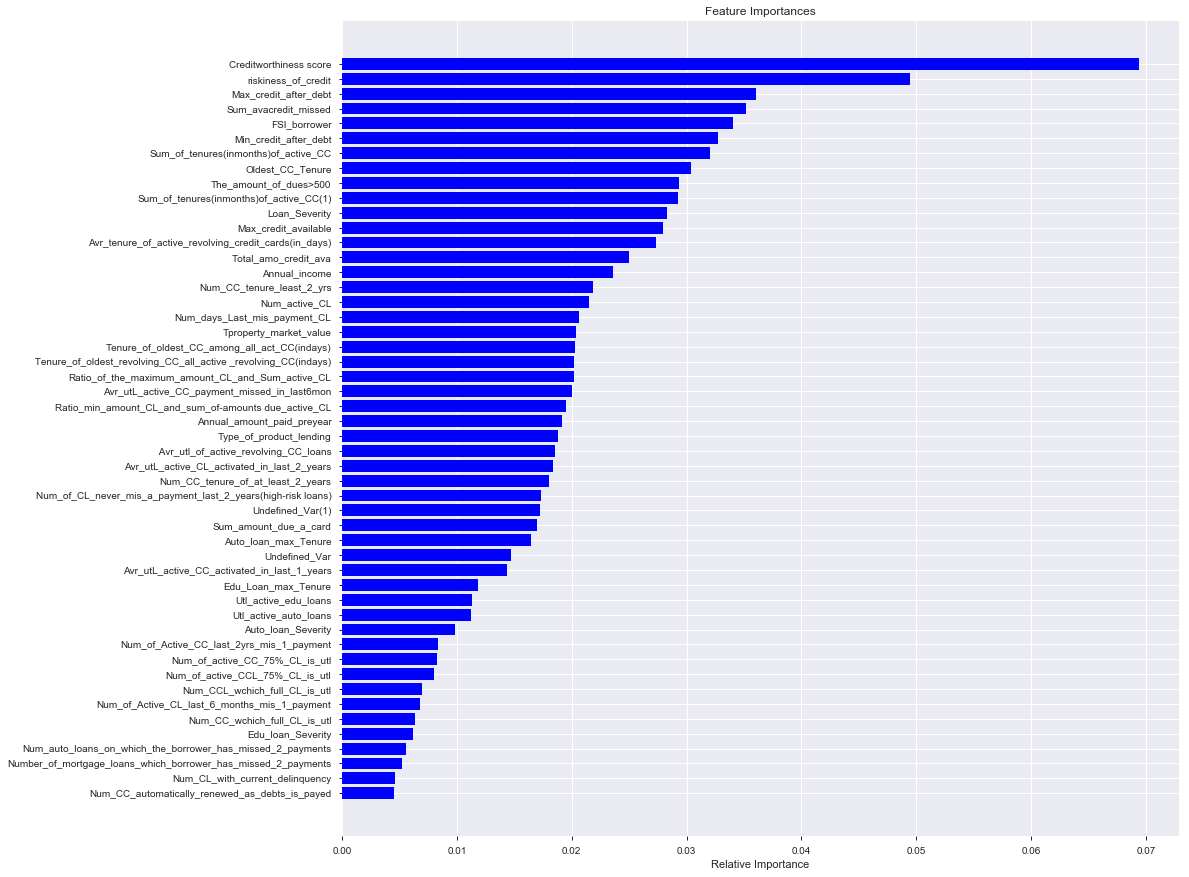

In [413]:
randomf=RandomForestClassifier()
randomf.fit(X_train,y_train)
randompre=randomf.predict(X_test)
print(classification_report(y_test,randompre))
print(confusion_matrix(y_test, randompre))
print(accuracy_score(y_test,randompre))
print(roc_auc_score(y_test,randompre))
importances = randomf.feature_importances_
indices = np.argsort(importances)
features = trainning.columns
plt.figure(figsize=(15,15))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [838]:
#creating more features from the top 2 important ones we have and refitting x and y
trainning['Creditwscore-risk']=trainning['Creditworthiness score'] - trainning['riskiness_of_credit']
trainning['Creditwscore+risk']=trainning['Creditworthiness score'] + trainning['riskiness_of_credit']
trainning['Creditwscore*risk']=trainning['Creditworthiness score'] * trainning['riskiness_of_credit']
trainning['Creditwscore/risk']=trainning['Creditworthiness score'] / trainning['riskiness_of_credit']

trainning['riskiness_of_credit+max_credit']=trainning['riskiness_of_credit'] - trainning['Max_credit_after_debt']
trainning['riskiness_of_credit-max_credit']=trainning['riskiness_of_credit'] + trainning['Max_credit_after_debt']
trainning['riskiness_of_credit*max_credit']=trainning['riskiness_of_credit'] * trainning['Max_credit_after_debt']
trainning['riskiness_of_credit/max_credit']=trainning['riskiness_of_credit'] / trainning['Max_credit_after_debt']






testing['Creditwscore-risk']=testing['Creditworthiness score'] - testing['riskiness_of_credit']
testing['Creditwscore+risk']=testing['Creditworthiness score'] + testing['riskiness_of_credit']
testing['Creditwscore*risk']=testing['Creditworthiness score'] * testing['riskiness_of_credit']
testing['Creditwscore/risk']=testing['Creditworthiness score'] / testing['riskiness_of_credit']

testing['riskiness_of_credit+max_credit']=testing['riskiness_of_credit'] - testing['Max_credit_after_debt']
testing['riskiness_of_credit-max_credit']=testing['riskiness_of_credit'] + testing['Max_credit_after_debt']
testing['riskiness_of_credit*max_credit']=testing['riskiness_of_credit'] * testing['Max_credit_after_debt']
testing['riskiness_of_credit/max_credit']=testing['riskiness_of_credit'] / testing['Max_credit_after_debt']




In [839]:
trainning.head(5)
#trainning['Sum_of_tenures(inmonths)of_active_CC(1)'].value_counts()

,Creditworthiness score,riskiness_of_credit,Loan_Severity,Auto_loan_Severity,Edu_loan_Severity,Min_credit_after_debt,Max_credit_available,Max_credit_after_debt,Sum_avacredit_missed,Total_amo_credit_ava,...,Type_of_product_lending,default_status_yes,Creditwscore-risk,Creditwscore+risk,Creditwscore*risk,Creditwscore/risk,riskiness_of_credit+max_credit,riskiness_of_credit-max_credit,riskiness_of_credit*max_credit,riskiness_of_credit/max_credit
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,0,0,3435.71495,3436.28505,979.4318,12054.025610,-252071.71495,252072.28505,71853.12360,1.130828e-06
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,0,0,3455.32600,3456.67400,2329.3440,5127.596439,-497530.32600,497531.67400,335335.89400,1.354689e-06
2,3276.0,0.53845,3.1510,0.0,6.282,-999.0,956940.0,-999.0,192944.0,1079864.0,...,0,1,3275.46155,3276.53845,1763.9622,6084.130374,999.53845,-998.46155,-537.91155,-5.389890e-04
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,0,0,3371.82995,3372.17005,573.4086,19829.461923,-385498.82995,385499.17005,65554.10495,4.411166e-07
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,...,0,0,3369.22730,3370.77270,2603.9990,4361.330400,-214727.22730,214728.77270,165920.32560,3.598506e-06


In [840]:
testing.head(5)

,Creditworthiness score,riskiness_of_credit,Loan_Severity,Auto_loan_Severity,Edu_loan_Severity,Min_credit_after_debt,Max_credit_available,Max_credit_after_debt,Sum_avacredit_missed,Total_amo_credit_ava,...,Ratio_min_amount_CL_and_sum_of-amounts due_active_CL,Type_of_product_lending,Creditwscore-risk,Creditwscore+risk,Creditwscore*risk,Creditwscore/risk,riskiness_of_credit+max_credit,riskiness_of_credit-max_credit,riskiness_of_credit*max_credit,riskiness_of_credit/max_credit
0,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,0.0,...,0.011221,0,3235.65125,3236.34875,1128.55500,9278.853047,-4.185637e+05,4.185643e+05,1.459742e+05,8.332059e-07
1,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,18308285.0,...,0.043525,1,3282.72640,3285.27360,4182.50240,2578.517588,-4.901273e+04,4.901527e+04,6.242423e+04,2.598441e-05
2,-999.0,0.27505,0.0600,0.0000,0.0,-999.0,-999.0,-999.0,-999.0,0.0,...,-999.000000,0,-999.27505,-998.72495,-274.77495,-3632.066897,9.992750e+02,-9.987250e+02,-2.747749e+02,-2.753253e-04
3,3232.0,0.28505,2.8032,0.0000,0.0,0.0,473802.0,473802.0,1724437.0,493641.0,...,0.104029,0,3231.71495,3232.28505,921.28160,11338.361691,-4.738017e+05,4.738023e+05,1.350573e+05,6.016226e-07
4,3466.0,2.09545,0.8318,2.5182,0.0,19839.0,1150662.0,1150662.0,7860523.0,5752921.0,...,0.163124,1,3463.90455,3468.09545,7262.82970,1654.059987,-1.150660e+06,1.150664e+06,2.411155e+06,1.821082e-06


In [824]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc, accuracy_score, roc_auc_score, roc_curve, f1_score,classification_report,confusion_matrix,log_loss


In [ ]:
param_grid = {'depth':[5,9],
          'learning_rate':[0.008,0.03], 
          'n_estimators':[2500]
             }
gridsearch = GridSearchCV(catboostmodel, param_grid,scoring='accuracy',cv=4)
gridsearch.fit(X_train, y_train,
        eval_set = [(X_test, y_test)],
        early_stopping_rounds = 100,
              verbose = 1)

0:	learn: 0.6880793	test: 0.6880546	best: 0.6880546 (0)	total: 145ms	remaining: 6m 1s
1:	learn: 0.6830452	test: 0.6829821	best: 0.6829821 (1)	total: 244ms	remaining: 5m 4s
2:	learn: 0.6782048	test: 0.6781240	best: 0.6781240 (2)	total: 416ms	remaining: 5m 45s
3:	learn: 0.6734950	test: 0.6733681	best: 0.6733681 (3)	total: 692ms	remaining: 7m 12s
4:	learn: 0.6689323	test: 0.6687948	best: 0.6687948 (4)	total: 1.09s	remaining: 9m 3s
5:	learn: 0.6645116	test: 0.6643724	best: 0.6643724 (5)	total: 1.46s	remaining: 10m 5s
6:	learn: 0.6601561	test: 0.6599828	best: 0.6599828 (6)	total: 1.54s	remaining: 9m 9s
7:	learn: 0.6557628	test: 0.6555962	best: 0.6555962 (7)	total: 1.63s	remaining: 8m 27s
8:	learn: 0.6514303	test: 0.6512564	best: 0.6512564 (8)	total: 1.8s	remaining: 8m 18s
9:	learn: 0.6473591	test: 0.6471485	best: 0.6471485 (9)	total: 1.9s	remaining: 7m 52s
10:	learn: 0.6433325	test: 0.6431361	best: 0.6431361 (10)	total: 2.01s	remaining: 7m 33s
11:	learn: 0.6395811	test: 0.6394628	best: 0.63

94:	learn: 0.4803602	test: 0.4818972	best: 0.4818972 (94)	total: 20.2s	remaining: 8m 31s
95:	learn: 0.4796093	test: 0.4811455	best: 0.4811455 (95)	total: 20.4s	remaining: 8m 29s
96:	learn: 0.4787223	test: 0.4802875	best: 0.4802875 (96)	total: 20.5s	remaining: 8m 26s
97:	learn: 0.4779534	test: 0.4795459	best: 0.4795459 (97)	total: 20.6s	remaining: 8m 25s
98:	learn: 0.4772103	test: 0.4788294	best: 0.4788294 (98)	total: 20.8s	remaining: 8m 25s
99:	learn: 0.4764017	test: 0.4780435	best: 0.4780435 (99)	total: 21.1s	remaining: 8m 27s
100:	learn: 0.4755710	test: 0.4772249	best: 0.4772249 (100)	total: 21.4s	remaining: 8m 29s
101:	learn: 0.4747761	test: 0.4764701	best: 0.4764701 (101)	total: 21.6s	remaining: 8m 26s
102:	learn: 0.4740281	test: 0.4757268	best: 0.4757268 (102)	total: 21.7s	remaining: 8m 24s
103:	learn: 0.4732715	test: 0.4749796	best: 0.4749796 (103)	total: 21.8s	remaining: 8m 22s
104:	learn: 0.4725822	test: 0.4743336	best: 0.4743336 (104)	total: 22s	remaining: 8m 20s
105:	learn: 0

185:	learn: 0.4386664	test: 0.4420694	best: 0.4420694 (185)	total: 37.4s	remaining: 7m 44s
186:	learn: 0.4384112	test: 0.4418342	best: 0.4418342 (186)	total: 37.5s	remaining: 7m 44s
187:	learn: 0.4382054	test: 0.4416556	best: 0.4416556 (187)	total: 37.7s	remaining: 7m 43s
188:	learn: 0.4379447	test: 0.4414194	best: 0.4414194 (188)	total: 37.8s	remaining: 7m 41s
189:	learn: 0.4377528	test: 0.4412672	best: 0.4412672 (189)	total: 37.8s	remaining: 7m 40s
190:	learn: 0.4375264	test: 0.4410678	best: 0.4410678 (190)	total: 38s	remaining: 7m 39s
191:	learn: 0.4372916	test: 0.4408323	best: 0.4408323 (191)	total: 38.1s	remaining: 7m 38s
192:	learn: 0.4370591	test: 0.4406229	best: 0.4406229 (192)	total: 38.3s	remaining: 7m 37s
193:	learn: 0.4368927	test: 0.4404823	best: 0.4404823 (193)	total: 38.4s	remaining: 7m 36s
194:	learn: 0.4366834	test: 0.4402715	best: 0.4402715 (194)	total: 38.6s	remaining: 7m 36s
195:	learn: 0.4365241	test: 0.4401351	best: 0.4401351 (195)	total: 38.9s	remaining: 7m 37s
1

278:	learn: 0.4239996	test: 0.4289568	best: 0.4289568 (278)	total: 53.4s	remaining: 7m 5s
279:	learn: 0.4239014	test: 0.4288706	best: 0.4288706 (279)	total: 53.6s	remaining: 7m 4s
280:	learn: 0.4238089	test: 0.4287894	best: 0.4287894 (280)	total: 54s	remaining: 7m 6s
281:	learn: 0.4237037	test: 0.4286987	best: 0.4286987 (281)	total: 54.2s	remaining: 7m 6s
282:	learn: 0.4236019	test: 0.4286224	best: 0.4286224 (282)	total: 54.3s	remaining: 7m 5s
283:	learn: 0.4234886	test: 0.4285403	best: 0.4285403 (283)	total: 54.5s	remaining: 7m 4s
284:	learn: 0.4234051	test: 0.4284726	best: 0.4284726 (284)	total: 54.6s	remaining: 7m 4s
285:	learn: 0.4232994	test: 0.4283749	best: 0.4283749 (285)	total: 54.8s	remaining: 7m 4s
286:	learn: 0.4232075	test: 0.4283077	best: 0.4283077 (286)	total: 55s	remaining: 7m 3s
287:	learn: 0.4231345	test: 0.4282457	best: 0.4282457 (287)	total: 55.3s	remaining: 7m 4s
288:	learn: 0.4230342	test: 0.4281761	best: 0.4281761 (288)	total: 55.7s	remaining: 7m 5s
289:	learn: 0.

369:	learn: 0.4170477	test: 0.4233486	best: 0.4233486 (369)	total: 1m 9s	remaining: 6m 38s
370:	learn: 0.4169845	test: 0.4232822	best: 0.4232822 (370)	total: 1m 9s	remaining: 6m 38s
371:	learn: 0.4169341	test: 0.4232424	best: 0.4232424 (371)	total: 1m 9s	remaining: 6m 37s
372:	learn: 0.4168943	test: 0.4232168	best: 0.4232168 (372)	total: 1m 9s	remaining: 6m 37s
373:	learn: 0.4168372	test: 0.4231813	best: 0.4231813 (373)	total: 1m 9s	remaining: 6m 37s
374:	learn: 0.4167811	test: 0.4231423	best: 0.4231423 (374)	total: 1m 10s	remaining: 6m 38s
375:	learn: 0.4167410	test: 0.4231208	best: 0.4231208 (375)	total: 1m 10s	remaining: 6m 40s
376:	learn: 0.4166683	test: 0.4230496	best: 0.4230496 (376)	total: 1m 10s	remaining: 6m 39s
377:	learn: 0.4165994	test: 0.4229821	best: 0.4229821 (377)	total: 1m 11s	remaining: 6m 39s
378:	learn: 0.4165404	test: 0.4229422	best: 0.4229422 (378)	total: 1m 11s	remaining: 6m 38s
379:	learn: 0.4164820	test: 0.4228838	best: 0.4228838 (379)	total: 1m 11s	remaining: 

459:	learn: 0.4128607	test: 0.4201701	best: 0.4201701 (459)	total: 1m 27s	remaining: 6m 29s
460:	learn: 0.4128248	test: 0.4201477	best: 0.4201477 (460)	total: 1m 28s	remaining: 6m 29s
461:	learn: 0.4127900	test: 0.4201149	best: 0.4201149 (461)	total: 1m 28s	remaining: 6m 29s
462:	learn: 0.4127478	test: 0.4200879	best: 0.4200879 (462)	total: 1m 28s	remaining: 6m 29s
463:	learn: 0.4127161	test: 0.4200771	best: 0.4200771 (463)	total: 1m 28s	remaining: 6m 28s
464:	learn: 0.4126864	test: 0.4200587	best: 0.4200587 (464)	total: 1m 28s	remaining: 6m 28s
465:	learn: 0.4126356	test: 0.4200162	best: 0.4200162 (465)	total: 1m 29s	remaining: 6m 28s
466:	learn: 0.4126014	test: 0.4199869	best: 0.4199869 (466)	total: 1m 29s	remaining: 6m 28s
467:	learn: 0.4125646	test: 0.4199703	best: 0.4199703 (467)	total: 1m 29s	remaining: 6m 29s
468:	learn: 0.4125350	test: 0.4199568	best: 0.4199568 (468)	total: 1m 29s	remaining: 6m 28s
469:	learn: 0.4125013	test: 0.4199383	best: 0.4199383 (469)	total: 1m 30s	remain

549:	learn: 0.4099207	test: 0.4182608	best: 0.4182608 (549)	total: 1m 44s	remaining: 6m 9s
550:	learn: 0.4098984	test: 0.4182429	best: 0.4182429 (550)	total: 1m 44s	remaining: 6m 10s
551:	learn: 0.4098704	test: 0.4182237	best: 0.4182237 (551)	total: 1m 44s	remaining: 6m 10s
552:	learn: 0.4098443	test: 0.4182037	best: 0.4182037 (552)	total: 1m 45s	remaining: 6m 10s
553:	learn: 0.4098149	test: 0.4181825	best: 0.4181825 (553)	total: 1m 45s	remaining: 6m 9s
554:	learn: 0.4097854	test: 0.4181566	best: 0.4181566 (554)	total: 1m 45s	remaining: 6m 9s
555:	learn: 0.4097634	test: 0.4181420	best: 0.4181420 (555)	total: 1m 45s	remaining: 6m 9s
556:	learn: 0.4097336	test: 0.4181262	best: 0.4181262 (556)	total: 1m 45s	remaining: 6m 9s
557:	learn: 0.4097117	test: 0.4181170	best: 0.4181170 (557)	total: 1m 46s	remaining: 6m 9s
558:	learn: 0.4096830	test: 0.4181072	best: 0.4181072 (558)	total: 1m 46s	remaining: 6m 9s
559:	learn: 0.4096610	test: 0.4180931	best: 0.4180931 (559)	total: 1m 46s	remaining: 6m

639:	learn: 0.4076229	test: 0.4168891	best: 0.4168891 (639)	total: 2m	remaining: 5m 51s
640:	learn: 0.4076009	test: 0.4168757	best: 0.4168757 (640)	total: 2m 1s	remaining: 5m 51s
641:	learn: 0.4075813	test: 0.4168641	best: 0.4168641 (641)	total: 2m 1s	remaining: 5m 51s
642:	learn: 0.4075609	test: 0.4168608	best: 0.4168608 (642)	total: 2m 1s	remaining: 5m 50s
643:	learn: 0.4075453	test: 0.4168504	best: 0.4168504 (643)	total: 2m 1s	remaining: 5m 50s
644:	learn: 0.4075132	test: 0.4168244	best: 0.4168244 (644)	total: 2m 1s	remaining: 5m 49s
645:	learn: 0.4074947	test: 0.4168153	best: 0.4168153 (645)	total: 2m 1s	remaining: 5m 49s
646:	learn: 0.4074736	test: 0.4168037	best: 0.4168037 (646)	total: 2m 1s	remaining: 5m 48s
647:	learn: 0.4074555	test: 0.4167977	best: 0.4167977 (647)	total: 2m 2s	remaining: 5m 49s
648:	learn: 0.4074356	test: 0.4167843	best: 0.4167843 (648)	total: 2m 2s	remaining: 5m 49s
649:	learn: 0.4074130	test: 0.4167733	best: 0.4167733 (649)	total: 2m 2s	remaining: 5m 48s
65

729:	learn: 0.4056551	test: 0.4158641	best: 0.4158641 (729)	total: 2m 16s	remaining: 5m 30s
730:	learn: 0.4056357	test: 0.4158503	best: 0.4158503 (730)	total: 2m 16s	remaining: 5m 30s
731:	learn: 0.4056202	test: 0.4158458	best: 0.4158458 (731)	total: 2m 16s	remaining: 5m 30s
732:	learn: 0.4055960	test: 0.4158302	best: 0.4158302 (732)	total: 2m 16s	remaining: 5m 29s
733:	learn: 0.4055765	test: 0.4158143	best: 0.4158143 (733)	total: 2m 16s	remaining: 5m 29s
734:	learn: 0.4055580	test: 0.4158049	best: 0.4158049 (734)	total: 2m 17s	remaining: 5m 29s
735:	learn: 0.4055371	test: 0.4157869	best: 0.4157869 (735)	total: 2m 17s	remaining: 5m 29s
736:	learn: 0.4055210	test: 0.4157798	best: 0.4157798 (736)	total: 2m 17s	remaining: 5m 29s
737:	learn: 0.4055029	test: 0.4157703	best: 0.4157703 (737)	total: 2m 17s	remaining: 5m 28s
738:	learn: 0.4054824	test: 0.4157623	best: 0.4157623 (738)	total: 2m 17s	remaining: 5m 28s
739:	learn: 0.4054678	test: 0.4157574	best: 0.4157574 (739)	total: 2m 17s	remain

819:	learn: 0.4039982	test: 0.4150493	best: 0.4150493 (819)	total: 2m 31s	remaining: 5m 11s
820:	learn: 0.4039788	test: 0.4150346	best: 0.4150346 (820)	total: 2m 31s	remaining: 5m 10s
821:	learn: 0.4039612	test: 0.4150248	best: 0.4150248 (821)	total: 2m 32s	remaining: 5m 10s
822:	learn: 0.4039469	test: 0.4150174	best: 0.4150174 (822)	total: 2m 32s	remaining: 5m 10s
823:	learn: 0.4039346	test: 0.4150121	best: 0.4150121 (823)	total: 2m 32s	remaining: 5m 10s
824:	learn: 0.4039215	test: 0.4150061	best: 0.4150061 (824)	total: 2m 32s	remaining: 5m 10s
825:	learn: 0.4038990	test: 0.4149861	best: 0.4149861 (825)	total: 2m 32s	remaining: 5m 9s
826:	learn: 0.4038784	test: 0.4149805	best: 0.4149805 (826)	total: 2m 33s	remaining: 5m 9s
827:	learn: 0.4038642	test: 0.4149762	best: 0.4149762 (827)	total: 2m 33s	remaining: 5m 9s
828:	learn: 0.4038488	test: 0.4149695	best: 0.4149695 (828)	total: 2m 33s	remaining: 5m 9s
829:	learn: 0.4038252	test: 0.4149638	best: 0.4149638 (829)	total: 2m 33s	remaining:

910:	learn: 0.4024437	test: 0.4143696	best: 0.4143696 (910)	total: 2m 47s	remaining: 4m 52s
911:	learn: 0.4024281	test: 0.4143684	best: 0.4143684 (911)	total: 2m 48s	remaining: 4m 52s
912:	learn: 0.4024144	test: 0.4143651	best: 0.4143651 (912)	total: 2m 48s	remaining: 4m 52s
913:	learn: 0.4023978	test: 0.4143626	best: 0.4143626 (913)	total: 2m 48s	remaining: 4m 52s
914:	learn: 0.4023845	test: 0.4143574	best: 0.4143574 (914)	total: 2m 48s	remaining: 4m 52s
915:	learn: 0.4023758	test: 0.4143550	best: 0.4143550 (915)	total: 2m 48s	remaining: 4m 51s
916:	learn: 0.4023622	test: 0.4143471	best: 0.4143471 (916)	total: 2m 48s	remaining: 4m 51s
917:	learn: 0.4023482	test: 0.4143447	best: 0.4143447 (917)	total: 2m 49s	remaining: 4m 51s
918:	learn: 0.4023342	test: 0.4143288	best: 0.4143288 (918)	total: 2m 49s	remaining: 4m 51s
919:	learn: 0.4023233	test: 0.4143224	best: 0.4143224 (919)	total: 2m 49s	remaining: 4m 50s
920:	learn: 0.4023082	test: 0.4143152	best: 0.4143152 (920)	total: 2m 49s	remain

1000:	learn: 0.4010454	test: 0.4138560	best: 0.4138560 (999)	total: 3m 3s	remaining: 4m 35s
1001:	learn: 0.4010351	test: 0.4138519	best: 0.4138519 (1001)	total: 3m 3s	remaining: 4m 35s
1002:	learn: 0.4010213	test: 0.4138482	best: 0.4138482 (1002)	total: 3m 4s	remaining: 4m 34s
1003:	learn: 0.4010063	test: 0.4138487	best: 0.4138482 (1002)	total: 3m 4s	remaining: 4m 34s
1004:	learn: 0.4009889	test: 0.4138338	best: 0.4138338 (1004)	total: 3m 4s	remaining: 4m 34s
1005:	learn: 0.4009729	test: 0.4138271	best: 0.4138271 (1005)	total: 3m 4s	remaining: 4m 33s
1006:	learn: 0.4009617	test: 0.4138218	best: 0.4138218 (1006)	total: 3m 4s	remaining: 4m 33s
1007:	learn: 0.4009436	test: 0.4138174	best: 0.4138174 (1007)	total: 3m 4s	remaining: 4m 33s
1008:	learn: 0.4009222	test: 0.4138098	best: 0.4138098 (1008)	total: 3m 4s	remaining: 4m 33s
1009:	learn: 0.4009099	test: 0.4138083	best: 0.4138083 (1009)	total: 3m 4s	remaining: 4m 32s
1010:	learn: 0.4008906	test: 0.4137986	best: 0.4137986 (1010)	total: 3m

1090:	learn: 0.3996945	test: 0.4133830	best: 0.4133830 (1090)	total: 3m 20s	remaining: 4m 18s
1091:	learn: 0.3996716	test: 0.4133732	best: 0.4133732 (1091)	total: 3m 20s	remaining: 4m 18s
1092:	learn: 0.3996527	test: 0.4133642	best: 0.4133642 (1092)	total: 3m 20s	remaining: 4m 18s
1093:	learn: 0.3996414	test: 0.4133570	best: 0.4133570 (1093)	total: 3m 20s	remaining: 4m 18s
1094:	learn: 0.3996288	test: 0.4133485	best: 0.4133485 (1094)	total: 3m 20s	remaining: 4m 17s
1095:	learn: 0.3996133	test: 0.4133408	best: 0.4133408 (1095)	total: 3m 21s	remaining: 4m 17s
1096:	learn: 0.3995940	test: 0.4133277	best: 0.4133277 (1096)	total: 3m 21s	remaining: 4m 17s
1097:	learn: 0.3995782	test: 0.4133207	best: 0.4133207 (1097)	total: 3m 21s	remaining: 4m 17s
1098:	learn: 0.3995668	test: 0.4133182	best: 0.4133182 (1098)	total: 3m 21s	remaining: 4m 17s
1099:	learn: 0.3995560	test: 0.4133207	best: 0.4133182 (1098)	total: 3m 21s	remaining: 4m 16s
1100:	learn: 0.3995433	test: 0.4133081	best: 0.4133081 (1100

1178:	learn: 0.3984514	test: 0.4129656	best: 0.4129656 (1178)	total: 3m 36s	remaining: 4m 3s
1179:	learn: 0.3984391	test: 0.4129618	best: 0.4129618 (1179)	total: 3m 37s	remaining: 4m 2s
1180:	learn: 0.3984226	test: 0.4129532	best: 0.4129532 (1180)	total: 3m 37s	remaining: 4m 2s
1181:	learn: 0.3984060	test: 0.4129480	best: 0.4129480 (1181)	total: 3m 37s	remaining: 4m 2s
1182:	learn: 0.3983971	test: 0.4129465	best: 0.4129465 (1182)	total: 3m 37s	remaining: 4m 2s
1183:	learn: 0.3983855	test: 0.4129437	best: 0.4129437 (1183)	total: 3m 37s	remaining: 4m 1s
1184:	learn: 0.3983723	test: 0.4129464	best: 0.4129437 (1183)	total: 3m 37s	remaining: 4m 1s
1185:	learn: 0.3983609	test: 0.4129377	best: 0.4129377 (1185)	total: 3m 37s	remaining: 4m 1s
1186:	learn: 0.3983471	test: 0.4129349	best: 0.4129349 (1186)	total: 3m 38s	remaining: 4m 1s
1187:	learn: 0.3983346	test: 0.4129334	best: 0.4129334 (1187)	total: 3m 38s	remaining: 4m 1s
1188:	learn: 0.3983195	test: 0.4129276	best: 0.4129276 (1188)	total: 3

1267:	learn: 0.3971588	test: 0.4126131	best: 0.4126131 (1267)	total: 3m 53s	remaining: 3m 46s
1268:	learn: 0.3971454	test: 0.4126160	best: 0.4126131 (1267)	total: 3m 53s	remaining: 3m 46s
1269:	learn: 0.3971298	test: 0.4126099	best: 0.4126099 (1269)	total: 3m 53s	remaining: 3m 46s
1270:	learn: 0.3971172	test: 0.4126084	best: 0.4126084 (1270)	total: 3m 53s	remaining: 3m 46s
1271:	learn: 0.3971027	test: 0.4126048	best: 0.4126048 (1271)	total: 3m 54s	remaining: 3m 46s
1272:	learn: 0.3970820	test: 0.4125998	best: 0.4125998 (1272)	total: 3m 54s	remaining: 3m 45s
1273:	learn: 0.3970675	test: 0.4125937	best: 0.4125937 (1273)	total: 3m 54s	remaining: 3m 45s
1274:	learn: 0.3970555	test: 0.4125876	best: 0.4125876 (1274)	total: 3m 54s	remaining: 3m 45s
1275:	learn: 0.3970408	test: 0.4125882	best: 0.4125876 (1274)	total: 3m 54s	remaining: 3m 45s
1276:	learn: 0.3970312	test: 0.4125874	best: 0.4125874 (1276)	total: 3m 54s	remaining: 3m 44s
1277:	learn: 0.3970119	test: 0.4125747	best: 0.4125747 (1277

1356:	learn: 0.3958659	test: 0.4123199	best: 0.4123174 (1355)	total: 4m 9s	remaining: 3m 30s
1357:	learn: 0.3958524	test: 0.4123117	best: 0.4123117 (1357)	total: 4m 9s	remaining: 3m 30s
1358:	learn: 0.3958380	test: 0.4123010	best: 0.4123010 (1358)	total: 4m 10s	remaining: 3m 29s
1359:	learn: 0.3958236	test: 0.4122986	best: 0.4122986 (1359)	total: 4m 10s	remaining: 3m 29s
1360:	learn: 0.3958100	test: 0.4122959	best: 0.4122959 (1360)	total: 4m 10s	remaining: 3m 29s
1361:	learn: 0.3957940	test: 0.4122985	best: 0.4122959 (1360)	total: 4m 10s	remaining: 3m 29s
1362:	learn: 0.3957794	test: 0.4122974	best: 0.4122959 (1360)	total: 4m 10s	remaining: 3m 29s
1363:	learn: 0.3957641	test: 0.4122952	best: 0.4122952 (1363)	total: 4m 10s	remaining: 3m 29s
1364:	learn: 0.3957502	test: 0.4122941	best: 0.4122941 (1364)	total: 4m 11s	remaining: 3m 28s
1365:	learn: 0.3957339	test: 0.4122885	best: 0.4122885 (1365)	total: 4m 11s	remaining: 3m 28s
1366:	learn: 0.3957221	test: 0.4122915	best: 0.4122885 (1365)	

1444:	learn: 0.3945382	test: 0.4120201	best: 0.4120201 (1444)	total: 4m 25s	remaining: 3m 13s
1445:	learn: 0.3945306	test: 0.4120183	best: 0.4120183 (1445)	total: 4m 25s	remaining: 3m 13s
1446:	learn: 0.3945144	test: 0.4120134	best: 0.4120134 (1446)	total: 4m 25s	remaining: 3m 13s
1447:	learn: 0.3944966	test: 0.4120085	best: 0.4120085 (1447)	total: 4m 25s	remaining: 3m 12s
1448:	learn: 0.3944755	test: 0.4119988	best: 0.4119988 (1448)	total: 4m 25s	remaining: 3m 12s
1449:	learn: 0.3944570	test: 0.4119911	best: 0.4119911 (1449)	total: 4m 25s	remaining: 3m 12s
1450:	learn: 0.3944449	test: 0.4119877	best: 0.4119877 (1450)	total: 4m 25s	remaining: 3m 12s
1451:	learn: 0.3944314	test: 0.4119836	best: 0.4119836 (1451)	total: 4m 26s	remaining: 3m 11s
1452:	learn: 0.3944144	test: 0.4119701	best: 0.4119701 (1452)	total: 4m 26s	remaining: 3m 11s
1453:	learn: 0.3944031	test: 0.4119743	best: 0.4119701 (1452)	total: 4m 26s	remaining: 3m 11s
1454:	learn: 0.3943878	test: 0.4119764	best: 0.4119701 (1452

1532:	learn: 0.3932193	test: 0.4117017	best: 0.4117017 (1532)	total: 4m 40s	remaining: 2m 57s
1533:	learn: 0.3932007	test: 0.4116980	best: 0.4116980 (1533)	total: 4m 41s	remaining: 2m 56s
1534:	learn: 0.3931855	test: 0.4116992	best: 0.4116980 (1533)	total: 4m 41s	remaining: 2m 56s
1535:	learn: 0.3931696	test: 0.4116960	best: 0.4116960 (1535)	total: 4m 41s	remaining: 2m 56s
1536:	learn: 0.3931545	test: 0.4116923	best: 0.4116923 (1536)	total: 4m 41s	remaining: 2m 56s
1537:	learn: 0.3931443	test: 0.4116893	best: 0.4116893 (1537)	total: 4m 41s	remaining: 2m 56s
1538:	learn: 0.3931304	test: 0.4116876	best: 0.4116876 (1538)	total: 4m 41s	remaining: 2m 56s
1539:	learn: 0.3931178	test: 0.4116835	best: 0.4116835 (1539)	total: 4m 42s	remaining: 2m 55s
1540:	learn: 0.3931064	test: 0.4116819	best: 0.4116819 (1540)	total: 4m 42s	remaining: 2m 55s
1541:	learn: 0.3930948	test: 0.4116797	best: 0.4116797 (1541)	total: 4m 42s	remaining: 2m 55s
1542:	learn: 0.3930758	test: 0.4116760	best: 0.4116760 (1542

1620:	learn: 0.3918996	test: 0.4113990	best: 0.4113990 (1620)	total: 4m 56s	remaining: 2m 40s
1621:	learn: 0.3918847	test: 0.4113958	best: 0.4113958 (1621)	total: 4m 56s	remaining: 2m 40s
1622:	learn: 0.3918704	test: 0.4113913	best: 0.4113913 (1622)	total: 4m 56s	remaining: 2m 40s
1623:	learn: 0.3918544	test: 0.4113865	best: 0.4113865 (1623)	total: 4m 56s	remaining: 2m 40s
1624:	learn: 0.3918373	test: 0.4113827	best: 0.4113827 (1624)	total: 4m 56s	remaining: 2m 39s
1625:	learn: 0.3918255	test: 0.4113806	best: 0.4113806 (1625)	total: 4m 57s	remaining: 2m 39s
1626:	learn: 0.3918103	test: 0.4113789	best: 0.4113789 (1626)	total: 4m 57s	remaining: 2m 39s
1627:	learn: 0.3917939	test: 0.4113770	best: 0.4113770 (1627)	total: 4m 57s	remaining: 2m 39s
1628:	learn: 0.3917791	test: 0.4113741	best: 0.4113741 (1628)	total: 4m 57s	remaining: 2m 39s
1629:	learn: 0.3917603	test: 0.4113699	best: 0.4113699 (1629)	total: 4m 57s	remaining: 2m 38s
1630:	learn: 0.3917419	test: 0.4113638	best: 0.4113638 (1630

1708:	learn: 0.3905511	test: 0.4111977	best: 0.4111977 (1708)	total: 5m 11s	remaining: 2m 24s
1709:	learn: 0.3905318	test: 0.4111920	best: 0.4111920 (1709)	total: 5m 12s	remaining: 2m 24s
1710:	learn: 0.3905147	test: 0.4111857	best: 0.4111857 (1710)	total: 5m 12s	remaining: 2m 24s
1711:	learn: 0.3904995	test: 0.4111840	best: 0.4111840 (1711)	total: 5m 12s	remaining: 2m 23s
1712:	learn: 0.3904877	test: 0.4111793	best: 0.4111793 (1712)	total: 5m 12s	remaining: 2m 23s
1713:	learn: 0.3904721	test: 0.4111771	best: 0.4111771 (1713)	total: 5m 12s	remaining: 2m 23s
1714:	learn: 0.3904485	test: 0.4111807	best: 0.4111771 (1713)	total: 5m 12s	remaining: 2m 23s
1715:	learn: 0.3904287	test: 0.4111784	best: 0.4111771 (1713)	total: 5m 12s	remaining: 2m 22s
1716:	learn: 0.3904177	test: 0.4111771	best: 0.4111771 (1716)	total: 5m 13s	remaining: 2m 22s
1717:	learn: 0.3903968	test: 0.4111827	best: 0.4111771 (1716)	total: 5m 13s	remaining: 2m 22s
1718:	learn: 0.3903773	test: 0.4111806	best: 0.4111771 (1716

1796:	learn: 0.3892294	test: 0.4110389	best: 0.4110383 (1795)	total: 5m 27s	remaining: 2m 8s
1797:	learn: 0.3892194	test: 0.4110371	best: 0.4110371 (1797)	total: 5m 27s	remaining: 2m 8s
1798:	learn: 0.3892058	test: 0.4110368	best: 0.4110368 (1798)	total: 5m 28s	remaining: 2m 7s
1799:	learn: 0.3891920	test: 0.4110378	best: 0.4110368 (1798)	total: 5m 28s	remaining: 2m 7s
1800:	learn: 0.3891731	test: 0.4110312	best: 0.4110312 (1800)	total: 5m 28s	remaining: 2m 7s
1801:	learn: 0.3891528	test: 0.4110280	best: 0.4110280 (1801)	total: 5m 28s	remaining: 2m 7s
1802:	learn: 0.3891395	test: 0.4110211	best: 0.4110211 (1802)	total: 5m 28s	remaining: 2m 7s
1803:	learn: 0.3891197	test: 0.4110119	best: 0.4110119 (1803)	total: 5m 29s	remaining: 2m 6s
1804:	learn: 0.3891017	test: 0.4110066	best: 0.4110066 (1804)	total: 5m 29s	remaining: 2m 6s
1805:	learn: 0.3890805	test: 0.4109987	best: 0.4109987 (1805)	total: 5m 29s	remaining: 2m 6s
1806:	learn: 0.3890695	test: 0.4109983	best: 0.4109983 (1806)	total: 5

1884:	learn: 0.3879586	test: 0.4109339	best: 0.4109339 (1884)	total: 5m 52s	remaining: 1m 55s
1885:	learn: 0.3879445	test: 0.4109359	best: 0.4109339 (1884)	total: 5m 52s	remaining: 1m 54s
1886:	learn: 0.3879269	test: 0.4109353	best: 0.4109339 (1884)	total: 5m 53s	remaining: 1m 54s
1887:	learn: 0.3879133	test: 0.4109404	best: 0.4109339 (1884)	total: 5m 53s	remaining: 1m 54s
1888:	learn: 0.3879002	test: 0.4109432	best: 0.4109339 (1884)	total: 5m 53s	remaining: 1m 54s
1889:	learn: 0.3878851	test: 0.4109350	best: 0.4109339 (1884)	total: 5m 53s	remaining: 1m 54s
1890:	learn: 0.3878751	test: 0.4109346	best: 0.4109339 (1884)	total: 5m 54s	remaining: 1m 54s
1891:	learn: 0.3878595	test: 0.4109274	best: 0.4109274 (1891)	total: 5m 54s	remaining: 1m 53s
1892:	learn: 0.3878470	test: 0.4109249	best: 0.4109249 (1892)	total: 5m 54s	remaining: 1m 53s
1893:	learn: 0.3878300	test: 0.4109244	best: 0.4109244 (1893)	total: 5m 54s	remaining: 1m 53s
1894:	learn: 0.3878091	test: 0.4109274	best: 0.4109244 (1893

1973:	learn: 0.3866932	test: 0.4107994	best: 0.4107963 (1968)	total: 6m 8s	remaining: 1m 38s
1974:	learn: 0.3866826	test: 0.4107998	best: 0.4107963 (1968)	total: 6m 8s	remaining: 1m 38s
1975:	learn: 0.3866726	test: 0.4107990	best: 0.4107963 (1968)	total: 6m 8s	remaining: 1m 37s
1976:	learn: 0.3866562	test: 0.4107991	best: 0.4107963 (1968)	total: 6m 9s	remaining: 1m 37s
1977:	learn: 0.3866434	test: 0.4107931	best: 0.4107931 (1977)	total: 6m 9s	remaining: 1m 37s
1978:	learn: 0.3866285	test: 0.4107917	best: 0.4107917 (1978)	total: 6m 9s	remaining: 1m 37s
1979:	learn: 0.3866127	test: 0.4107940	best: 0.4107917 (1978)	total: 6m 9s	remaining: 1m 37s
1980:	learn: 0.3865979	test: 0.4107900	best: 0.4107900 (1980)	total: 6m 9s	remaining: 1m 36s
1981:	learn: 0.3865798	test: 0.4107892	best: 0.4107892 (1981)	total: 6m 9s	remaining: 1m 36s
1982:	learn: 0.3865598	test: 0.4107822	best: 0.4107822 (1982)	total: 6m 10s	remaining: 1m 36s
1983:	learn: 0.3865446	test: 0.4107769	best: 0.4107769 (1983)	total: 

2062:	learn: 0.3854375	test: 0.4106951	best: 0.4106905 (2061)	total: 6m 24s	remaining: 1m 21s
2063:	learn: 0.3854214	test: 0.4106952	best: 0.4106905 (2061)	total: 6m 24s	remaining: 1m 21s
2064:	learn: 0.3854040	test: 0.4106947	best: 0.4106905 (2061)	total: 6m 24s	remaining: 1m 21s
2065:	learn: 0.3853897	test: 0.4106882	best: 0.4106882 (2065)	total: 6m 25s	remaining: 1m 20s
2066:	learn: 0.3853777	test: 0.4106909	best: 0.4106882 (2065)	total: 6m 25s	remaining: 1m 20s
2067:	learn: 0.3853686	test: 0.4106946	best: 0.4106882 (2065)	total: 6m 25s	remaining: 1m 20s
2068:	learn: 0.3853550	test: 0.4106831	best: 0.4106831 (2068)	total: 6m 25s	remaining: 1m 20s
2069:	learn: 0.3853387	test: 0.4106821	best: 0.4106821 (2069)	total: 6m 25s	remaining: 1m 20s
2070:	learn: 0.3853261	test: 0.4106842	best: 0.4106821 (2069)	total: 6m 25s	remaining: 1m 19s
2071:	learn: 0.3853125	test: 0.4106840	best: 0.4106821 (2069)	total: 6m 26s	remaining: 1m 19s
2072:	learn: 0.3853018	test: 0.4106843	best: 0.4106821 (2069

2150:	learn: 0.3842305	test: 0.4105950	best: 0.4105765 (2141)	total: 6m 42s	remaining: 1m 5s
2151:	learn: 0.3842211	test: 0.4105963	best: 0.4105765 (2141)	total: 6m 42s	remaining: 1m 5s
2152:	learn: 0.3842060	test: 0.4105977	best: 0.4105765 (2141)	total: 6m 43s	remaining: 1m 4s
2153:	learn: 0.3841904	test: 0.4105981	best: 0.4105765 (2141)	total: 6m 43s	remaining: 1m 4s
2154:	learn: 0.3841716	test: 0.4105961	best: 0.4105765 (2141)	total: 6m 43s	remaining: 1m 4s
2155:	learn: 0.3841561	test: 0.4105935	best: 0.4105765 (2141)	total: 6m 43s	remaining: 1m 4s
2156:	learn: 0.3841429	test: 0.4105959	best: 0.4105765 (2141)	total: 6m 43s	remaining: 1m 4s
2157:	learn: 0.3841265	test: 0.4105990	best: 0.4105765 (2141)	total: 6m 43s	remaining: 1m 3s
2158:	learn: 0.3841143	test: 0.4106046	best: 0.4105765 (2141)	total: 6m 43s	remaining: 1m 3s
2159:	learn: 0.3841024	test: 0.4106008	best: 0.4105765 (2141)	total: 6m 44s	remaining: 1m 3s
2160:	learn: 0.3840918	test: 0.4106044	best: 0.4105765 (2141)	total: 6

2239:	learn: 0.3830270	test: 0.4105783	best: 0.4105672 (2200)	total: 6m 58s	remaining: 48.5s
2240:	learn: 0.3830154	test: 0.4105819	best: 0.4105672 (2200)	total: 6m 58s	remaining: 48.4s
2241:	learn: 0.3830010	test: 0.4105791	best: 0.4105672 (2200)	total: 6m 58s	remaining: 48.2s
2242:	learn: 0.3829860	test: 0.4105768	best: 0.4105672 (2200)	total: 6m 58s	remaining: 48s
2243:	learn: 0.3829691	test: 0.4105653	best: 0.4105653 (2243)	total: 6m 58s	remaining: 47.8s
2244:	learn: 0.3829517	test: 0.4105756	best: 0.4105653 (2243)	total: 6m 59s	remaining: 47.6s
2245:	learn: 0.3829369	test: 0.4105734	best: 0.4105653 (2243)	total: 6m 59s	remaining: 47.4s
2246:	learn: 0.3829256	test: 0.4105736	best: 0.4105653 (2243)	total: 6m 59s	remaining: 47.2s
2247:	learn: 0.3829154	test: 0.4105778	best: 0.4105653 (2243)	total: 6m 59s	remaining: 47s
2248:	learn: 0.3829020	test: 0.4105760	best: 0.4105653 (2243)	total: 6m 59s	remaining: 46.8s
2249:	learn: 0.3828872	test: 0.4105698	best: 0.4105653 (2243)	total: 6m 59

2330:	learn: 0.3818275	test: 0.4105164	best: 0.4105164 (2330)	total: 7m 14s	remaining: 31.5s
2331:	learn: 0.3818144	test: 0.4105133	best: 0.4105133 (2331)	total: 7m 14s	remaining: 31.3s
2332:	learn: 0.3817985	test: 0.4105124	best: 0.4105124 (2332)	total: 7m 14s	remaining: 31.1s
2333:	learn: 0.3817851	test: 0.4105173	best: 0.4105124 (2332)	total: 7m 14s	remaining: 30.9s
2334:	learn: 0.3817739	test: 0.4105211	best: 0.4105124 (2332)	total: 7m 14s	remaining: 30.7s
2335:	learn: 0.3817615	test: 0.4105175	best: 0.4105124 (2332)	total: 7m 15s	remaining: 30.5s
2336:	learn: 0.3817444	test: 0.4105090	best: 0.4105090 (2336)	total: 7m 15s	remaining: 30.4s
2337:	learn: 0.3817316	test: 0.4105119	best: 0.4105090 (2336)	total: 7m 15s	remaining: 30.2s
2338:	learn: 0.3817208	test: 0.4105182	best: 0.4105090 (2336)	total: 7m 15s	remaining: 30s
2339:	learn: 0.3817059	test: 0.4105141	best: 0.4105090 (2336)	total: 7m 15s	remaining: 29.8s
2340:	learn: 0.3816929	test: 0.4105192	best: 0.4105090 (2336)	total: 7m 

2420:	learn: 0.3806463	test: 0.4104756	best: 0.4104558 (2411)	total: 7m 29s	remaining: 14.7s
2421:	learn: 0.3806329	test: 0.4104825	best: 0.4104558 (2411)	total: 7m 29s	remaining: 14.5s
2422:	learn: 0.3806195	test: 0.4104804	best: 0.4104558 (2411)	total: 7m 30s	remaining: 14.3s
2423:	learn: 0.3806044	test: 0.4104799	best: 0.4104558 (2411)	total: 7m 30s	remaining: 14.1s
2424:	learn: 0.3805897	test: 0.4104766	best: 0.4104558 (2411)	total: 7m 30s	remaining: 13.9s
2425:	learn: 0.3805795	test: 0.4104767	best: 0.4104558 (2411)	total: 7m 30s	remaining: 13.7s
2426:	learn: 0.3805672	test: 0.4104725	best: 0.4104558 (2411)	total: 7m 30s	remaining: 13.6s
2427:	learn: 0.3805549	test: 0.4104671	best: 0.4104558 (2411)	total: 7m 30s	remaining: 13.4s
2428:	learn: 0.3805432	test: 0.4104619	best: 0.4104558 (2411)	total: 7m 31s	remaining: 13.2s
2429:	learn: 0.3805271	test: 0.4104616	best: 0.4104558 (2411)	total: 7m 31s	remaining: 13s
2430:	learn: 0.3805134	test: 0.4104618	best: 0.4104558 (2411)	total: 7m 

10:	learn: 0.6447434	test: 0.6446714	best: 0.6446714 (10)	total: 1.65s	remaining: 6m 13s
11:	learn: 0.6409100	test: 0.6408704	best: 0.6408704 (11)	total: 1.78s	remaining: 6m 10s
12:	learn: 0.6370568	test: 0.6370322	best: 0.6370322 (12)	total: 1.93s	remaining: 6m 9s
13:	learn: 0.6333833	test: 0.6333472	best: 0.6333472 (13)	total: 2.32s	remaining: 6m 52s
14:	learn: 0.6296995	test: 0.6296820	best: 0.6296820 (14)	total: 2.69s	remaining: 7m 25s
15:	learn: 0.6260644	test: 0.6260561	best: 0.6260561 (15)	total: 2.97s	remaining: 7m 41s
16:	learn: 0.6224324	test: 0.6223797	best: 0.6223797 (16)	total: 3.17s	remaining: 7m 42s
17:	learn: 0.6189584	test: 0.6188611	best: 0.6188611 (17)	total: 3.32s	remaining: 7m 37s
18:	learn: 0.6152875	test: 0.6151636	best: 0.6151636 (18)	total: 3.49s	remaining: 7m 36s
19:	learn: 0.6116452	test: 0.6114849	best: 0.6114849 (19)	total: 3.67s	remaining: 7m 35s
20:	learn: 0.6087478	test: 0.6086396	best: 0.6086396 (20)	total: 4.09s	remaining: 8m 2s
21:	learn: 0.6056839	te

104:	learn: 0.4734447	test: 0.4749665	best: 0.4749665 (104)	total: 22.2s	remaining: 8m 26s
105:	learn: 0.4727150	test: 0.4742366	best: 0.4742366 (105)	total: 22.7s	remaining: 8m 33s
106:	learn: 0.4720491	test: 0.4736139	best: 0.4736139 (106)	total: 23.1s	remaining: 8m 36s
107:	learn: 0.4714019	test: 0.4729649	best: 0.4729649 (107)	total: 23.3s	remaining: 8m 35s
108:	learn: 0.4707390	test: 0.4723112	best: 0.4723112 (108)	total: 23.5s	remaining: 8m 34s
109:	learn: 0.4701286	test: 0.4717351	best: 0.4717351 (109)	total: 23.6s	remaining: 8m 33s
110:	learn: 0.4694962	test: 0.4711374	best: 0.4711374 (110)	total: 23.8s	remaining: 8m 32s
111:	learn: 0.4688807	test: 0.4705648	best: 0.4705648 (111)	total: 24.1s	remaining: 8m 34s
112:	learn: 0.4681949	test: 0.4698758	best: 0.4698758 (112)	total: 24.4s	remaining: 8m 36s
113:	learn: 0.4675824	test: 0.4692709	best: 0.4692709 (113)	total: 24.6s	remaining: 8m 34s
114:	learn: 0.4669167	test: 0.4686127	best: 0.4686127 (114)	total: 24.7s	remaining: 8m 32s

197:	learn: 0.4365190	test: 0.4397735	best: 0.4397735 (197)	total: 40.9s	remaining: 7m 55s
198:	learn: 0.4363017	test: 0.4395671	best: 0.4395671 (198)	total: 41.2s	remaining: 7m 56s
199:	learn: 0.4361272	test: 0.4393979	best: 0.4393979 (199)	total: 41.5s	remaining: 7m 57s
200:	learn: 0.4359003	test: 0.4391951	best: 0.4391951 (200)	total: 41.6s	remaining: 7m 55s
201:	learn: 0.4357064	test: 0.4390241	best: 0.4390241 (201)	total: 41.9s	remaining: 7m 56s
202:	learn: 0.4355042	test: 0.4388314	best: 0.4388314 (202)	total: 42s	remaining: 7m 55s
203:	learn: 0.4353559	test: 0.4387068	best: 0.4387068 (203)	total: 42.2s	remaining: 7m 54s
204:	learn: 0.4351664	test: 0.4385271	best: 0.4385271 (204)	total: 42.3s	remaining: 7m 52s
205:	learn: 0.4349507	test: 0.4383298	best: 0.4383298 (205)	total: 42.3s	remaining: 7m 51s
206:	learn: 0.4347378	test: 0.4381300	best: 0.4381300 (206)	total: 42.5s	remaining: 7m 51s
207:	learn: 0.4345706	test: 0.4379898	best: 0.4379898 (207)	total: 42.9s	remaining: 7m 52s
2

288:	learn: 0.4235254	test: 0.4280522	best: 0.4280522 (288)	total: 58.1s	remaining: 7m 24s
289:	learn: 0.4234143	test: 0.4279406	best: 0.4279406 (289)	total: 58.2s	remaining: 7m 23s
290:	learn: 0.4233146	test: 0.4278534	best: 0.4278534 (290)	total: 58.4s	remaining: 7m 23s
291:	learn: 0.4232285	test: 0.4277864	best: 0.4277864 (291)	total: 58.6s	remaining: 7m 22s
292:	learn: 0.4231361	test: 0.4276959	best: 0.4276959 (292)	total: 58.8s	remaining: 7m 22s
293:	learn: 0.4230594	test: 0.4276188	best: 0.4276188 (293)	total: 59s	remaining: 7m 22s
294:	learn: 0.4229977	test: 0.4275772	best: 0.4275772 (294)	total: 59.1s	remaining: 7m 21s
295:	learn: 0.4228930	test: 0.4274793	best: 0.4274793 (295)	total: 59.2s	remaining: 7m 20s
296:	learn: 0.4228165	test: 0.4274139	best: 0.4274139 (296)	total: 59.3s	remaining: 7m 20s
297:	learn: 0.4227383	test: 0.4273498	best: 0.4273498 (297)	total: 59.4s	remaining: 7m 19s
298:	learn: 0.4226422	test: 0.4272608	best: 0.4272608 (298)	total: 59.5s	remaining: 7m 18s
2

380:	learn: 0.4169448	test: 0.4227118	best: 0.4227118 (380)	total: 1m 18s	remaining: 7m 16s
381:	learn: 0.4168645	test: 0.4226388	best: 0.4226388 (381)	total: 1m 18s	remaining: 7m 16s
382:	learn: 0.4168123	test: 0.4225997	best: 0.4225997 (382)	total: 1m 19s	remaining: 7m 17s
383:	learn: 0.4167497	test: 0.4225418	best: 0.4225418 (383)	total: 1m 19s	remaining: 7m 16s
384:	learn: 0.4166966	test: 0.4225028	best: 0.4225028 (384)	total: 1m 19s	remaining: 7m 17s
385:	learn: 0.4166525	test: 0.4224700	best: 0.4224700 (385)	total: 1m 19s	remaining: 7m 17s
386:	learn: 0.4165909	test: 0.4224123	best: 0.4224123 (386)	total: 1m 20s	remaining: 7m 17s
387:	learn: 0.4165461	test: 0.4223807	best: 0.4223807 (387)	total: 1m 20s	remaining: 7m 17s
388:	learn: 0.4165042	test: 0.4223616	best: 0.4223616 (388)	total: 1m 20s	remaining: 7m 18s
389:	learn: 0.4164342	test: 0.4223039	best: 0.4223039 (389)	total: 1m 21s	remaining: 7m 19s
390:	learn: 0.4163916	test: 0.4222645	best: 0.4222645 (390)	total: 1m 21s	remain

470:	learn: 0.4128049	test: 0.4196796	best: 0.4196796 (470)	total: 1m 38s	remaining: 7m 4s
471:	learn: 0.4127726	test: 0.4196501	best: 0.4196501 (471)	total: 1m 39s	remaining: 7m 5s
472:	learn: 0.4127388	test: 0.4196321	best: 0.4196321 (472)	total: 1m 39s	remaining: 7m 5s
473:	learn: 0.4126984	test: 0.4195953	best: 0.4195953 (473)	total: 1m 39s	remaining: 7m 5s
474:	learn: 0.4126682	test: 0.4195761	best: 0.4195761 (474)	total: 1m 39s	remaining: 7m 4s
475:	learn: 0.4126236	test: 0.4195433	best: 0.4195433 (475)	total: 1m 39s	remaining: 7m 4s
476:	learn: 0.4125974	test: 0.4195242	best: 0.4195242 (476)	total: 1m 40s	remaining: 7m 5s
477:	learn: 0.4125651	test: 0.4195072	best: 0.4195072 (477)	total: 1m 40s	remaining: 7m 6s
478:	learn: 0.4125301	test: 0.4194793	best: 0.4194793 (478)	total: 1m 40s	remaining: 7m 5s
479:	learn: 0.4124895	test: 0.4194465	best: 0.4194465 (479)	total: 1m 41s	remaining: 7m 5s
480:	learn: 0.4124537	test: 0.4194252	best: 0.4194252 (480)	total: 1m 41s	remaining: 7m 5s

561:	learn: 0.4099067	test: 0.4177792	best: 0.4177792 (561)	total: 1m 56s	remaining: 6m 41s
562:	learn: 0.4098653	test: 0.4177462	best: 0.4177462 (562)	total: 1m 56s	remaining: 6m 41s
563:	learn: 0.4098407	test: 0.4177279	best: 0.4177279 (563)	total: 1m 56s	remaining: 6m 41s
564:	learn: 0.4098221	test: 0.4177173	best: 0.4177173 (564)	total: 1m 57s	remaining: 6m 41s
565:	learn: 0.4097931	test: 0.4177003	best: 0.4177003 (565)	total: 1m 57s	remaining: 6m 40s
566:	learn: 0.4097661	test: 0.4176832	best: 0.4176832 (566)	total: 1m 57s	remaining: 6m 40s
567:	learn: 0.4097454	test: 0.4176702	best: 0.4176702 (567)	total: 1m 57s	remaining: 6m 39s
568:	learn: 0.4097067	test: 0.4176421	best: 0.4176421 (568)	total: 1m 57s	remaining: 6m 39s
569:	learn: 0.4096727	test: 0.4176160	best: 0.4176160 (569)	total: 1m 57s	remaining: 6m 38s
570:	learn: 0.4096461	test: 0.4176022	best: 0.4176022 (570)	total: 1m 57s	remaining: 6m 38s
571:	learn: 0.4096235	test: 0.4175818	best: 0.4175818 (571)	total: 1m 58s	remain

651:	learn: 0.4076343	test: 0.4164471	best: 0.4164471 (651)	total: 2m 13s	remaining: 6m 17s
652:	learn: 0.4076180	test: 0.4164405	best: 0.4164405 (652)	total: 2m 13s	remaining: 6m 16s
653:	learn: 0.4076000	test: 0.4164293	best: 0.4164293 (653)	total: 2m 13s	remaining: 6m 16s
654:	learn: 0.4075853	test: 0.4164182	best: 0.4164182 (654)	total: 2m 13s	remaining: 6m 16s
655:	learn: 0.4075563	test: 0.4164114	best: 0.4164114 (655)	total: 2m 13s	remaining: 6m 16s
656:	learn: 0.4075305	test: 0.4163919	best: 0.4163919 (656)	total: 2m 14s	remaining: 6m 15s
657:	learn: 0.4074993	test: 0.4163742	best: 0.4163742 (657)	total: 2m 14s	remaining: 6m 15s
658:	learn: 0.4074779	test: 0.4163580	best: 0.4163580 (658)	total: 2m 14s	remaining: 6m 15s
659:	learn: 0.4074585	test: 0.4163485	best: 0.4163485 (659)	total: 2m 14s	remaining: 6m 14s
660:	learn: 0.4074424	test: 0.4163381	best: 0.4163381 (660)	total: 2m 14s	remaining: 6m 14s
661:	learn: 0.4074234	test: 0.4163350	best: 0.4163350 (661)	total: 2m 14s	remain

741:	learn: 0.4056905	test: 0.4155159	best: 0.4155159 (741)	total: 2m 28s	remaining: 5m 52s
742:	learn: 0.4056735	test: 0.4155093	best: 0.4155093 (742)	total: 2m 29s	remaining: 5m 52s
743:	learn: 0.4056569	test: 0.4155024	best: 0.4155024 (743)	total: 2m 29s	remaining: 5m 51s
744:	learn: 0.4056280	test: 0.4154853	best: 0.4154853 (744)	total: 2m 29s	remaining: 5m 51s
745:	learn: 0.4056043	test: 0.4154715	best: 0.4154715 (745)	total: 2m 29s	remaining: 5m 51s
746:	learn: 0.4055842	test: 0.4154590	best: 0.4154590 (746)	total: 2m 29s	remaining: 5m 50s
747:	learn: 0.4055639	test: 0.4154568	best: 0.4154568 (747)	total: 2m 29s	remaining: 5m 50s
748:	learn: 0.4055451	test: 0.4154500	best: 0.4154500 (748)	total: 2m 29s	remaining: 5m 50s
749:	learn: 0.4055250	test: 0.4154438	best: 0.4154438 (749)	total: 2m 30s	remaining: 5m 50s
750:	learn: 0.4054979	test: 0.4154382	best: 0.4154382 (750)	total: 2m 30s	remaining: 5m 49s
751:	learn: 0.4054756	test: 0.4154202	best: 0.4154202 (751)	total: 2m 30s	remain

832:	learn: 0.4039391	test: 0.4147270	best: 0.4147270 (832)	total: 2m 44s	remaining: 5m 29s
833:	learn: 0.4039231	test: 0.4147255	best: 0.4147255 (833)	total: 2m 44s	remaining: 5m 29s
834:	learn: 0.4039022	test: 0.4147172	best: 0.4147172 (834)	total: 2m 45s	remaining: 5m 29s
835:	learn: 0.4038808	test: 0.4147082	best: 0.4147082 (835)	total: 2m 45s	remaining: 5m 28s
836:	learn: 0.4038552	test: 0.4146927	best: 0.4146927 (836)	total: 2m 45s	remaining: 5m 28s
837:	learn: 0.4038356	test: 0.4146893	best: 0.4146893 (837)	total: 2m 45s	remaining: 5m 28s
838:	learn: 0.4038140	test: 0.4146779	best: 0.4146779 (838)	total: 2m 45s	remaining: 5m 27s
839:	learn: 0.4037914	test: 0.4146770	best: 0.4146770 (839)	total: 2m 45s	remaining: 5m 27s
840:	learn: 0.4037741	test: 0.4146613	best: 0.4146613 (840)	total: 2m 45s	remaining: 5m 27s
841:	learn: 0.4037612	test: 0.4146527	best: 0.4146527 (841)	total: 2m 45s	remaining: 5m 26s
842:	learn: 0.4037404	test: 0.4146467	best: 0.4146467 (842)	total: 2m 45s	remain

922:	learn: 0.4024354	test: 0.4141616	best: 0.4141590 (921)	total: 3m	remaining: 5m 8s
923:	learn: 0.4024213	test: 0.4141556	best: 0.4141556 (923)	total: 3m	remaining: 5m 7s
924:	learn: 0.4024078	test: 0.4141521	best: 0.4141521 (924)	total: 3m	remaining: 5m 7s
925:	learn: 0.4023932	test: 0.4141480	best: 0.4141480 (925)	total: 3m	remaining: 5m 7s
926:	learn: 0.4023746	test: 0.4141399	best: 0.4141399 (926)	total: 3m	remaining: 5m 6s
927:	learn: 0.4023541	test: 0.4141392	best: 0.4141392 (927)	total: 3m 1s	remaining: 5m 6s
928:	learn: 0.4023416	test: 0.4141403	best: 0.4141392 (927)	total: 3m 1s	remaining: 5m 6s
929:	learn: 0.4023264	test: 0.4141317	best: 0.4141317 (929)	total: 3m 1s	remaining: 5m 6s
930:	learn: 0.4023047	test: 0.4141288	best: 0.4141288 (930)	total: 3m 1s	remaining: 5m 6s
931:	learn: 0.4022908	test: 0.4141301	best: 0.4141288 (930)	total: 3m 1s	remaining: 5m 5s
932:	learn: 0.4022796	test: 0.4141296	best: 0.4141288 (930)	total: 3m 1s	remaining: 5m 5s
933:	learn: 0.4022622	tes

1012:	learn: 0.4010069	test: 0.4136736	best: 0.4136736 (1012)	total: 3m 16s	remaining: 4m 47s
1013:	learn: 0.4009899	test: 0.4136731	best: 0.4136731 (1013)	total: 3m 16s	remaining: 4m 47s
1014:	learn: 0.4009743	test: 0.4136674	best: 0.4136674 (1014)	total: 3m 16s	remaining: 4m 47s
1015:	learn: 0.4009598	test: 0.4136655	best: 0.4136655 (1015)	total: 3m 16s	remaining: 4m 46s
1016:	learn: 0.4009488	test: 0.4136594	best: 0.4136594 (1016)	total: 3m 16s	remaining: 4m 46s
1017:	learn: 0.4009358	test: 0.4136524	best: 0.4136524 (1017)	total: 3m 16s	remaining: 4m 46s
1018:	learn: 0.4009162	test: 0.4136464	best: 0.4136464 (1018)	total: 3m 16s	remaining: 4m 46s
1019:	learn: 0.4008987	test: 0.4136355	best: 0.4136355 (1019)	total: 3m 17s	remaining: 4m 46s
1020:	learn: 0.4008782	test: 0.4136298	best: 0.4136298 (1020)	total: 3m 17s	remaining: 4m 46s
1021:	learn: 0.4008576	test: 0.4136223	best: 0.4136223 (1021)	total: 3m 17s	remaining: 4m 45s
1022:	learn: 0.4008470	test: 0.4136272	best: 0.4136223 (1021

1100:	learn: 0.3997036	test: 0.4132891	best: 0.4132891 (1100)	total: 3m 31s	remaining: 4m 28s
1101:	learn: 0.3996907	test: 0.4132883	best: 0.4132883 (1101)	total: 3m 31s	remaining: 4m 28s
1102:	learn: 0.3996766	test: 0.4132793	best: 0.4132793 (1102)	total: 3m 31s	remaining: 4m 28s
1103:	learn: 0.3996547	test: 0.4132676	best: 0.4132676 (1103)	total: 3m 31s	remaining: 4m 28s
1104:	learn: 0.3996461	test: 0.4132657	best: 0.4132657 (1104)	total: 3m 32s	remaining: 4m 27s
1105:	learn: 0.3996293	test: 0.4132632	best: 0.4132632 (1105)	total: 3m 32s	remaining: 4m 27s
1106:	learn: 0.3996169	test: 0.4132589	best: 0.4132589 (1106)	total: 3m 32s	remaining: 4m 27s
1107:	learn: 0.3996059	test: 0.4132614	best: 0.4132589 (1106)	total: 3m 32s	remaining: 4m 27s
1108:	learn: 0.3995923	test: 0.4132523	best: 0.4132523 (1108)	total: 3m 32s	remaining: 4m 26s
1109:	learn: 0.3995833	test: 0.4132574	best: 0.4132523 (1108)	total: 3m 33s	remaining: 4m 26s
1110:	learn: 0.3995686	test: 0.4132567	best: 0.4132523 (1108

1189:	learn: 0.3984155	test: 0.4130203	best: 0.4130162 (1184)	total: 3m 47s	remaining: 4m 10s
1190:	learn: 0.3984026	test: 0.4130133	best: 0.4130133 (1190)	total: 3m 47s	remaining: 4m 10s
1191:	learn: 0.3983921	test: 0.4130121	best: 0.4130121 (1191)	total: 3m 47s	remaining: 4m 10s
1192:	learn: 0.3983815	test: 0.4130154	best: 0.4130121 (1191)	total: 3m 47s	remaining: 4m 9s
1193:	learn: 0.3983666	test: 0.4130118	best: 0.4130118 (1193)	total: 3m 48s	remaining: 4m 9s
1194:	learn: 0.3983462	test: 0.4130113	best: 0.4130113 (1194)	total: 3m 48s	remaining: 4m 9s
1195:	learn: 0.3983234	test: 0.4130037	best: 0.4130037 (1195)	total: 3m 48s	remaining: 4m 9s
1196:	learn: 0.3983079	test: 0.4130007	best: 0.4130007 (1196)	total: 3m 48s	remaining: 4m 9s
1197:	learn: 0.3982945	test: 0.4129962	best: 0.4129962 (1197)	total: 3m 48s	remaining: 4m 8s
1198:	learn: 0.3982750	test: 0.4129880	best: 0.4129880 (1198)	total: 3m 49s	remaining: 4m 8s
1199:	learn: 0.3982591	test: 0.4129912	best: 0.4129880 (1198)	total

1278:	learn: 0.3970853	test: 0.4127266	best: 0.4127258 (1277)	total: 4m 3s	remaining: 3m 52s
1279:	learn: 0.3970770	test: 0.4127235	best: 0.4127235 (1279)	total: 4m 3s	remaining: 3m 52s
1280:	learn: 0.3970629	test: 0.4127209	best: 0.4127209 (1280)	total: 4m 3s	remaining: 3m 51s
1281:	learn: 0.3970527	test: 0.4127153	best: 0.4127153 (1281)	total: 4m 3s	remaining: 3m 51s
1282:	learn: 0.3970402	test: 0.4127108	best: 0.4127108 (1282)	total: 4m 3s	remaining: 3m 51s
1283:	learn: 0.3970211	test: 0.4127103	best: 0.4127103 (1283)	total: 4m 4s	remaining: 3m 51s
1284:	learn: 0.3970075	test: 0.4127105	best: 0.4127103 (1283)	total: 4m 4s	remaining: 3m 50s
1285:	learn: 0.3969974	test: 0.4127058	best: 0.4127058 (1285)	total: 4m 4s	remaining: 3m 50s
1286:	learn: 0.3969843	test: 0.4127019	best: 0.4127019 (1286)	total: 4m 4s	remaining: 3m 50s
1287:	learn: 0.3969663	test: 0.4126928	best: 0.4126928 (1287)	total: 4m 4s	remaining: 3m 50s
1288:	learn: 0.3969532	test: 0.4126960	best: 0.4126928 (1287)	total: 4

1366:	learn: 0.3957807	test: 0.4124392	best: 0.4124392 (1366)	total: 4m 18s	remaining: 3m 34s
1367:	learn: 0.3957662	test: 0.4124397	best: 0.4124392 (1366)	total: 4m 18s	remaining: 3m 34s
1368:	learn: 0.3957515	test: 0.4124338	best: 0.4124338 (1368)	total: 4m 19s	remaining: 3m 33s
1369:	learn: 0.3957387	test: 0.4124341	best: 0.4124338 (1368)	total: 4m 19s	remaining: 3m 33s
1370:	learn: 0.3957240	test: 0.4124411	best: 0.4124338 (1368)	total: 4m 19s	remaining: 3m 33s
1371:	learn: 0.3957028	test: 0.4124346	best: 0.4124338 (1368)	total: 4m 19s	remaining: 3m 33s
1372:	learn: 0.3956849	test: 0.4124331	best: 0.4124331 (1372)	total: 4m 19s	remaining: 3m 32s
1373:	learn: 0.3956645	test: 0.4124256	best: 0.4124256 (1373)	total: 4m 19s	remaining: 3m 32s
1374:	learn: 0.3956456	test: 0.4124234	best: 0.4124234 (1374)	total: 4m 19s	remaining: 3m 32s
1375:	learn: 0.3956259	test: 0.4124229	best: 0.4124229 (1375)	total: 4m 19s	remaining: 3m 32s
1376:	learn: 0.3956132	test: 0.4124264	best: 0.4124229 (1375

1456:	learn: 0.3943676	test: 0.4122330	best: 0.4122284 (1454)	total: 4m 34s	remaining: 3m 16s
1457:	learn: 0.3943522	test: 0.4122324	best: 0.4122284 (1454)	total: 4m 34s	remaining: 3m 16s
1458:	learn: 0.3943378	test: 0.4122261	best: 0.4122261 (1458)	total: 4m 34s	remaining: 3m 16s
1459:	learn: 0.3943289	test: 0.4122345	best: 0.4122261 (1458)	total: 4m 34s	remaining: 3m 15s
1460:	learn: 0.3943169	test: 0.4122307	best: 0.4122261 (1458)	total: 4m 35s	remaining: 3m 15s
1461:	learn: 0.3942965	test: 0.4122262	best: 0.4122261 (1458)	total: 4m 35s	remaining: 3m 15s
1462:	learn: 0.3942882	test: 0.4122240	best: 0.4122240 (1462)	total: 4m 35s	remaining: 3m 15s
1463:	learn: 0.3942660	test: 0.4122229	best: 0.4122229 (1463)	total: 4m 35s	remaining: 3m 14s
1464:	learn: 0.3942510	test: 0.4122156	best: 0.4122156 (1464)	total: 4m 35s	remaining: 3m 14s
1465:	learn: 0.3942321	test: 0.4122090	best: 0.4122090 (1465)	total: 4m 35s	remaining: 3m 14s
1466:	learn: 0.3942164	test: 0.4122088	best: 0.4122088 (1466

1545:	learn: 0.3928891	test: 0.4120676	best: 0.4120657 (1544)	total: 4m 50s	remaining: 2m 59s
1546:	learn: 0.3928727	test: 0.4120674	best: 0.4120657 (1544)	total: 4m 50s	remaining: 2m 58s
1547:	learn: 0.3928530	test: 0.4120649	best: 0.4120649 (1547)	total: 4m 50s	remaining: 2m 58s
1548:	learn: 0.3928378	test: 0.4120617	best: 0.4120617 (1548)	total: 4m 50s	remaining: 2m 58s
1549:	learn: 0.3928198	test: 0.4120625	best: 0.4120617 (1548)	total: 4m 50s	remaining: 2m 58s
1550:	learn: 0.3928031	test: 0.4120601	best: 0.4120601 (1550)	total: 4m 50s	remaining: 2m 57s
1551:	learn: 0.3927830	test: 0.4120492	best: 0.4120492 (1551)	total: 4m 50s	remaining: 2m 57s
1552:	learn: 0.3927663	test: 0.4120495	best: 0.4120492 (1551)	total: 4m 51s	remaining: 2m 57s
1553:	learn: 0.3927502	test: 0.4120509	best: 0.4120492 (1551)	total: 4m 51s	remaining: 2m 57s
1554:	learn: 0.3927381	test: 0.4120532	best: 0.4120492 (1551)	total: 4m 51s	remaining: 2m 57s
1555:	learn: 0.3927240	test: 0.4120497	best: 0.4120492 (1551

1633:	learn: 0.3914892	test: 0.4119908	best: 0.4119557 (1612)	total: 5m 6s	remaining: 2m 42s
1634:	learn: 0.3914700	test: 0.4119814	best: 0.4119557 (1612)	total: 5m 6s	remaining: 2m 41s
1635:	learn: 0.3914553	test: 0.4119697	best: 0.4119557 (1612)	total: 5m 6s	remaining: 2m 41s
1636:	learn: 0.3914369	test: 0.4119692	best: 0.4119557 (1612)	total: 5m 6s	remaining: 2m 41s
1637:	learn: 0.3914222	test: 0.4119731	best: 0.4119557 (1612)	total: 5m 6s	remaining: 2m 41s
1638:	learn: 0.3914035	test: 0.4119716	best: 0.4119557 (1612)	total: 5m 6s	remaining: 2m 41s
1639:	learn: 0.3913821	test: 0.4119723	best: 0.4119557 (1612)	total: 5m 6s	remaining: 2m 40s
1640:	learn: 0.3913645	test: 0.4119710	best: 0.4119557 (1612)	total: 5m 7s	remaining: 2m 40s
1641:	learn: 0.3913493	test: 0.4119623	best: 0.4119557 (1612)	total: 5m 7s	remaining: 2m 40s
1642:	learn: 0.3913307	test: 0.4119533	best: 0.4119533 (1642)	total: 5m 7s	remaining: 2m 40s
1643:	learn: 0.3913158	test: 0.4119493	best: 0.4119493 (1643)	total: 5

1721:	learn: 0.3900020	test: 0.4119065	best: 0.4118825 (1709)	total: 5m 21s	remaining: 2m 25s
1722:	learn: 0.3899827	test: 0.4118958	best: 0.4118825 (1709)	total: 5m 21s	remaining: 2m 25s
1723:	learn: 0.3899709	test: 0.4118990	best: 0.4118825 (1709)	total: 5m 21s	remaining: 2m 24s
1724:	learn: 0.3899547	test: 0.4118916	best: 0.4118825 (1709)	total: 5m 22s	remaining: 2m 24s
1725:	learn: 0.3899369	test: 0.4118885	best: 0.4118825 (1709)	total: 5m 22s	remaining: 2m 24s
1726:	learn: 0.3899179	test: 0.4118923	best: 0.4118825 (1709)	total: 5m 22s	remaining: 2m 24s
1727:	learn: 0.3899062	test: 0.4119009	best: 0.4118825 (1709)	total: 5m 22s	remaining: 2m 24s
1728:	learn: 0.3898878	test: 0.4118947	best: 0.4118825 (1709)	total: 5m 22s	remaining: 2m 23s
1729:	learn: 0.3898726	test: 0.4118975	best: 0.4118825 (1709)	total: 5m 22s	remaining: 2m 23s
1730:	learn: 0.3898555	test: 0.4118914	best: 0.4118825 (1709)	total: 5m 22s	remaining: 2m 23s
1731:	learn: 0.3898402	test: 0.4118926	best: 0.4118825 (1709

1809:	learn: 0.3886459	test: 0.4117862	best: 0.4117862 (1809)	total: 5m 37s	remaining: 2m 8s
1810:	learn: 0.3886359	test: 0.4117964	best: 0.4117862 (1809)	total: 5m 37s	remaining: 2m 8s
1811:	learn: 0.3886170	test: 0.4117871	best: 0.4117862 (1809)	total: 5m 37s	remaining: 2m 8s
1812:	learn: 0.3886069	test: 0.4117888	best: 0.4117862 (1809)	total: 5m 37s	remaining: 2m 7s
1813:	learn: 0.3885910	test: 0.4117892	best: 0.4117862 (1809)	total: 5m 37s	remaining: 2m 7s
1814:	learn: 0.3885738	test: 0.4117849	best: 0.4117849 (1814)	total: 5m 37s	remaining: 2m 7s
1815:	learn: 0.3885604	test: 0.4117795	best: 0.4117795 (1815)	total: 5m 38s	remaining: 2m 7s
1816:	learn: 0.3885463	test: 0.4117788	best: 0.4117788 (1816)	total: 5m 38s	remaining: 2m 7s
1817:	learn: 0.3885321	test: 0.4117805	best: 0.4117788 (1816)	total: 5m 38s	remaining: 2m 7s
1818:	learn: 0.3885182	test: 0.4117856	best: 0.4117788 (1816)	total: 5m 38s	remaining: 2m 6s
1819:	learn: 0.3885021	test: 0.4117856	best: 0.4117788 (1816)	total: 5

1898:	learn: 0.3873538	test: 0.4117395	best: 0.4117325 (1880)	total: 5m 53s	remaining: 1m 51s
1899:	learn: 0.3873378	test: 0.4117381	best: 0.4117325 (1880)	total: 5m 53s	remaining: 1m 51s
1900:	learn: 0.3873190	test: 0.4117397	best: 0.4117325 (1880)	total: 5m 53s	remaining: 1m 51s
1901:	learn: 0.3873054	test: 0.4117415	best: 0.4117325 (1880)	total: 5m 53s	remaining: 1m 51s
1902:	learn: 0.3872906	test: 0.4117356	best: 0.4117325 (1880)	total: 5m 53s	remaining: 1m 50s
1903:	learn: 0.3872756	test: 0.4117362	best: 0.4117325 (1880)	total: 5m 54s	remaining: 1m 50s
1904:	learn: 0.3872599	test: 0.4117328	best: 0.4117325 (1880)	total: 5m 54s	remaining: 1m 50s
1905:	learn: 0.3872472	test: 0.4117386	best: 0.4117325 (1880)	total: 5m 54s	remaining: 1m 50s
1906:	learn: 0.3872297	test: 0.4117419	best: 0.4117325 (1880)	total: 5m 54s	remaining: 1m 50s
1907:	learn: 0.3872164	test: 0.4117337	best: 0.4117325 (1880)	total: 5m 54s	remaining: 1m 50s
1908:	learn: 0.3872011	test: 0.4117348	best: 0.4117325 (1880

1986:	learn: 0.3860900	test: 0.4116294	best: 0.4116294 (1986)	total: 6m 9s	remaining: 1m 35s
1987:	learn: 0.3860764	test: 0.4116280	best: 0.4116280 (1987)	total: 6m 9s	remaining: 1m 35s
1988:	learn: 0.3860618	test: 0.4116226	best: 0.4116226 (1988)	total: 6m 10s	remaining: 1m 35s
1989:	learn: 0.3860484	test: 0.4116239	best: 0.4116226 (1988)	total: 6m 10s	remaining: 1m 34s
1990:	learn: 0.3860291	test: 0.4116184	best: 0.4116184 (1990)	total: 6m 10s	remaining: 1m 34s
1991:	learn: 0.3860148	test: 0.4116170	best: 0.4116170 (1991)	total: 6m 10s	remaining: 1m 34s
1992:	learn: 0.3859979	test: 0.4116150	best: 0.4116150 (1992)	total: 6m 10s	remaining: 1m 34s
1993:	learn: 0.3859829	test: 0.4116142	best: 0.4116142 (1993)	total: 6m 10s	remaining: 1m 34s
1994:	learn: 0.3859661	test: 0.4116136	best: 0.4116136 (1994)	total: 6m 11s	remaining: 1m 33s
1995:	learn: 0.3859486	test: 0.4116095	best: 0.4116095 (1995)	total: 6m 11s	remaining: 1m 33s
1996:	learn: 0.3859317	test: 0.4116071	best: 0.4116071 (1996)	

2074:	learn: 0.3848252	test: 0.4116154	best: 0.4115899 (2004)	total: 6m 27s	remaining: 1m 19s
2075:	learn: 0.3848107	test: 0.4116148	best: 0.4115899 (2004)	total: 6m 27s	remaining: 1m 19s
2076:	learn: 0.3847989	test: 0.4116141	best: 0.4115899 (2004)	total: 6m 27s	remaining: 1m 18s
2077:	learn: 0.3847824	test: 0.4116179	best: 0.4115899 (2004)	total: 6m 27s	remaining: 1m 18s
2078:	learn: 0.3847707	test: 0.4116190	best: 0.4115899 (2004)	total: 6m 27s	remaining: 1m 18s
2079:	learn: 0.3847581	test: 0.4116183	best: 0.4115899 (2004)	total: 6m 27s	remaining: 1m 18s
2080:	learn: 0.3847445	test: 0.4116173	best: 0.4115899 (2004)	total: 6m 28s	remaining: 1m 18s
2081:	learn: 0.3847302	test: 0.4116154	best: 0.4115899 (2004)	total: 6m 28s	remaining: 1m 18s
2082:	learn: 0.3847174	test: 0.4116200	best: 0.4115899 (2004)	total: 6m 28s	remaining: 1m 17s
2083:	learn: 0.3847023	test: 0.4116227	best: 0.4115899 (2004)	total: 6m 29s	remaining: 1m 17s
2084:	learn: 0.3846880	test: 0.4116211	best: 0.4115899 (2004

60:	learn: 0.5172399	test: 0.5180892	best: 0.5180892 (60)	total: 12.6s	remaining: 8m 25s
61:	learn: 0.5157658	test: 0.5166093	best: 0.5166093 (61)	total: 12.8s	remaining: 8m 23s
62:	learn: 0.5144313	test: 0.5153112	best: 0.5153112 (62)	total: 12.9s	remaining: 8m 20s
63:	learn: 0.5128558	test: 0.5137422	best: 0.5137422 (63)	total: 13s	remaining: 8m 16s
64:	learn: 0.5113701	test: 0.5122621	best: 0.5122621 (64)	total: 13.2s	remaining: 8m 15s
65:	learn: 0.5100260	test: 0.5109149	best: 0.5109149 (65)	total: 13.4s	remaining: 8m 15s
66:	learn: 0.5086463	test: 0.5095441	best: 0.5095441 (66)	total: 13.6s	remaining: 8m 14s
67:	learn: 0.5071530	test: 0.5080655	best: 0.5080655 (67)	total: 13.8s	remaining: 8m 13s
68:	learn: 0.5059977	test: 0.5069651	best: 0.5069651 (68)	total: 14s	remaining: 8m 14s
69:	learn: 0.5045929	test: 0.5055781	best: 0.5055781 (69)	total: 14.2s	remaining: 8m 11s
70:	learn: 0.5032365	test: 0.5042302	best: 0.5042302 (70)	total: 14.3s	remaining: 8m 9s
71:	learn: 0.5019598	test:

152:	learn: 0.4473089	test: 0.4503091	best: 0.4503091 (152)	total: 30.4s	remaining: 7m 46s
153:	learn: 0.4469770	test: 0.4500097	best: 0.4500097 (153)	total: 30.7s	remaining: 7m 47s
154:	learn: 0.4466874	test: 0.4497328	best: 0.4497328 (154)	total: 30.8s	remaining: 7m 46s
155:	learn: 0.4463727	test: 0.4494396	best: 0.4494396 (155)	total: 30.9s	remaining: 7m 44s
156:	learn: 0.4460516	test: 0.4491484	best: 0.4491484 (156)	total: 31.1s	remaining: 7m 43s
157:	learn: 0.4456384	test: 0.4487405	best: 0.4487405 (157)	total: 31.3s	remaining: 7m 43s
158:	learn: 0.4452977	test: 0.4484072	best: 0.4484072 (158)	total: 31.4s	remaining: 7m 43s
159:	learn: 0.4449237	test: 0.4480307	best: 0.4480307 (159)	total: 31.6s	remaining: 7m 42s
160:	learn: 0.4445611	test: 0.4476716	best: 0.4476716 (160)	total: 31.7s	remaining: 7m 40s
161:	learn: 0.4442512	test: 0.4473792	best: 0.4473792 (161)	total: 31.9s	remaining: 7m 40s
162:	learn: 0.4438531	test: 0.4469905	best: 0.4469905 (162)	total: 32s	remaining: 7m 39s
1

243:	learn: 0.4270704	test: 0.4316093	best: 0.4316093 (243)	total: 47.3s	remaining: 7m 17s
244:	learn: 0.4269267	test: 0.4314777	best: 0.4314777 (244)	total: 47.5s	remaining: 7m 16s
245:	learn: 0.4267821	test: 0.4313431	best: 0.4313431 (245)	total: 47.6s	remaining: 7m 16s
246:	learn: 0.4266514	test: 0.4312234	best: 0.4312234 (246)	total: 47.7s	remaining: 7m 15s
247:	learn: 0.4265230	test: 0.4311267	best: 0.4311267 (247)	total: 47.8s	remaining: 7m 13s
248:	learn: 0.4264004	test: 0.4310210	best: 0.4310210 (248)	total: 47.9s	remaining: 7m 13s
249:	learn: 0.4262708	test: 0.4309013	best: 0.4309013 (249)	total: 48.1s	remaining: 7m 12s
250:	learn: 0.4261313	test: 0.4307821	best: 0.4307821 (250)	total: 48.2s	remaining: 7m 11s
251:	learn: 0.4259704	test: 0.4306388	best: 0.4306388 (251)	total: 48.4s	remaining: 7m 11s
252:	learn: 0.4258412	test: 0.4305271	best: 0.4305271 (252)	total: 48.7s	remaining: 7m 12s
253:	learn: 0.4257096	test: 0.4304011	best: 0.4304011 (253)	total: 48.9s	remaining: 7m 12s

334:	learn: 0.4180528	test: 0.4238093	best: 0.4238093 (334)	total: 1m 14s	remaining: 8m 1s
335:	learn: 0.4179811	test: 0.4237584	best: 0.4237584 (335)	total: 1m 14s	remaining: 8m 1s
336:	learn: 0.4179189	test: 0.4237043	best: 0.4237043 (336)	total: 1m 15s	remaining: 8m 2s
337:	learn: 0.4178637	test: 0.4236651	best: 0.4236651 (337)	total: 1m 15s	remaining: 8m 1s
338:	learn: 0.4177989	test: 0.4236205	best: 0.4236205 (338)	total: 1m 15s	remaining: 8m
339:	learn: 0.4177348	test: 0.4235717	best: 0.4235717 (339)	total: 1m 15s	remaining: 7m 59s
340:	learn: 0.4176643	test: 0.4235214	best: 0.4235214 (340)	total: 1m 15s	remaining: 7m 59s
341:	learn: 0.4175955	test: 0.4234632	best: 0.4234632 (341)	total: 1m 15s	remaining: 7m 58s
342:	learn: 0.4175340	test: 0.4234106	best: 0.4234106 (342)	total: 1m 15s	remaining: 7m 57s
343:	learn: 0.4174765	test: 0.4233749	best: 0.4233749 (343)	total: 1m 16s	remaining: 7m 56s
344:	learn: 0.4174038	test: 0.4233091	best: 0.4233091 (344)	total: 1m 16s	remaining: 7m 

424:	learn: 0.4130966	test: 0.4200308	best: 0.4200308 (424)	total: 1m 31s	remaining: 7m 29s
425:	learn: 0.4130537	test: 0.4200028	best: 0.4200028 (425)	total: 1m 32s	remaining: 7m 28s
426:	learn: 0.4130127	test: 0.4199700	best: 0.4199700 (426)	total: 1m 32s	remaining: 7m 28s
427:	learn: 0.4129593	test: 0.4199424	best: 0.4199424 (427)	total: 1m 32s	remaining: 7m 27s
428:	learn: 0.4129061	test: 0.4198998	best: 0.4198998 (428)	total: 1m 32s	remaining: 7m 26s
429:	learn: 0.4128627	test: 0.4198631	best: 0.4198631 (429)	total: 1m 32s	remaining: 7m 26s
430:	learn: 0.4128229	test: 0.4198458	best: 0.4198458 (430)	total: 1m 32s	remaining: 7m 25s
431:	learn: 0.4127907	test: 0.4198254	best: 0.4198254 (431)	total: 1m 32s	remaining: 7m 24s
432:	learn: 0.4127491	test: 0.4198007	best: 0.4198007 (432)	total: 1m 32s	remaining: 7m 23s
433:	learn: 0.4127077	test: 0.4197719	best: 0.4197719 (433)	total: 1m 33s	remaining: 7m 23s
434:	learn: 0.4126703	test: 0.4197476	best: 0.4197476 (434)	total: 1m 33s	remain

514:	learn: 0.4097842	test: 0.4178837	best: 0.4178837 (514)	total: 1m 48s	remaining: 6m 58s
515:	learn: 0.4097632	test: 0.4178692	best: 0.4178692 (515)	total: 1m 49s	remaining: 6m 59s
516:	learn: 0.4097363	test: 0.4178492	best: 0.4178492 (516)	total: 1m 49s	remaining: 6m 59s
517:	learn: 0.4096998	test: 0.4178230	best: 0.4178230 (517)	total: 1m 49s	remaining: 6m 58s
518:	learn: 0.4096701	test: 0.4178094	best: 0.4178094 (518)	total: 1m 49s	remaining: 6m 58s
519:	learn: 0.4096454	test: 0.4178013	best: 0.4178013 (519)	total: 1m 49s	remaining: 6m 57s
520:	learn: 0.4096200	test: 0.4177905	best: 0.4177905 (520)	total: 1m 49s	remaining: 6m 57s
521:	learn: 0.4095821	test: 0.4177588	best: 0.4177588 (521)	total: 1m 49s	remaining: 6m 56s
522:	learn: 0.4095623	test: 0.4177481	best: 0.4177481 (522)	total: 1m 50s	remaining: 6m 55s
523:	learn: 0.4095348	test: 0.4177341	best: 0.4177341 (523)	total: 1m 50s	remaining: 6m 55s
524:	learn: 0.4095021	test: 0.4177051	best: 0.4177051 (524)	total: 1m 50s	remain

605:	learn: 0.4071370	test: 0.4163168	best: 0.4163168 (605)	total: 2m 5s	remaining: 6m 31s
606:	learn: 0.4071135	test: 0.4163040	best: 0.4163040 (606)	total: 2m 5s	remaining: 6m 30s
607:	learn: 0.4070857	test: 0.4162870	best: 0.4162870 (607)	total: 2m 5s	remaining: 6m 30s
608:	learn: 0.4070601	test: 0.4162828	best: 0.4162828 (608)	total: 2m 5s	remaining: 6m 29s
609:	learn: 0.4070370	test: 0.4162649	best: 0.4162649 (609)	total: 2m 5s	remaining: 6m 29s
610:	learn: 0.4070121	test: 0.4162526	best: 0.4162526 (610)	total: 2m 5s	remaining: 6m 29s
611:	learn: 0.4069823	test: 0.4162412	best: 0.4162412 (611)	total: 2m 6s	remaining: 6m 29s
612:	learn: 0.4069617	test: 0.4162330	best: 0.4162330 (612)	total: 2m 6s	remaining: 6m 28s
613:	learn: 0.4069422	test: 0.4162182	best: 0.4162182 (613)	total: 2m 6s	remaining: 6m 28s
614:	learn: 0.4069207	test: 0.4162085	best: 0.4162085 (614)	total: 2m 6s	remaining: 6m 28s
615:	learn: 0.4068988	test: 0.4161940	best: 0.4161940 (615)	total: 2m 6s	remaining: 6m 27s

695:	learn: 0.4050610	test: 0.4152188	best: 0.4152188 (695)	total: 2m 22s	remaining: 6m 8s
696:	learn: 0.4050424	test: 0.4152149	best: 0.4152149 (696)	total: 2m 22s	remaining: 6m 8s
697:	learn: 0.4050240	test: 0.4152049	best: 0.4152049 (697)	total: 2m 22s	remaining: 6m 8s
698:	learn: 0.4050078	test: 0.4151954	best: 0.4151954 (698)	total: 2m 22s	remaining: 6m 7s
699:	learn: 0.4049843	test: 0.4151821	best: 0.4151821 (699)	total: 2m 22s	remaining: 6m 7s
700:	learn: 0.4049629	test: 0.4151716	best: 0.4151716 (700)	total: 2m 23s	remaining: 6m 7s
701:	learn: 0.4049493	test: 0.4151650	best: 0.4151650 (701)	total: 2m 23s	remaining: 6m 7s
702:	learn: 0.4049302	test: 0.4151550	best: 0.4151550 (702)	total: 2m 23s	remaining: 6m 6s
703:	learn: 0.4049086	test: 0.4151580	best: 0.4151550 (702)	total: 2m 23s	remaining: 6m 6s
704:	learn: 0.4048920	test: 0.4151527	best: 0.4151527 (704)	total: 2m 23s	remaining: 6m 6s
705:	learn: 0.4048691	test: 0.4151500	best: 0.4151500 (705)	total: 2m 23s	remaining: 6m 5s

786:	learn: 0.4032494	test: 0.4143889	best: 0.4143889 (786)	total: 2m 39s	remaining: 5m 46s
787:	learn: 0.4032340	test: 0.4143767	best: 0.4143767 (787)	total: 2m 39s	remaining: 5m 45s
788:	learn: 0.4032130	test: 0.4143646	best: 0.4143646 (788)	total: 2m 39s	remaining: 5m 45s
789:	learn: 0.4031942	test: 0.4143574	best: 0.4143574 (789)	total: 2m 39s	remaining: 5m 45s
790:	learn: 0.4031780	test: 0.4143514	best: 0.4143514 (790)	total: 2m 39s	remaining: 5m 45s
791:	learn: 0.4031547	test: 0.4143324	best: 0.4143324 (791)	total: 2m 40s	remaining: 5m 45s
792:	learn: 0.4031419	test: 0.4143267	best: 0.4143267 (792)	total: 2m 40s	remaining: 5m 44s
793:	learn: 0.4031141	test: 0.4143072	best: 0.4143072 (793)	total: 2m 40s	remaining: 5m 44s
794:	learn: 0.4030983	test: 0.4142937	best: 0.4142937 (794)	total: 2m 40s	remaining: 5m 44s
795:	learn: 0.4030798	test: 0.4142852	best: 0.4142852 (795)	total: 2m 40s	remaining: 5m 44s
796:	learn: 0.4030584	test: 0.4142754	best: 0.4142754 (796)	total: 2m 41s	remain

877:	learn: 0.4016045	test: 0.4137128	best: 0.4137128 (877)	total: 2m 55s	remaining: 5m 24s
878:	learn: 0.4015867	test: 0.4137023	best: 0.4137023 (878)	total: 2m 56s	remaining: 5m 24s
879:	learn: 0.4015712	test: 0.4136986	best: 0.4136986 (879)	total: 2m 56s	remaining: 5m 24s
880:	learn: 0.4015501	test: 0.4136902	best: 0.4136902 (880)	total: 2m 56s	remaining: 5m 25s
881:	learn: 0.4015337	test: 0.4136835	best: 0.4136835 (881)	total: 2m 57s	remaining: 5m 24s
882:	learn: 0.4015238	test: 0.4136780	best: 0.4136780 (882)	total: 2m 57s	remaining: 5m 24s
883:	learn: 0.4015039	test: 0.4136618	best: 0.4136618 (883)	total: 2m 57s	remaining: 5m 24s
884:	learn: 0.4014907	test: 0.4136594	best: 0.4136594 (884)	total: 2m 57s	remaining: 5m 24s
885:	learn: 0.4014657	test: 0.4136452	best: 0.4136452 (885)	total: 2m 57s	remaining: 5m 23s
886:	learn: 0.4014437	test: 0.4136400	best: 0.4136400 (886)	total: 2m 58s	remaining: 5m 23s
887:	learn: 0.4014270	test: 0.4136451	best: 0.4136400 (886)	total: 2m 58s	remain

968:	learn: 0.4001111	test: 0.4132222	best: 0.4132222 (968)	total: 3m 12s	remaining: 5m 4s
969:	learn: 0.4000984	test: 0.4132155	best: 0.4132155 (969)	total: 3m 12s	remaining: 5m 4s
970:	learn: 0.4000820	test: 0.4132104	best: 0.4132104 (970)	total: 3m 13s	remaining: 5m 4s
971:	learn: 0.4000631	test: 0.4131940	best: 0.4131940 (971)	total: 3m 13s	remaining: 5m 4s
972:	learn: 0.4000487	test: 0.4131901	best: 0.4131901 (972)	total: 3m 13s	remaining: 5m 3s
973:	learn: 0.4000364	test: 0.4131790	best: 0.4131790 (973)	total: 3m 13s	remaining: 5m 3s
974:	learn: 0.4000174	test: 0.4131729	best: 0.4131729 (974)	total: 3m 14s	remaining: 5m 3s
975:	learn: 0.4000020	test: 0.4131644	best: 0.4131644 (975)	total: 3m 14s	remaining: 5m 3s
976:	learn: 0.3999895	test: 0.4131615	best: 0.4131615 (976)	total: 3m 14s	remaining: 5m 3s
977:	learn: 0.3999715	test: 0.4131506	best: 0.4131506 (977)	total: 3m 14s	remaining: 5m 3s
978:	learn: 0.3999582	test: 0.4131467	best: 0.4131467 (978)	total: 3m 15s	remaining: 5m 3s

1057:	learn: 0.3987906	test: 0.4127609	best: 0.4127609 (1057)	total: 3m 28s	remaining: 4m 44s
1058:	learn: 0.3987752	test: 0.4127485	best: 0.4127485 (1058)	total: 3m 28s	remaining: 4m 44s
1059:	learn: 0.3987626	test: 0.4127482	best: 0.4127482 (1059)	total: 3m 29s	remaining: 4m 44s
1060:	learn: 0.3987460	test: 0.4127473	best: 0.4127473 (1060)	total: 3m 29s	remaining: 4m 44s
1061:	learn: 0.3987348	test: 0.4127431	best: 0.4127431 (1061)	total: 3m 29s	remaining: 4m 44s
1062:	learn: 0.3987214	test: 0.4127422	best: 0.4127422 (1062)	total: 3m 30s	remaining: 4m 43s
1063:	learn: 0.3987058	test: 0.4127391	best: 0.4127391 (1063)	total: 3m 30s	remaining: 4m 43s
1064:	learn: 0.3986871	test: 0.4127334	best: 0.4127334 (1064)	total: 3m 30s	remaining: 4m 43s
1065:	learn: 0.3986782	test: 0.4127298	best: 0.4127298 (1065)	total: 3m 30s	remaining: 4m 43s
1066:	learn: 0.3986563	test: 0.4127211	best: 0.4127211 (1066)	total: 3m 30s	remaining: 4m 43s
1067:	learn: 0.3986411	test: 0.4127200	best: 0.4127200 (1067

1145:	learn: 0.3975749	test: 0.4123932	best: 0.4123932 (1145)	total: 3m 45s	remaining: 4m 26s
1146:	learn: 0.3975607	test: 0.4124014	best: 0.4123932 (1145)	total: 3m 45s	remaining: 4m 26s
1147:	learn: 0.3975481	test: 0.4123967	best: 0.4123932 (1145)	total: 3m 45s	remaining: 4m 25s
1148:	learn: 0.3975333	test: 0.4123932	best: 0.4123932 (1148)	total: 3m 46s	remaining: 4m 25s
1149:	learn: 0.3975193	test: 0.4123803	best: 0.4123803 (1149)	total: 3m 46s	remaining: 4m 25s
1150:	learn: 0.3975088	test: 0.4123780	best: 0.4123780 (1150)	total: 3m 46s	remaining: 4m 25s
1151:	learn: 0.3975003	test: 0.4123735	best: 0.4123735 (1151)	total: 3m 46s	remaining: 4m 25s
1152:	learn: 0.3974782	test: 0.4123666	best: 0.4123666 (1152)	total: 3m 47s	remaining: 4m 25s
1153:	learn: 0.3974627	test: 0.4123603	best: 0.4123603 (1153)	total: 3m 47s	remaining: 4m 25s
1154:	learn: 0.3974511	test: 0.4123576	best: 0.4123576 (1154)	total: 3m 47s	remaining: 4m 24s
1155:	learn: 0.3974270	test: 0.4123531	best: 0.4123531 (1155

1233:	learn: 0.3963336	test: 0.4120836	best: 0.4120834 (1232)	total: 4m 3s	remaining: 4m 9s
1234:	learn: 0.3963184	test: 0.4120791	best: 0.4120791 (1234)	total: 4m 3s	remaining: 4m 9s
1235:	learn: 0.3963060	test: 0.4120750	best: 0.4120750 (1235)	total: 4m 3s	remaining: 4m 9s
1236:	learn: 0.3962931	test: 0.4120689	best: 0.4120689 (1236)	total: 4m 3s	remaining: 4m 8s
1237:	learn: 0.3962774	test: 0.4120607	best: 0.4120607 (1237)	total: 4m 3s	remaining: 4m 8s
1238:	learn: 0.3962687	test: 0.4120613	best: 0.4120607 (1237)	total: 4m 3s	remaining: 4m 8s
1239:	learn: 0.3962567	test: 0.4120569	best: 0.4120569 (1239)	total: 4m 4s	remaining: 4m 8s
1240:	learn: 0.3962482	test: 0.4120624	best: 0.4120569 (1239)	total: 4m 4s	remaining: 4m 8s
1241:	learn: 0.3962306	test: 0.4120526	best: 0.4120526 (1241)	total: 4m 4s	remaining: 4m 7s
1242:	learn: 0.3962187	test: 0.4120532	best: 0.4120526 (1241)	total: 4m 4s	remaining: 4m 7s
1243:	learn: 0.3962080	test: 0.4120562	best: 0.4120526 (1241)	total: 4m 4s	remai

1322:	learn: 0.3950599	test: 0.4117664	best: 0.4117659 (1318)	total: 4m 19s	remaining: 3m 50s
1323:	learn: 0.3950465	test: 0.4117655	best: 0.4117655 (1323)	total: 4m 19s	remaining: 3m 50s
1324:	learn: 0.3950359	test: 0.4117633	best: 0.4117633 (1324)	total: 4m 19s	remaining: 3m 50s
1325:	learn: 0.3950139	test: 0.4117528	best: 0.4117528 (1325)	total: 4m 19s	remaining: 3m 49s
1326:	learn: 0.3950029	test: 0.4117556	best: 0.4117528 (1325)	total: 4m 19s	remaining: 3m 49s
1327:	learn: 0.3949909	test: 0.4117509	best: 0.4117509 (1327)	total: 4m 19s	remaining: 3m 49s
1328:	learn: 0.3949793	test: 0.4117529	best: 0.4117509 (1327)	total: 4m 19s	remaining: 3m 49s
1329:	learn: 0.3949642	test: 0.4117471	best: 0.4117471 (1329)	total: 4m 20s	remaining: 3m 48s
1330:	learn: 0.3949430	test: 0.4117352	best: 0.4117352 (1330)	total: 4m 20s	remaining: 3m 48s
1331:	learn: 0.3949311	test: 0.4117333	best: 0.4117333 (1331)	total: 4m 20s	remaining: 3m 48s
1332:	learn: 0.3949145	test: 0.4117319	best: 0.4117319 (1332

1410:	learn: 0.3937816	test: 0.4115225	best: 0.4115225 (1410)	total: 4m 37s	remaining: 3m 34s
1411:	learn: 0.3937702	test: 0.4115281	best: 0.4115225 (1410)	total: 4m 37s	remaining: 3m 34s
1412:	learn: 0.3937467	test: 0.4115240	best: 0.4115225 (1410)	total: 4m 38s	remaining: 3m 33s
1413:	learn: 0.3937303	test: 0.4115249	best: 0.4115225 (1410)	total: 4m 38s	remaining: 3m 33s
1414:	learn: 0.3937170	test: 0.4115221	best: 0.4115221 (1414)	total: 4m 38s	remaining: 3m 33s
1415:	learn: 0.3937041	test: 0.4115259	best: 0.4115221 (1414)	total: 4m 38s	remaining: 3m 33s
1416:	learn: 0.3936890	test: 0.4115208	best: 0.4115208 (1416)	total: 4m 38s	remaining: 3m 33s
1417:	learn: 0.3936724	test: 0.4115231	best: 0.4115208 (1416)	total: 4m 39s	remaining: 3m 32s
1418:	learn: 0.3936617	test: 0.4115236	best: 0.4115208 (1416)	total: 4m 39s	remaining: 3m 32s
1419:	learn: 0.3936455	test: 0.4115201	best: 0.4115201 (1419)	total: 4m 39s	remaining: 3m 32s
1420:	learn: 0.3936266	test: 0.4115121	best: 0.4115121 (1420

1498:	learn: 0.3924529	test: 0.4113822	best: 0.4113808 (1497)	total: 4m 55s	remaining: 3m 17s
1499:	learn: 0.3924327	test: 0.4113807	best: 0.4113807 (1499)	total: 4m 55s	remaining: 3m 17s
1500:	learn: 0.3924153	test: 0.4113721	best: 0.4113721 (1500)	total: 4m 55s	remaining: 3m 16s
1501:	learn: 0.3923954	test: 0.4113667	best: 0.4113667 (1501)	total: 4m 55s	remaining: 3m 16s
1502:	learn: 0.3923751	test: 0.4113592	best: 0.4113592 (1502)	total: 4m 56s	remaining: 3m 16s
1503:	learn: 0.3923547	test: 0.4113600	best: 0.4113592 (1502)	total: 4m 56s	remaining: 3m 16s
1504:	learn: 0.3923437	test: 0.4113621	best: 0.4113592 (1502)	total: 4m 56s	remaining: 3m 15s
1505:	learn: 0.3923266	test: 0.4113608	best: 0.4113592 (1502)	total: 4m 56s	remaining: 3m 15s
1506:	learn: 0.3923128	test: 0.4113605	best: 0.4113592 (1502)	total: 4m 56s	remaining: 3m 15s
1507:	learn: 0.3922941	test: 0.4113572	best: 0.4113572 (1507)	total: 4m 56s	remaining: 3m 15s
1508:	learn: 0.3922783	test: 0.4113628	best: 0.4113572 (1507

1587:	learn: 0.3910145	test: 0.4111827	best: 0.4111826 (1586)	total: 5m 12s	remaining: 2m 59s
1588:	learn: 0.3910064	test: 0.4111780	best: 0.4111780 (1588)	total: 5m 12s	remaining: 2m 58s
1589:	learn: 0.3909938	test: 0.4111838	best: 0.4111780 (1588)	total: 5m 12s	remaining: 2m 58s
1590:	learn: 0.3909788	test: 0.4111859	best: 0.4111780 (1588)	total: 5m 12s	remaining: 2m 58s
1591:	learn: 0.3909622	test: 0.4111895	best: 0.4111780 (1588)	total: 5m 12s	remaining: 2m 58s
1592:	learn: 0.3909438	test: 0.4111900	best: 0.4111780 (1588)	total: 5m 12s	remaining: 2m 58s
1593:	learn: 0.3909266	test: 0.4111807	best: 0.4111780 (1588)	total: 5m 13s	remaining: 2m 57s
1594:	learn: 0.3909150	test: 0.4111810	best: 0.4111780 (1588)	total: 5m 13s	remaining: 2m 57s
1595:	learn: 0.3909027	test: 0.4111789	best: 0.4111780 (1588)	total: 5m 13s	remaining: 2m 57s
1596:	learn: 0.3908814	test: 0.4111731	best: 0.4111731 (1596)	total: 5m 13s	remaining: 2m 57s
1597:	learn: 0.3908658	test: 0.4111768	best: 0.4111731 (1596

1676:	learn: 0.3895827	test: 0.4110400	best: 0.4110269 (1649)	total: 5m 28s	remaining: 2m 41s
1677:	learn: 0.3895630	test: 0.4110342	best: 0.4110269 (1649)	total: 5m 28s	remaining: 2m 40s
1678:	learn: 0.3895458	test: 0.4110302	best: 0.4110269 (1649)	total: 5m 28s	remaining: 2m 40s
1679:	learn: 0.3895340	test: 0.4110311	best: 0.4110269 (1649)	total: 5m 28s	remaining: 2m 40s
1680:	learn: 0.3895170	test: 0.4110228	best: 0.4110228 (1680)	total: 5m 29s	remaining: 2m 40s
1681:	learn: 0.3895055	test: 0.4110265	best: 0.4110228 (1680)	total: 5m 29s	remaining: 2m 40s
1682:	learn: 0.3894929	test: 0.4110320	best: 0.4110228 (1680)	total: 5m 29s	remaining: 2m 40s
1683:	learn: 0.3894749	test: 0.4110261	best: 0.4110228 (1680)	total: 5m 30s	remaining: 2m 39s
1684:	learn: 0.3894594	test: 0.4110233	best: 0.4110228 (1680)	total: 5m 30s	remaining: 2m 39s
1685:	learn: 0.3894444	test: 0.4110217	best: 0.4110217 (1685)	total: 5m 30s	remaining: 2m 39s
1686:	learn: 0.3894244	test: 0.4110178	best: 0.4110178 (1686

1765:	learn: 0.3881954	test: 0.4108826	best: 0.4108826 (1765)	total: 5m 45s	remaining: 2m 23s
1766:	learn: 0.3881798	test: 0.4108787	best: 0.4108787 (1766)	total: 5m 46s	remaining: 2m 23s
1767:	learn: 0.3881631	test: 0.4108738	best: 0.4108738 (1767)	total: 5m 46s	remaining: 2m 23s
1768:	learn: 0.3881522	test: 0.4108742	best: 0.4108738 (1767)	total: 5m 46s	remaining: 2m 23s
1769:	learn: 0.3881323	test: 0.4108667	best: 0.4108667 (1769)	total: 5m 46s	remaining: 2m 23s
1770:	learn: 0.3881214	test: 0.4108650	best: 0.4108650 (1770)	total: 5m 47s	remaining: 2m 22s
1771:	learn: 0.3881010	test: 0.4108606	best: 0.4108606 (1771)	total: 5m 47s	remaining: 2m 22s
1772:	learn: 0.3880831	test: 0.4108622	best: 0.4108606 (1771)	total: 5m 47s	remaining: 2m 22s
1773:	learn: 0.3880718	test: 0.4108651	best: 0.4108606 (1771)	total: 5m 47s	remaining: 2m 22s
1774:	learn: 0.3880607	test: 0.4108685	best: 0.4108606 (1771)	total: 5m 48s	remaining: 2m 22s
1775:	learn: 0.3880483	test: 0.4108732	best: 0.4108606 (1771

1853:	learn: 0.3868802	test: 0.4108151	best: 0.4108059 (1825)	total: 6m 1s	remaining: 2m 5s
1854:	learn: 0.3868629	test: 0.4108132	best: 0.4108059 (1825)	total: 6m 1s	remaining: 2m 5s
1855:	learn: 0.3868454	test: 0.4108082	best: 0.4108059 (1825)	total: 6m 1s	remaining: 2m 5s
1856:	learn: 0.3868318	test: 0.4107988	best: 0.4107988 (1856)	total: 6m 2s	remaining: 2m 5s
1857:	learn: 0.3868190	test: 0.4108092	best: 0.4107988 (1856)	total: 6m 2s	remaining: 2m 5s
1858:	learn: 0.3868030	test: 0.4107997	best: 0.4107988 (1856)	total: 6m 2s	remaining: 2m 5s
1859:	learn: 0.3867885	test: 0.4107938	best: 0.4107938 (1859)	total: 6m 2s	remaining: 2m 4s
1860:	learn: 0.3867778	test: 0.4107961	best: 0.4107938 (1859)	total: 6m 3s	remaining: 2m 4s
1861:	learn: 0.3867595	test: 0.4107876	best: 0.4107876 (1861)	total: 6m 3s	remaining: 2m 4s
1862:	learn: 0.3867448	test: 0.4107874	best: 0.4107874 (1862)	total: 6m 3s	remaining: 2m 4s
1863:	learn: 0.3867273	test: 0.4107863	best: 0.4107863 (1863)	total: 6m 3s	remai

1942:	learn: 0.3855557	test: 0.4106740	best: 0.4106740 (1942)	total: 6m 17s	remaining: 1m 48s
1943:	learn: 0.3855395	test: 0.4106754	best: 0.4106740 (1942)	total: 6m 17s	remaining: 1m 48s
1944:	learn: 0.3855246	test: 0.4106792	best: 0.4106740 (1942)	total: 6m 18s	remaining: 1m 47s
1945:	learn: 0.3855118	test: 0.4106808	best: 0.4106740 (1942)	total: 6m 18s	remaining: 1m 47s
1946:	learn: 0.3855005	test: 0.4106793	best: 0.4106740 (1942)	total: 6m 18s	remaining: 1m 47s
1947:	learn: 0.3854826	test: 0.4106745	best: 0.4106740 (1942)	total: 6m 18s	remaining: 1m 47s
1948:	learn: 0.3854672	test: 0.4106777	best: 0.4106740 (1942)	total: 6m 18s	remaining: 1m 47s
1949:	learn: 0.3854531	test: 0.4106724	best: 0.4106724 (1949)	total: 6m 19s	remaining: 1m 46s
1950:	learn: 0.3854394	test: 0.4106724	best: 0.4106724 (1950)	total: 6m 19s	remaining: 1m 46s
1951:	learn: 0.3854259	test: 0.4106724	best: 0.4106724 (1951)	total: 6m 19s	remaining: 1m 46s
1952:	learn: 0.3854086	test: 0.4106727	best: 0.4106724 (1951

2030:	learn: 0.3842780	test: 0.4106908	best: 0.4106682 (1983)	total: 6m 33s	remaining: 1m 30s
2031:	learn: 0.3842653	test: 0.4106883	best: 0.4106682 (1983)	total: 6m 33s	remaining: 1m 30s
2032:	learn: 0.3842509	test: 0.4106894	best: 0.4106682 (1983)	total: 6m 33s	remaining: 1m 30s
2033:	learn: 0.3842387	test: 0.4106927	best: 0.4106682 (1983)	total: 6m 33s	remaining: 1m 30s
2034:	learn: 0.3842225	test: 0.4106965	best: 0.4106682 (1983)	total: 6m 34s	remaining: 1m 30s
2035:	learn: 0.3842079	test: 0.4106941	best: 0.4106682 (1983)	total: 6m 34s	remaining: 1m 29s
2036:	learn: 0.3841971	test: 0.4106915	best: 0.4106682 (1983)	total: 6m 34s	remaining: 1m 29s
2037:	learn: 0.3841814	test: 0.4106944	best: 0.4106682 (1983)	total: 6m 34s	remaining: 1m 29s
2038:	learn: 0.3841690	test: 0.4106968	best: 0.4106682 (1983)	total: 6m 35s	remaining: 1m 29s
2039:	learn: 0.3841567	test: 0.4106993	best: 0.4106682 (1983)	total: 6m 35s	remaining: 1m 29s
2040:	learn: 0.3841452	test: 0.4106977	best: 0.4106682 (1983

2118:	learn: 0.3830704	test: 0.4105765	best: 0.4105682 (2114)	total: 6m 49s	remaining: 1m 13s
2119:	learn: 0.3830553	test: 0.4105794	best: 0.4105682 (2114)	total: 6m 49s	remaining: 1m 13s
2120:	learn: 0.3830412	test: 0.4105763	best: 0.4105682 (2114)	total: 6m 49s	remaining: 1m 13s
2121:	learn: 0.3830303	test: 0.4105788	best: 0.4105682 (2114)	total: 6m 50s	remaining: 1m 13s
2122:	learn: 0.3830192	test: 0.4105829	best: 0.4105682 (2114)	total: 6m 50s	remaining: 1m 12s
2123:	learn: 0.3830080	test: 0.4105835	best: 0.4105682 (2114)	total: 6m 50s	remaining: 1m 12s
2124:	learn: 0.3829920	test: 0.4105835	best: 0.4105682 (2114)	total: 6m 50s	remaining: 1m 12s
2125:	learn: 0.3829788	test: 0.4105781	best: 0.4105682 (2114)	total: 6m 50s	remaining: 1m 12s
2126:	learn: 0.3829649	test: 0.4105673	best: 0.4105673 (2126)	total: 6m 51s	remaining: 1m 12s
2127:	learn: 0.3829525	test: 0.4105605	best: 0.4105605 (2127)	total: 6m 51s	remaining: 1m 11s
2128:	learn: 0.3829403	test: 0.4105584	best: 0.4105584 (2128

2207:	learn: 0.3818855	test: 0.4104999	best: 0.4104999 (2207)	total: 7m 5s	remaining: 56.3s
2208:	learn: 0.3818705	test: 0.4104887	best: 0.4104887 (2208)	total: 7m 5s	remaining: 56.1s
2209:	learn: 0.3818595	test: 0.4104925	best: 0.4104887 (2208)	total: 7m 5s	remaining: 55.9s
2210:	learn: 0.3818585	test: 0.4104922	best: 0.4104887 (2208)	total: 7m 6s	remaining: 55.7s
2211:	learn: 0.3818432	test: 0.4104858	best: 0.4104858 (2211)	total: 7m 6s	remaining: 55.5s
2212:	learn: 0.3818312	test: 0.4104891	best: 0.4104858 (2211)	total: 7m 6s	remaining: 55.4s
2213:	learn: 0.3818195	test: 0.4104855	best: 0.4104855 (2213)	total: 7m 6s	remaining: 55.2s
2214:	learn: 0.3818054	test: 0.4104833	best: 0.4104833 (2214)	total: 7m 7s	remaining: 55s
2215:	learn: 0.3817913	test: 0.4104778	best: 0.4104778 (2215)	total: 7m 7s	remaining: 54.8s
2216:	learn: 0.3817797	test: 0.4104762	best: 0.4104762 (2216)	total: 7m 7s	remaining: 54.6s
2217:	learn: 0.3817652	test: 0.4104712	best: 0.4104712 (2217)	total: 7m 7s	remaini

2296:	learn: 0.3807263	test: 0.4104448	best: 0.4104261 (2287)	total: 7m 22s	remaining: 39.1s
2297:	learn: 0.3807121	test: 0.4104462	best: 0.4104261 (2287)	total: 7m 22s	remaining: 38.9s
2298:	learn: 0.3806988	test: 0.4104420	best: 0.4104261 (2287)	total: 7m 22s	remaining: 38.7s
2299:	learn: 0.3806978	test: 0.4104418	best: 0.4104261 (2287)	total: 7m 22s	remaining: 38.5s
2300:	learn: 0.3806847	test: 0.4104441	best: 0.4104261 (2287)	total: 7m 22s	remaining: 38.3s
2301:	learn: 0.3806725	test: 0.4104456	best: 0.4104261 (2287)	total: 7m 22s	remaining: 38.1s
2302:	learn: 0.3806622	test: 0.4104407	best: 0.4104261 (2287)	total: 7m 23s	remaining: 37.9s
2303:	learn: 0.3806461	test: 0.4104272	best: 0.4104261 (2287)	total: 7m 23s	remaining: 37.7s
2304:	learn: 0.3806317	test: 0.4104179	best: 0.4104179 (2304)	total: 7m 23s	remaining: 37.5s
2305:	learn: 0.3806201	test: 0.4104176	best: 0.4104176 (2305)	total: 7m 23s	remaining: 37.3s
2306:	learn: 0.3806059	test: 0.4104206	best: 0.4104176 (2305)	total: 7

2385:	learn: 0.3796368	test: 0.4103810	best: 0.4103810 (2385)	total: 7m 38s	remaining: 21.9s
2386:	learn: 0.3796249	test: 0.4103769	best: 0.4103769 (2386)	total: 7m 38s	remaining: 21.7s
2387:	learn: 0.3796136	test: 0.4103766	best: 0.4103766 (2387)	total: 7m 38s	remaining: 21.5s
2388:	learn: 0.3796002	test: 0.4103699	best: 0.4103699 (2388)	total: 7m 38s	remaining: 21.3s
2389:	learn: 0.3795874	test: 0.4103698	best: 0.4103698 (2389)	total: 7m 39s	remaining: 21.1s
2390:	learn: 0.3795735	test: 0.4103758	best: 0.4103698 (2389)	total: 7m 39s	remaining: 20.9s
2391:	learn: 0.3795635	test: 0.4103768	best: 0.4103698 (2389)	total: 7m 39s	remaining: 20.7s
2392:	learn: 0.3795453	test: 0.4103763	best: 0.4103698 (2389)	total: 7m 39s	remaining: 20.6s
2393:	learn: 0.3795320	test: 0.4103715	best: 0.4103698 (2389)	total: 7m 40s	remaining: 20.4s
2394:	learn: 0.3795167	test: 0.4103665	best: 0.4103665 (2394)	total: 7m 40s	remaining: 20.2s
2395:	learn: 0.3795023	test: 0.4103617	best: 0.4103617 (2395)	total: 7

2475:	learn: 0.3785211	test: 0.4102889	best: 0.4102791 (2470)	total: 7m 55s	remaining: 4.6s
2476:	learn: 0.3785082	test: 0.4102851	best: 0.4102791 (2470)	total: 7m 55s	remaining: 4.41s
2477:	learn: 0.3784927	test: 0.4102822	best: 0.4102791 (2470)	total: 7m 55s	remaining: 4.22s
2478:	learn: 0.3784789	test: 0.4102732	best: 0.4102732 (2478)	total: 7m 55s	remaining: 4.03s
2479:	learn: 0.3784608	test: 0.4102787	best: 0.4102732 (2478)	total: 7m 55s	remaining: 3.84s
2480:	learn: 0.3784494	test: 0.4102821	best: 0.4102732 (2478)	total: 7m 55s	remaining: 3.64s
2481:	learn: 0.3784398	test: 0.4102827	best: 0.4102732 (2478)	total: 7m 55s	remaining: 3.45s
2482:	learn: 0.3784291	test: 0.4102786	best: 0.4102732 (2478)	total: 7m 56s	remaining: 3.26s
2483:	learn: 0.3784198	test: 0.4102800	best: 0.4102732 (2478)	total: 7m 56s	remaining: 3.07s
2484:	learn: 0.3784064	test: 0.4102797	best: 0.4102732 (2478)	total: 7m 56s	remaining: 2.88s
2485:	learn: 0.3784053	test: 0.4102805	best: 0.4102732 (2478)	total: 7m

66:	learn: 0.5094566	test: 0.5101925	best: 0.5101925 (66)	total: 13.2s	remaining: 7m 58s
67:	learn: 0.5080816	test: 0.5088337	best: 0.5088337 (67)	total: 13.6s	remaining: 8m 4s
68:	learn: 0.5066328	test: 0.5073902	best: 0.5073902 (68)	total: 13.7s	remaining: 8m 3s
69:	learn: 0.5053488	test: 0.5060946	best: 0.5060946 (69)	total: 13.9s	remaining: 8m
70:	learn: 0.5040836	test: 0.5048522	best: 0.5048522 (70)	total: 14s	remaining: 7m 59s
71:	learn: 0.5029062	test: 0.5037190	best: 0.5037190 (71)	total: 14.1s	remaining: 7m 55s
72:	learn: 0.5017981	test: 0.5026624	best: 0.5026624 (72)	total: 14.2s	remaining: 7m 51s
73:	learn: 0.5007224	test: 0.5016074	best: 0.5016074 (73)	total: 14.3s	remaining: 7m 49s
74:	learn: 0.4994705	test: 0.5003834	best: 0.5003834 (74)	total: 14.5s	remaining: 7m 48s
75:	learn: 0.4984444	test: 0.4993846	best: 0.4993846 (75)	total: 14.6s	remaining: 7m 46s
76:	learn: 0.4973055	test: 0.4983002	best: 0.4983002 (76)	total: 15s	remaining: 7m 52s
77:	learn: 0.4961138	test: 0.49

158:	learn: 0.4455528	test: 0.4483793	best: 0.4483793 (158)	total: 29.2s	remaining: 7m 10s
159:	learn: 0.4452349	test: 0.4480842	best: 0.4480842 (159)	total: 29.4s	remaining: 7m 10s
160:	learn: 0.4448656	test: 0.4477254	best: 0.4477254 (160)	total: 29.6s	remaining: 7m 10s
161:	learn: 0.4445823	test: 0.4474649	best: 0.4474649 (161)	total: 29.8s	remaining: 7m 10s
162:	learn: 0.4442275	test: 0.4471291	best: 0.4471291 (162)	total: 29.9s	remaining: 7m 9s
163:	learn: 0.4438892	test: 0.4468213	best: 0.4468213 (163)	total: 30s	remaining: 7m 7s
164:	learn: 0.4435053	test: 0.4464534	best: 0.4464534 (164)	total: 30.1s	remaining: 7m 6s
165:	learn: 0.4432408	test: 0.4462095	best: 0.4462095 (165)	total: 30.3s	remaining: 7m 5s
166:	learn: 0.4429400	test: 0.4459338	best: 0.4459338 (166)	total: 30.4s	remaining: 7m 4s
167:	learn: 0.4426081	test: 0.4456192	best: 0.4456192 (167)	total: 30.5s	remaining: 7m 3s
168:	learn: 0.4422497	test: 0.4452573	best: 0.4452573 (168)	total: 30.8s	remaining: 7m 4s
169:	lea

249:	learn: 0.4261393	test: 0.4306302	best: 0.4306302 (249)	total: 45.2s	remaining: 6m 46s
250:	learn: 0.4260058	test: 0.4305048	best: 0.4305048 (250)	total: 45.4s	remaining: 6m 46s
251:	learn: 0.4259027	test: 0.4304140	best: 0.4304140 (251)	total: 45.7s	remaining: 6m 47s
252:	learn: 0.4257841	test: 0.4303180	best: 0.4303180 (252)	total: 45.9s	remaining: 6m 47s
253:	learn: 0.4256649	test: 0.4302027	best: 0.4302027 (253)	total: 46s	remaining: 6m 46s
254:	learn: 0.4255319	test: 0.4301046	best: 0.4301046 (254)	total: 46.1s	remaining: 6m 45s
255:	learn: 0.4254093	test: 0.4299927	best: 0.4299927 (255)	total: 46.2s	remaining: 6m 44s
256:	learn: 0.4252799	test: 0.4298837	best: 0.4298837 (256)	total: 46.3s	remaining: 6m 44s
257:	learn: 0.4251637	test: 0.4297815	best: 0.4297815 (257)	total: 46.5s	remaining: 6m 43s
258:	learn: 0.4250070	test: 0.4296380	best: 0.4296380 (258)	total: 46.5s	remaining: 6m 42s
259:	learn: 0.4249011	test: 0.4295457	best: 0.4295457 (259)	total: 46.6s	remaining: 6m 41s
2

341:	learn: 0.4176225	test: 0.4234587	best: 0.4234587 (341)	total: 1m 2s	remaining: 6m 33s
342:	learn: 0.4175504	test: 0.4233999	best: 0.4233999 (342)	total: 1m 2s	remaining: 6m 33s
343:	learn: 0.4174791	test: 0.4233264	best: 0.4233264 (343)	total: 1m 2s	remaining: 6m 32s
344:	learn: 0.4174006	test: 0.4232554	best: 0.4232554 (344)	total: 1m 2s	remaining: 6m 32s
345:	learn: 0.4173335	test: 0.4231941	best: 0.4231941 (345)	total: 1m 2s	remaining: 6m 32s
346:	learn: 0.4172766	test: 0.4231424	best: 0.4231424 (346)	total: 1m 3s	remaining: 6m 31s
347:	learn: 0.4171886	test: 0.4230725	best: 0.4230725 (347)	total: 1m 3s	remaining: 6m 31s
348:	learn: 0.4171324	test: 0.4230288	best: 0.4230288 (348)	total: 1m 3s	remaining: 6m 32s
349:	learn: 0.4170646	test: 0.4229744	best: 0.4229744 (349)	total: 1m 4s	remaining: 6m 34s
350:	learn: 0.4170081	test: 0.4229252	best: 0.4229252 (350)	total: 1m 4s	remaining: 6m 33s
351:	learn: 0.4169468	test: 0.4228745	best: 0.4228745 (351)	total: 1m 4s	remaining: 6m 33s

432:	learn: 0.4127087	test: 0.4196835	best: 0.4196835 (432)	total: 1m 20s	remaining: 6m 22s
433:	learn: 0.4126582	test: 0.4196469	best: 0.4196469 (433)	total: 1m 20s	remaining: 6m 22s
434:	learn: 0.4126131	test: 0.4196098	best: 0.4196098 (434)	total: 1m 20s	remaining: 6m 22s
435:	learn: 0.4125797	test: 0.4195959	best: 0.4195959 (435)	total: 1m 20s	remaining: 6m 22s
436:	learn: 0.4125383	test: 0.4195629	best: 0.4195629 (436)	total: 1m 21s	remaining: 6m 22s
437:	learn: 0.4124983	test: 0.4195408	best: 0.4195408 (437)	total: 1m 21s	remaining: 6m 23s
438:	learn: 0.4124375	test: 0.4194944	best: 0.4194944 (438)	total: 1m 21s	remaining: 6m 23s
439:	learn: 0.4123875	test: 0.4194538	best: 0.4194538 (439)	total: 1m 21s	remaining: 6m 23s
440:	learn: 0.4123523	test: 0.4194321	best: 0.4194321 (440)	total: 1m 22s	remaining: 6m 23s
441:	learn: 0.4123126	test: 0.4193923	best: 0.4193923 (441)	total: 1m 22s	remaining: 6m 23s
442:	learn: 0.4122792	test: 0.4193737	best: 0.4193737 (442)	total: 1m 22s	remain

522:	learn: 0.4094351	test: 0.4175446	best: 0.4175446 (522)	total: 1m 37s	remaining: 6m 9s
523:	learn: 0.4093949	test: 0.4175176	best: 0.4175176 (523)	total: 1m 38s	remaining: 6m 9s
524:	learn: 0.4093576	test: 0.4174928	best: 0.4174928 (524)	total: 1m 38s	remaining: 6m 9s
525:	learn: 0.4093266	test: 0.4174686	best: 0.4174686 (525)	total: 1m 38s	remaining: 6m 9s
526:	learn: 0.4092929	test: 0.4174364	best: 0.4174364 (526)	total: 1m 38s	remaining: 6m 9s
527:	learn: 0.4092610	test: 0.4174226	best: 0.4174226 (527)	total: 1m 39s	remaining: 6m 10s
528:	learn: 0.4092298	test: 0.4173962	best: 0.4173962 (528)	total: 1m 39s	remaining: 6m 10s
529:	learn: 0.4092025	test: 0.4173816	best: 0.4173816 (529)	total: 1m 39s	remaining: 6m 10s
530:	learn: 0.4091700	test: 0.4173640	best: 0.4173640 (530)	total: 1m 39s	remaining: 6m 10s
531:	learn: 0.4091368	test: 0.4173365	best: 0.4173365 (531)	total: 1m 39s	remaining: 6m 9s
532:	learn: 0.4091098	test: 0.4173094	best: 0.4173094 (532)	total: 1m 39s	remaining: 6

613:	learn: 0.4069303	test: 0.4159332	best: 0.4159332 (613)	total: 1m 55s	remaining: 5m 53s
614:	learn: 0.4069081	test: 0.4159237	best: 0.4159237 (614)	total: 1m 55s	remaining: 5m 52s
615:	learn: 0.4068822	test: 0.4159001	best: 0.4159001 (615)	total: 1m 55s	remaining: 5m 52s
616:	learn: 0.4068559	test: 0.4158924	best: 0.4158924 (616)	total: 1m 55s	remaining: 5m 52s
617:	learn: 0.4068350	test: 0.4158782	best: 0.4158782 (617)	total: 1m 55s	remaining: 5m 52s
618:	learn: 0.4068119	test: 0.4158631	best: 0.4158631 (618)	total: 1m 55s	remaining: 5m 52s
619:	learn: 0.4067916	test: 0.4158516	best: 0.4158516 (619)	total: 1m 56s	remaining: 5m 52s
620:	learn: 0.4067721	test: 0.4158412	best: 0.4158412 (620)	total: 1m 56s	remaining: 5m 51s
621:	learn: 0.4067548	test: 0.4158313	best: 0.4158313 (621)	total: 1m 56s	remaining: 5m 51s
622:	learn: 0.4067276	test: 0.4158083	best: 0.4158083 (622)	total: 1m 56s	remaining: 5m 51s
623:	learn: 0.4066990	test: 0.4157857	best: 0.4157857 (623)	total: 1m 56s	remain

703:	learn: 0.4049076	test: 0.4148174	best: 0.4148174 (703)	total: 2m 11s	remaining: 5m 35s
704:	learn: 0.4048921	test: 0.4148098	best: 0.4148098 (704)	total: 2m 11s	remaining: 5m 34s
705:	learn: 0.4048748	test: 0.4148071	best: 0.4148071 (705)	total: 2m 11s	remaining: 5m 35s
706:	learn: 0.4048443	test: 0.4147882	best: 0.4147882 (706)	total: 2m 12s	remaining: 5m 34s
707:	learn: 0.4048176	test: 0.4147682	best: 0.4147682 (707)	total: 2m 12s	remaining: 5m 34s
708:	learn: 0.4047947	test: 0.4147521	best: 0.4147521 (708)	total: 2m 12s	remaining: 5m 34s
709:	learn: 0.4047685	test: 0.4147394	best: 0.4147394 (709)	total: 2m 12s	remaining: 5m 33s
710:	learn: 0.4047438	test: 0.4147241	best: 0.4147241 (710)	total: 2m 12s	remaining: 5m 33s
711:	learn: 0.4047278	test: 0.4147135	best: 0.4147135 (711)	total: 2m 12s	remaining: 5m 32s
712:	learn: 0.4047134	test: 0.4147102	best: 0.4147102 (712)	total: 2m 12s	remaining: 5m 32s
713:	learn: 0.4046885	test: 0.4146941	best: 0.4146941 (713)	total: 2m 12s	remain

793:	learn: 0.4031102	test: 0.4139519	best: 0.4139483 (792)	total: 2m 28s	remaining: 5m 19s
794:	learn: 0.4030822	test: 0.4139324	best: 0.4139324 (794)	total: 2m 29s	remaining: 5m 19s
795:	learn: 0.4030690	test: 0.4139247	best: 0.4139247 (795)	total: 2m 29s	remaining: 5m 19s
796:	learn: 0.4030542	test: 0.4139181	best: 0.4139181 (796)	total: 2m 29s	remaining: 5m 19s
797:	learn: 0.4030347	test: 0.4139126	best: 0.4139126 (797)	total: 2m 29s	remaining: 5m 19s
798:	learn: 0.4030177	test: 0.4139057	best: 0.4139057 (798)	total: 2m 30s	remaining: 5m 19s
799:	learn: 0.4030024	test: 0.4138925	best: 0.4138925 (799)	total: 2m 30s	remaining: 5m 20s
800:	learn: 0.4029801	test: 0.4138818	best: 0.4138818 (800)	total: 2m 30s	remaining: 5m 20s
801:	learn: 0.4029611	test: 0.4138729	best: 0.4138729 (801)	total: 2m 31s	remaining: 5m 20s
802:	learn: 0.4029464	test: 0.4138627	best: 0.4138627 (802)	total: 2m 31s	remaining: 5m 20s
803:	learn: 0.4029293	test: 0.4138411	best: 0.4138411 (803)	total: 2m 32s	remain

884:	learn: 0.4015314	test: 0.4132450	best: 0.4132450 (884)	total: 2m 55s	remaining: 5m 21s
885:	learn: 0.4015188	test: 0.4132416	best: 0.4132416 (885)	total: 2m 56s	remaining: 5m 20s
886:	learn: 0.4015012	test: 0.4132384	best: 0.4132384 (886)	total: 2m 56s	remaining: 5m 20s
887:	learn: 0.4014865	test: 0.4132378	best: 0.4132378 (887)	total: 2m 56s	remaining: 5m 20s
888:	learn: 0.4014694	test: 0.4132341	best: 0.4132341 (888)	total: 2m 56s	remaining: 5m 19s
889:	learn: 0.4014535	test: 0.4132238	best: 0.4132238 (889)	total: 2m 56s	remaining: 5m 19s
890:	learn: 0.4014375	test: 0.4132225	best: 0.4132225 (890)	total: 2m 57s	remaining: 5m 19s
891:	learn: 0.4014182	test: 0.4132093	best: 0.4132093 (891)	total: 2m 57s	remaining: 5m 19s
892:	learn: 0.4014040	test: 0.4132022	best: 0.4132022 (892)	total: 2m 57s	remaining: 5m 19s
893:	learn: 0.4013863	test: 0.4131933	best: 0.4131933 (893)	total: 2m 57s	remaining: 5m 18s
894:	learn: 0.4013687	test: 0.4131811	best: 0.4131811 (894)	total: 2m 57s	remain

975:	learn: 0.4000938	test: 0.4126998	best: 0.4126998 (975)	total: 3m 12s	remaining: 5m
976:	learn: 0.4000839	test: 0.4127002	best: 0.4126998 (975)	total: 3m 12s	remaining: 5m
977:	learn: 0.4000674	test: 0.4127035	best: 0.4126998 (975)	total: 3m 12s	remaining: 5m
978:	learn: 0.4000542	test: 0.4126994	best: 0.4126994 (978)	total: 3m 13s	remaining: 5m
979:	learn: 0.4000411	test: 0.4126919	best: 0.4126919 (979)	total: 3m 13s	remaining: 4m 59s
980:	learn: 0.4000332	test: 0.4126883	best: 0.4126883 (980)	total: 3m 13s	remaining: 4m 59s
981:	learn: 0.4000209	test: 0.4126871	best: 0.4126871 (981)	total: 3m 13s	remaining: 4m 59s
982:	learn: 0.4000058	test: 0.4126814	best: 0.4126814 (982)	total: 3m 13s	remaining: 4m 58s
983:	learn: 0.3999962	test: 0.4126784	best: 0.4126784 (983)	total: 3m 13s	remaining: 4m 58s
984:	learn: 0.3999834	test: 0.4126786	best: 0.4126784 (983)	total: 3m 13s	remaining: 4m 58s
985:	learn: 0.3999698	test: 0.4126716	best: 0.4126716 (985)	total: 3m 14s	remaining: 4m 57s
986:

1063:	learn: 0.3987843	test: 0.4122623	best: 0.4122623 (1063)	total: 3m 28s	remaining: 4m 41s
1064:	learn: 0.3987756	test: 0.4122582	best: 0.4122582 (1064)	total: 3m 28s	remaining: 4m 41s
1065:	learn: 0.3987602	test: 0.4122480	best: 0.4122480 (1065)	total: 3m 29s	remaining: 4m 41s
1066:	learn: 0.3987470	test: 0.4122467	best: 0.4122467 (1066)	total: 3m 29s	remaining: 4m 40s
1067:	learn: 0.3987389	test: 0.4122438	best: 0.4122438 (1067)	total: 3m 29s	remaining: 4m 40s
1068:	learn: 0.3987232	test: 0.4122406	best: 0.4122406 (1068)	total: 3m 29s	remaining: 4m 40s
1069:	learn: 0.3987111	test: 0.4122314	best: 0.4122314 (1069)	total: 3m 29s	remaining: 4m 40s
1070:	learn: 0.3986957	test: 0.4122286	best: 0.4122286 (1070)	total: 3m 29s	remaining: 4m 40s
1071:	learn: 0.3986761	test: 0.4122215	best: 0.4122215 (1071)	total: 3m 30s	remaining: 4m 39s
1072:	learn: 0.3986630	test: 0.4122154	best: 0.4122154 (1072)	total: 3m 30s	remaining: 4m 39s
1073:	learn: 0.3986518	test: 0.4122107	best: 0.4122107 (1073

1151:	learn: 0.3975126	test: 0.4118530	best: 0.4118530 (1151)	total: 3m 44s	remaining: 4m 22s
1152:	learn: 0.3974971	test: 0.4118477	best: 0.4118477 (1152)	total: 3m 44s	remaining: 4m 22s
1153:	learn: 0.3974798	test: 0.4118447	best: 0.4118447 (1153)	total: 3m 44s	remaining: 4m 22s
1154:	learn: 0.3974642	test: 0.4118351	best: 0.4118351 (1154)	total: 3m 45s	remaining: 4m 22s
1155:	learn: 0.3974507	test: 0.4118251	best: 0.4118251 (1155)	total: 3m 45s	remaining: 4m 22s
1156:	learn: 0.3974362	test: 0.4118221	best: 0.4118221 (1156)	total: 3m 45s	remaining: 4m 21s
1157:	learn: 0.3974253	test: 0.4118209	best: 0.4118209 (1157)	total: 3m 45s	remaining: 4m 21s
1158:	learn: 0.3974071	test: 0.4118097	best: 0.4118097 (1158)	total: 3m 45s	remaining: 4m 21s
1159:	learn: 0.3973963	test: 0.4118085	best: 0.4118085 (1159)	total: 3m 45s	remaining: 4m 20s
1160:	learn: 0.3973848	test: 0.4118026	best: 0.4118026 (1160)	total: 3m 45s	remaining: 4m 20s
1161:	learn: 0.3973654	test: 0.4117950	best: 0.4117950 (1161

1239:	learn: 0.3962176	test: 0.4115016	best: 0.4114996 (1234)	total: 4m	remaining: 4m 4s
1240:	learn: 0.3962064	test: 0.4114966	best: 0.4114966 (1240)	total: 4m	remaining: 4m 4s
1241:	learn: 0.3961944	test: 0.4114961	best: 0.4114961 (1241)	total: 4m	remaining: 4m 3s
1242:	learn: 0.3961823	test: 0.4114914	best: 0.4114914 (1242)	total: 4m	remaining: 4m 3s
1243:	learn: 0.3961681	test: 0.4114876	best: 0.4114876 (1243)	total: 4m 1s	remaining: 4m 3s
1244:	learn: 0.3961541	test: 0.4114859	best: 0.4114859 (1244)	total: 4m 1s	remaining: 4m 3s
1245:	learn: 0.3961395	test: 0.4114817	best: 0.4114817 (1245)	total: 4m 1s	remaining: 4m 2s
1246:	learn: 0.3961244	test: 0.4114798	best: 0.4114798 (1246)	total: 4m 1s	remaining: 4m 2s
1247:	learn: 0.3961067	test: 0.4114756	best: 0.4114756 (1247)	total: 4m 1s	remaining: 4m 2s
1248:	learn: 0.3960949	test: 0.4114751	best: 0.4114751 (1248)	total: 4m 1s	remaining: 4m 2s
1249:	learn: 0.3960817	test: 0.4114750	best: 0.4114750 (1249)	total: 4m 2s	remaining: 4m 2s


1329:	learn: 0.3949696	test: 0.4112627	best: 0.4112627 (1329)	total: 4m 17s	remaining: 3m 46s
1330:	learn: 0.3949600	test: 0.4112650	best: 0.4112627 (1329)	total: 4m 17s	remaining: 3m 46s
1331:	learn: 0.3949476	test: 0.4112611	best: 0.4112611 (1331)	total: 4m 17s	remaining: 3m 45s
1332:	learn: 0.3949346	test: 0.4112611	best: 0.4112611 (1331)	total: 4m 17s	remaining: 3m 45s
1333:	learn: 0.3949216	test: 0.4112606	best: 0.4112606 (1333)	total: 4m 17s	remaining: 3m 45s
1334:	learn: 0.3949022	test: 0.4112565	best: 0.4112565 (1334)	total: 4m 18s	remaining: 3m 45s
1335:	learn: 0.3948871	test: 0.4112461	best: 0.4112461 (1335)	total: 4m 18s	remaining: 3m 45s
1336:	learn: 0.3948749	test: 0.4112516	best: 0.4112461 (1335)	total: 4m 18s	remaining: 3m 44s
1337:	learn: 0.3948573	test: 0.4112552	best: 0.4112461 (1335)	total: 4m 18s	remaining: 3m 44s
1338:	learn: 0.3948407	test: 0.4112498	best: 0.4112461 (1335)	total: 4m 18s	remaining: 3m 44s
1339:	learn: 0.3948318	test: 0.4112467	best: 0.4112461 (1335

1418:	learn: 0.3936581	test: 0.4110106	best: 0.4110106 (1418)	total: 4m 33s	remaining: 3m 28s
1419:	learn: 0.3936447	test: 0.4110162	best: 0.4110106 (1418)	total: 4m 33s	remaining: 3m 27s
1420:	learn: 0.3936304	test: 0.4110133	best: 0.4110106 (1418)	total: 4m 33s	remaining: 3m 27s
1421:	learn: 0.3936163	test: 0.4110071	best: 0.4110071 (1421)	total: 4m 33s	remaining: 3m 27s
1422:	learn: 0.3935961	test: 0.4110001	best: 0.4110001 (1422)	total: 4m 33s	remaining: 3m 27s
1423:	learn: 0.3935858	test: 0.4110027	best: 0.4110001 (1422)	total: 4m 33s	remaining: 3m 27s
1424:	learn: 0.3935761	test: 0.4110001	best: 0.4110001 (1424)	total: 4m 34s	remaining: 3m 26s
1425:	learn: 0.3935615	test: 0.4110060	best: 0.4110001 (1424)	total: 4m 34s	remaining: 3m 26s
1426:	learn: 0.3935447	test: 0.4110049	best: 0.4110001 (1424)	total: 4m 34s	remaining: 3m 26s
1427:	learn: 0.3935276	test: 0.4109950	best: 0.4109950 (1427)	total: 4m 34s	remaining: 3m 26s
1428:	learn: 0.3935135	test: 0.4109894	best: 0.4109894 (1428

1506:	learn: 0.3924370	test: 0.4108139	best: 0.4108133 (1503)	total: 4m 49s	remaining: 3m 10s
1507:	learn: 0.3924177	test: 0.4108040	best: 0.4108040 (1507)	total: 4m 49s	remaining: 3m 10s
1508:	learn: 0.3924047	test: 0.4108013	best: 0.4108013 (1508)	total: 4m 49s	remaining: 3m 10s
1509:	learn: 0.3923925	test: 0.4107998	best: 0.4107998 (1509)	total: 4m 50s	remaining: 3m 10s
1510:	learn: 0.3923759	test: 0.4107972	best: 0.4107972 (1510)	total: 4m 50s	remaining: 3m 9s
1511:	learn: 0.3923574	test: 0.4107911	best: 0.4107911 (1511)	total: 4m 50s	remaining: 3m 9s
1512:	learn: 0.3923407	test: 0.4107899	best: 0.4107899 (1512)	total: 4m 50s	remaining: 3m 9s
1513:	learn: 0.3923360	test: 0.4107979	best: 0.4107899 (1512)	total: 4m 50s	remaining: 3m 9s
1514:	learn: 0.3923270	test: 0.4108016	best: 0.4107899 (1512)	total: 4m 50s	remaining: 3m 8s
1515:	learn: 0.3923107	test: 0.4108020	best: 0.4107899 (1512)	total: 4m 50s	remaining: 3m 8s
1516:	learn: 0.3922967	test: 0.4107955	best: 0.4107899 (1512)	tota

1596:	learn: 0.3911243	test: 0.4106542	best: 0.4106542 (1596)	total: 5m 5s	remaining: 2m 52s
1597:	learn: 0.3911116	test: 0.4106511	best: 0.4106511 (1597)	total: 5m 5s	remaining: 2m 52s
1598:	learn: 0.3910942	test: 0.4106485	best: 0.4106485 (1598)	total: 5m 5s	remaining: 2m 52s
1599:	learn: 0.3910775	test: 0.4106460	best: 0.4106460 (1599)	total: 5m 6s	remaining: 2m 52s
1600:	learn: 0.3910615	test: 0.4106385	best: 0.4106385 (1600)	total: 5m 6s	remaining: 2m 51s
1601:	learn: 0.3910441	test: 0.4106375	best: 0.4106375 (1601)	total: 5m 6s	remaining: 2m 51s
1602:	learn: 0.3910253	test: 0.4106339	best: 0.4106339 (1602)	total: 5m 6s	remaining: 2m 51s
1603:	learn: 0.3910082	test: 0.4106319	best: 0.4106319 (1603)	total: 5m 6s	remaining: 2m 51s
1604:	learn: 0.3909988	test: 0.4106359	best: 0.4106319 (1603)	total: 5m 6s	remaining: 2m 51s
1605:	learn: 0.3909803	test: 0.4106310	best: 0.4106310 (1605)	total: 5m 7s	remaining: 2m 50s
1606:	learn: 0.3909716	test: 0.4106279	best: 0.4106279 (1606)	total: 5

1684:	learn: 0.3897966	test: 0.4104514	best: 0.4104514 (1684)	total: 5m 21s	remaining: 2m 35s
1685:	learn: 0.3897893	test: 0.4104537	best: 0.4104514 (1684)	total: 5m 21s	remaining: 2m 35s
1686:	learn: 0.3897760	test: 0.4104622	best: 0.4104514 (1684)	total: 5m 22s	remaining: 2m 35s
1687:	learn: 0.3897583	test: 0.4104635	best: 0.4104514 (1684)	total: 5m 22s	remaining: 2m 34s
1688:	learn: 0.3897387	test: 0.4104623	best: 0.4104514 (1684)	total: 5m 22s	remaining: 2m 34s
1689:	learn: 0.3897225	test: 0.4104604	best: 0.4104514 (1684)	total: 5m 22s	remaining: 2m 34s
1690:	learn: 0.3897098	test: 0.4104541	best: 0.4104514 (1684)	total: 5m 22s	remaining: 2m 34s
1691:	learn: 0.3896938	test: 0.4104524	best: 0.4104514 (1684)	total: 5m 22s	remaining: 2m 34s
1692:	learn: 0.3896767	test: 0.4104530	best: 0.4104514 (1684)	total: 5m 23s	remaining: 2m 33s
1693:	learn: 0.3896557	test: 0.4104505	best: 0.4104505 (1693)	total: 5m 23s	remaining: 2m 33s
1694:	learn: 0.3896398	test: 0.4104492	best: 0.4104492 (1694

1772:	learn: 0.3884720	test: 0.4103195	best: 0.4103195 (1772)	total: 5m 37s	remaining: 2m 18s
1773:	learn: 0.3884551	test: 0.4103149	best: 0.4103149 (1773)	total: 5m 37s	remaining: 2m 18s
1774:	learn: 0.3884398	test: 0.4103139	best: 0.4103139 (1774)	total: 5m 37s	remaining: 2m 18s
1775:	learn: 0.3884310	test: 0.4103146	best: 0.4103139 (1774)	total: 5m 38s	remaining: 2m 17s
1776:	learn: 0.3884107	test: 0.4103077	best: 0.4103077 (1776)	total: 5m 38s	remaining: 2m 17s
1777:	learn: 0.3883928	test: 0.4103079	best: 0.4103077 (1776)	total: 5m 38s	remaining: 2m 17s
1778:	learn: 0.3883891	test: 0.4103130	best: 0.4103077 (1776)	total: 5m 38s	remaining: 2m 17s
1779:	learn: 0.3883722	test: 0.4103152	best: 0.4103077 (1776)	total: 5m 38s	remaining: 2m 16s
1780:	learn: 0.3883589	test: 0.4103169	best: 0.4103077 (1776)	total: 5m 38s	remaining: 2m 16s
1781:	learn: 0.3883428	test: 0.4103179	best: 0.4103077 (1776)	total: 5m 38s	remaining: 2m 16s
1782:	learn: 0.3883271	test: 0.4103150	best: 0.4103077 (1776

1861:	learn: 0.3871495	test: 0.4101706	best: 0.4101706 (1860)	total: 5m 53s	remaining: 2m 1s
1862:	learn: 0.3871335	test: 0.4101675	best: 0.4101675 (1862)	total: 5m 54s	remaining: 2m 1s
1863:	learn: 0.3871171	test: 0.4101608	best: 0.4101608 (1863)	total: 5m 54s	remaining: 2m
1864:	learn: 0.3870973	test: 0.4101595	best: 0.4101595 (1864)	total: 5m 54s	remaining: 2m
1865:	learn: 0.3870822	test: 0.4101544	best: 0.4101544 (1865)	total: 5m 54s	remaining: 2m
1866:	learn: 0.3870691	test: 0.4101487	best: 0.4101487 (1866)	total: 5m 54s	remaining: 2m
1867:	learn: 0.3870548	test: 0.4101477	best: 0.4101477 (1867)	total: 5m 54s	remaining: 2m
1868:	learn: 0.3870398	test: 0.4101451	best: 0.4101451 (1868)	total: 5m 55s	remaining: 1m 59s
1869:	learn: 0.3870275	test: 0.4101411	best: 0.4101411 (1869)	total: 5m 55s	remaining: 1m 59s
1870:	learn: 0.3870124	test: 0.4101396	best: 0.4101396 (1870)	total: 5m 55s	remaining: 1m 59s
1871:	learn: 0.3869990	test: 0.4101401	best: 0.4101396 (1870)	total: 5m 55s	remain

1950:	learn: 0.3858910	test: 0.4100463	best: 0.4100459 (1947)	total: 6m 11s	remaining: 1m 44s
1951:	learn: 0.3858718	test: 0.4100384	best: 0.4100384 (1951)	total: 6m 11s	remaining: 1m 44s
1952:	learn: 0.3858565	test: 0.4100399	best: 0.4100384 (1951)	total: 6m 11s	remaining: 1m 44s
1953:	learn: 0.3858424	test: 0.4100373	best: 0.4100373 (1953)	total: 6m 12s	remaining: 1m 43s
1954:	learn: 0.3858281	test: 0.4100371	best: 0.4100371 (1954)	total: 6m 12s	remaining: 1m 43s
1955:	learn: 0.3858124	test: 0.4100400	best: 0.4100371 (1954)	total: 6m 12s	remaining: 1m 43s
1956:	learn: 0.3857982	test: 0.4100429	best: 0.4100371 (1954)	total: 6m 12s	remaining: 1m 43s
1957:	learn: 0.3857838	test: 0.4100424	best: 0.4100371 (1954)	total: 6m 13s	remaining: 1m 43s
1958:	learn: 0.3857690	test: 0.4100376	best: 0.4100371 (1954)	total: 6m 13s	remaining: 1m 43s
1959:	learn: 0.3857572	test: 0.4100323	best: 0.4100323 (1959)	total: 6m 13s	remaining: 1m 42s
1960:	learn: 0.3857423	test: 0.4100321	best: 0.4100321 (1960

2038:	learn: 0.3846069	test: 0.4099586	best: 0.4099476 (2036)	total: 6m 28s	remaining: 1m 27s
2039:	learn: 0.3845929	test: 0.4099626	best: 0.4099476 (2036)	total: 6m 28s	remaining: 1m 27s
2040:	learn: 0.3845779	test: 0.4099591	best: 0.4099476 (2036)	total: 6m 29s	remaining: 1m 27s
2041:	learn: 0.3845641	test: 0.4099633	best: 0.4099476 (2036)	total: 6m 29s	remaining: 1m 27s
2042:	learn: 0.3845533	test: 0.4099596	best: 0.4099476 (2036)	total: 6m 29s	remaining: 1m 27s
2043:	learn: 0.3845367	test: 0.4099620	best: 0.4099476 (2036)	total: 6m 29s	remaining: 1m 26s
2044:	learn: 0.3845194	test: 0.4099643	best: 0.4099476 (2036)	total: 6m 30s	remaining: 1m 26s
2045:	learn: 0.3845054	test: 0.4099578	best: 0.4099476 (2036)	total: 6m 30s	remaining: 1m 26s
2046:	learn: 0.3844919	test: 0.4099638	best: 0.4099476 (2036)	total: 6m 30s	remaining: 1m 26s
2047:	learn: 0.3844781	test: 0.4099652	best: 0.4099476 (2036)	total: 6m 30s	remaining: 1m 26s
2048:	learn: 0.3844741	test: 0.4099721	best: 0.4099476 (2036

2126:	learn: 0.3833782	test: 0.4099374	best: 0.4099357 (2110)	total: 6m 44s	remaining: 1m 11s
2127:	learn: 0.3833653	test: 0.4099388	best: 0.4099357 (2110)	total: 6m 45s	remaining: 1m 10s
2128:	learn: 0.3833502	test: 0.4099441	best: 0.4099357 (2110)	total: 6m 45s	remaining: 1m 10s
2129:	learn: 0.3833338	test: 0.4099494	best: 0.4099357 (2110)	total: 6m 45s	remaining: 1m 10s
2130:	learn: 0.3833204	test: 0.4099480	best: 0.4099357 (2110)	total: 6m 45s	remaining: 1m 10s
2131:	learn: 0.3833057	test: 0.4099469	best: 0.4099357 (2110)	total: 6m 45s	remaining: 1m 10s
2132:	learn: 0.3832884	test: 0.4099509	best: 0.4099357 (2110)	total: 6m 46s	remaining: 1m 9s
2133:	learn: 0.3832742	test: 0.4099573	best: 0.4099357 (2110)	total: 6m 46s	remaining: 1m 9s
2134:	learn: 0.3832704	test: 0.4099621	best: 0.4099357 (2110)	total: 6m 46s	remaining: 1m 9s
2135:	learn: 0.3832530	test: 0.4099593	best: 0.4099357 (2110)	total: 6m 46s	remaining: 1m 9s
2136:	learn: 0.3832390	test: 0.4099563	best: 0.4099357 (2110)	to

2216:	learn: 0.3821187	test: 0.4099281	best: 0.4099188 (2205)	total: 7m	remaining: 53.7s
2217:	learn: 0.3821006	test: 0.4099303	best: 0.4099188 (2205)	total: 7m	remaining: 53.5s
2218:	learn: 0.3820883	test: 0.4099281	best: 0.4099188 (2205)	total: 7m	remaining: 53.3s
2219:	learn: 0.3820753	test: 0.4099314	best: 0.4099188 (2205)	total: 7m 1s	remaining: 53.1s
2220:	learn: 0.3820637	test: 0.4099305	best: 0.4099188 (2205)	total: 7m 1s	remaining: 52.9s
2221:	learn: 0.3820511	test: 0.4099317	best: 0.4099188 (2205)	total: 7m 1s	remaining: 52.8s
2222:	learn: 0.3820353	test: 0.4099287	best: 0.4099188 (2205)	total: 7m 1s	remaining: 52.6s
2223:	learn: 0.3820186	test: 0.4099262	best: 0.4099188 (2205)	total: 7m 1s	remaining: 52.4s
2224:	learn: 0.3820012	test: 0.4099174	best: 0.4099174 (2224)	total: 7m 2s	remaining: 52.2s
2225:	learn: 0.3819936	test: 0.4099185	best: 0.4099174 (2224)	total: 7m 2s	remaining: 52s
2226:	learn: 0.3819815	test: 0.4099155	best: 0.4099155 (2226)	total: 7m 2s	remaining: 51.8s

2306:	learn: 0.3809082	test: 0.4098856	best: 0.4098799 (2301)	total: 7m 17s	remaining: 36.6s
2307:	learn: 0.3809054	test: 0.4098897	best: 0.4098799 (2301)	total: 7m 17s	remaining: 36.4s
2308:	learn: 0.3808942	test: 0.4098858	best: 0.4098799 (2301)	total: 7m 17s	remaining: 36.2s
2309:	learn: 0.3808775	test: 0.4098860	best: 0.4098799 (2301)	total: 7m 17s	remaining: 36s
2310:	learn: 0.3808621	test: 0.4098845	best: 0.4098799 (2301)	total: 7m 17s	remaining: 35.8s
2311:	learn: 0.3808437	test: 0.4098850	best: 0.4098799 (2301)	total: 7m 17s	remaining: 35.6s
2312:	learn: 0.3808297	test: 0.4098828	best: 0.4098799 (2301)	total: 7m 18s	remaining: 35.4s
2313:	learn: 0.3808171	test: 0.4098862	best: 0.4098799 (2301)	total: 7m 18s	remaining: 35.2s
2314:	learn: 0.3807972	test: 0.4098804	best: 0.4098799 (2301)	total: 7m 18s	remaining: 35.1s
2315:	learn: 0.3807810	test: 0.4098862	best: 0.4098799 (2301)	total: 7m 18s	remaining: 34.9s
2316:	learn: 0.3807645	test: 0.4098860	best: 0.4098799 (2301)	total: 7m 

2395:	learn: 0.3796857	test: 0.4098800	best: 0.4098718 (2327)	total: 7m 33s	remaining: 19.7s
2396:	learn: 0.3796736	test: 0.4098811	best: 0.4098718 (2327)	total: 7m 34s	remaining: 19.5s
2397:	learn: 0.3796629	test: 0.4098807	best: 0.4098718 (2327)	total: 7m 34s	remaining: 19.3s
2398:	learn: 0.3796484	test: 0.4098712	best: 0.4098712 (2398)	total: 7m 34s	remaining: 19.1s
2399:	learn: 0.3796389	test: 0.4098724	best: 0.4098712 (2398)	total: 7m 34s	remaining: 18.9s
2400:	learn: 0.3796256	test: 0.4098731	best: 0.4098712 (2398)	total: 7m 34s	remaining: 18.7s
2401:	learn: 0.3796114	test: 0.4098642	best: 0.4098642 (2401)	total: 7m 34s	remaining: 18.5s
2402:	learn: 0.3796005	test: 0.4098644	best: 0.4098642 (2401)	total: 7m 34s	remaining: 18.4s
2403:	learn: 0.3795851	test: 0.4098593	best: 0.4098593 (2403)	total: 7m 35s	remaining: 18.2s
2404:	learn: 0.3795796	test: 0.4098597	best: 0.4098593 (2403)	total: 7m 35s	remaining: 18s
2405:	learn: 0.3795729	test: 0.4098570	best: 0.4098570 (2405)	total: 7m 

2484:	learn: 0.3785194	test: 0.4097940	best: 0.4097910 (2481)	total: 7m 50s	remaining: 2.84s
2485:	learn: 0.3785055	test: 0.4097898	best: 0.4097898 (2485)	total: 7m 50s	remaining: 2.65s
2486:	learn: 0.3784936	test: 0.4097945	best: 0.4097898 (2485)	total: 7m 50s	remaining: 2.46s
2487:	learn: 0.3784776	test: 0.4097935	best: 0.4097898 (2485)	total: 7m 50s	remaining: 2.27s
2488:	learn: 0.3784612	test: 0.4097923	best: 0.4097898 (2485)	total: 7m 50s	remaining: 2.08s
2489:	learn: 0.3784503	test: 0.4097908	best: 0.4097898 (2485)	total: 7m 50s	remaining: 1.89s
2490:	learn: 0.3784383	test: 0.4097880	best: 0.4097880 (2490)	total: 7m 51s	remaining: 1.7s
2491:	learn: 0.3784255	test: 0.4097933	best: 0.4097880 (2490)	total: 7m 51s	remaining: 1.51s
2492:	learn: 0.3784118	test: 0.4097867	best: 0.4097867 (2492)	total: 7m 51s	remaining: 1.32s
2493:	learn: 0.3783970	test: 0.4097795	best: 0.4097795 (2493)	total: 7m 51s	remaining: 1.13s
2494:	learn: 0.3783874	test: 0.4097782	best: 0.4097782 (2494)	total: 7m

76:	learn: 0.4229493	test: 0.4281400	best: 0.4281400 (76)	total: 15.2s	remaining: 7m 57s
77:	learn: 0.4225632	test: 0.4278401	best: 0.4278401 (77)	total: 15.6s	remaining: 8m 4s
78:	learn: 0.4222857	test: 0.4276281	best: 0.4276281 (78)	total: 15.7s	remaining: 8m 1s
79:	learn: 0.4219719	test: 0.4273874	best: 0.4273874 (79)	total: 15.9s	remaining: 7m 59s
80:	learn: 0.4217069	test: 0.4271744	best: 0.4271744 (80)	total: 16s	remaining: 7m 57s
81:	learn: 0.4213761	test: 0.4268761	best: 0.4268761 (81)	total: 16.1s	remaining: 7m 53s
82:	learn: 0.4210771	test: 0.4266158	best: 0.4266158 (82)	total: 16.2s	remaining: 7m 52s
83:	learn: 0.4207899	test: 0.4263963	best: 0.4263963 (83)	total: 16.3s	remaining: 7m 49s
84:	learn: 0.4205077	test: 0.4261668	best: 0.4261668 (84)	total: 16.4s	remaining: 7m 47s
85:	learn: 0.4202139	test: 0.4259266	best: 0.4259266 (85)	total: 16.6s	remaining: 7m 46s
86:	learn: 0.4199099	test: 0.4256860	best: 0.4256860 (86)	total: 17s	remaining: 7m 52s
87:	learn: 0.4196679	test: 

168:	learn: 0.4079328	test: 0.4172114	best: 0.4172114 (168)	total: 32.9s	remaining: 7m 33s
169:	learn: 0.4078347	test: 0.4171947	best: 0.4171947 (169)	total: 33s	remaining: 7m 32s
170:	learn: 0.4077594	test: 0.4171378	best: 0.4171378 (170)	total: 33.3s	remaining: 7m 33s
171:	learn: 0.4076970	test: 0.4170639	best: 0.4170639 (171)	total: 33.4s	remaining: 7m 32s
172:	learn: 0.4076026	test: 0.4169869	best: 0.4169869 (172)	total: 33.6s	remaining: 7m 31s
173:	learn: 0.4075209	test: 0.4169266	best: 0.4169266 (173)	total: 33.6s	remaining: 7m 29s
174:	learn: 0.4074526	test: 0.4168950	best: 0.4168950 (174)	total: 33.7s	remaining: 7m 28s
175:	learn: 0.4073512	test: 0.4168461	best: 0.4168461 (175)	total: 34s	remaining: 7m 28s
176:	learn: 0.4072571	test: 0.4167918	best: 0.4167918 (176)	total: 34.1s	remaining: 7m 27s
177:	learn: 0.4071646	test: 0.4167488	best: 0.4167488 (177)	total: 34.2s	remaining: 7m 26s
178:	learn: 0.4070898	test: 0.4167075	best: 0.4167075 (178)	total: 34.5s	remaining: 7m 27s
179

259:	learn: 0.4013820	test: 0.4140336	best: 0.4140336 (259)	total: 51.6s	remaining: 7m 24s
260:	learn: 0.4013234	test: 0.4140091	best: 0.4140091 (260)	total: 51.8s	remaining: 7m 24s
261:	learn: 0.4012625	test: 0.4139740	best: 0.4139740 (261)	total: 52s	remaining: 7m 24s
262:	learn: 0.4012195	test: 0.4139519	best: 0.4139519 (262)	total: 52.2s	remaining: 7m 23s
263:	learn: 0.4011630	test: 0.4139379	best: 0.4139379 (263)	total: 52.5s	remaining: 7m 24s
264:	learn: 0.4010966	test: 0.4139171	best: 0.4139171 (264)	total: 52.9s	remaining: 7m 25s
265:	learn: 0.4010463	test: 0.4138974	best: 0.4138974 (265)	total: 53s	remaining: 7m 25s
266:	learn: 0.4009825	test: 0.4138517	best: 0.4138517 (266)	total: 53.2s	remaining: 7m 25s
267:	learn: 0.4009352	test: 0.4138451	best: 0.4138451 (267)	total: 53.4s	remaining: 7m 24s
268:	learn: 0.4008877	test: 0.4138229	best: 0.4138229 (268)	total: 53.7s	remaining: 7m 25s
269:	learn: 0.4008402	test: 0.4138278	best: 0.4138229 (268)	total: 54s	remaining: 7m 26s
270:	

350:	learn: 0.3965680	test: 0.4125633	best: 0.4125633 (350)	total: 1m 9s	remaining: 7m 6s
351:	learn: 0.3965146	test: 0.4125316	best: 0.4125316 (351)	total: 1m 9s	remaining: 7m 6s
352:	learn: 0.3964770	test: 0.4125302	best: 0.4125302 (352)	total: 1m 10s	remaining: 7m 6s
353:	learn: 0.3964436	test: 0.4125067	best: 0.4125067 (353)	total: 1m 10s	remaining: 7m 5s
354:	learn: 0.3964028	test: 0.4125158	best: 0.4125067 (353)	total: 1m 10s	remaining: 7m 5s
355:	learn: 0.3963359	test: 0.4125261	best: 0.4125067 (353)	total: 1m 10s	remaining: 7m 6s
356:	learn: 0.3962915	test: 0.4125333	best: 0.4125067 (353)	total: 1m 10s	remaining: 7m 5s
357:	learn: 0.3962329	test: 0.4125149	best: 0.4125067 (353)	total: 1m 11s	remaining: 7m 5s
358:	learn: 0.3962047	test: 0.4125148	best: 0.4125067 (353)	total: 1m 11s	remaining: 7m 5s
359:	learn: 0.3961421	test: 0.4125045	best: 0.4125045 (359)	total: 1m 11s	remaining: 7m 4s
360:	learn: 0.3960731	test: 0.4124714	best: 0.4124714 (360)	total: 1m 11s	remaining: 7m 3s
3

440:	learn: 0.3914639	test: 0.4115492	best: 0.4115492 (440)	total: 1m 26s	remaining: 6m 44s
441:	learn: 0.3914158	test: 0.4115436	best: 0.4115436 (441)	total: 1m 26s	remaining: 6m 43s
442:	learn: 0.3913530	test: 0.4115229	best: 0.4115229 (442)	total: 1m 26s	remaining: 6m 42s
443:	learn: 0.3912889	test: 0.4115102	best: 0.4115102 (443)	total: 1m 27s	remaining: 6m 43s
444:	learn: 0.3912087	test: 0.4115012	best: 0.4115012 (444)	total: 1m 27s	remaining: 6m 43s
445:	learn: 0.3911582	test: 0.4115070	best: 0.4115012 (444)	total: 1m 27s	remaining: 6m 43s
446:	learn: 0.3911133	test: 0.4115292	best: 0.4115012 (444)	total: 1m 27s	remaining: 6m 42s
447:	learn: 0.3910585	test: 0.4115280	best: 0.4115012 (444)	total: 1m 27s	remaining: 6m 41s
448:	learn: 0.3910099	test: 0.4115035	best: 0.4115012 (444)	total: 1m 27s	remaining: 6m 41s
449:	learn: 0.3909622	test: 0.4114999	best: 0.4114999 (449)	total: 1m 27s	remaining: 6m 40s
450:	learn: 0.3908947	test: 0.4114676	best: 0.4114676 (450)	total: 1m 28s	remain

531:	learn: 0.3864516	test: 0.4110422	best: 0.4110338 (528)	total: 1m 42s	remaining: 6m 17s
532:	learn: 0.3864078	test: 0.4110419	best: 0.4110338 (528)	total: 1m 42s	remaining: 6m 17s
533:	learn: 0.3863394	test: 0.4110106	best: 0.4110106 (533)	total: 1m 42s	remaining: 6m 17s
534:	learn: 0.3862984	test: 0.4110139	best: 0.4110106 (533)	total: 1m 42s	remaining: 6m 16s
535:	learn: 0.3862300	test: 0.4110156	best: 0.4110106 (533)	total: 1m 42s	remaining: 6m 16s
536:	learn: 0.3861595	test: 0.4110038	best: 0.4110038 (536)	total: 1m 43s	remaining: 6m 16s
537:	learn: 0.3861103	test: 0.4110027	best: 0.4110027 (537)	total: 1m 43s	remaining: 6m 16s
538:	learn: 0.3860659	test: 0.4109994	best: 0.4109994 (538)	total: 1m 43s	remaining: 6m 15s
539:	learn: 0.3860023	test: 0.4109895	best: 0.4109895 (539)	total: 1m 43s	remaining: 6m 15s
540:	learn: 0.3859570	test: 0.4109802	best: 0.4109802 (540)	total: 1m 43s	remaining: 6m 15s
541:	learn: 0.3859018	test: 0.4109888	best: 0.4109802 (540)	total: 1m 43s	remain

623:	learn: 0.3817628	test: 0.4108146	best: 0.4107940 (611)	total: 1m 58s	remaining: 5m 57s
624:	learn: 0.3817101	test: 0.4107980	best: 0.4107940 (611)	total: 1m 58s	remaining: 5m 56s
625:	learn: 0.3816571	test: 0.4108023	best: 0.4107940 (611)	total: 1m 59s	remaining: 5m 56s
626:	learn: 0.3816001	test: 0.4107847	best: 0.4107847 (626)	total: 1m 59s	remaining: 5m 55s
627:	learn: 0.3815963	test: 0.4107860	best: 0.4107847 (626)	total: 1m 59s	remaining: 5m 55s
628:	learn: 0.3815927	test: 0.4107874	best: 0.4107847 (626)	total: 1m 59s	remaining: 5m 55s
629:	learn: 0.3815366	test: 0.4107862	best: 0.4107847 (626)	total: 1m 59s	remaining: 5m 55s
630:	learn: 0.3814814	test: 0.4108138	best: 0.4107847 (626)	total: 1m 59s	remaining: 5m 55s
631:	learn: 0.3814359	test: 0.4108229	best: 0.4107847 (626)	total: 2m	remaining: 5m 54s
632:	learn: 0.3813845	test: 0.4108204	best: 0.4107847 (626)	total: 2m	remaining: 5m 54s
633:	learn: 0.3813219	test: 0.4108038	best: 0.4107847 (626)	total: 2m	remaining: 5m 54s


713:	learn: 0.3774996	test: 0.4105649	best: 0.4105490 (711)	total: 2m 15s	remaining: 5m 38s
714:	learn: 0.3774459	test: 0.4105634	best: 0.4105490 (711)	total: 2m 15s	remaining: 5m 38s
715:	learn: 0.3773863	test: 0.4105536	best: 0.4105490 (711)	total: 2m 15s	remaining: 5m 38s
716:	learn: 0.3773130	test: 0.4105439	best: 0.4105439 (716)	total: 2m 15s	remaining: 5m 38s
717:	learn: 0.3772700	test: 0.4105633	best: 0.4105439 (716)	total: 2m 16s	remaining: 5m 37s
718:	learn: 0.3772190	test: 0.4105700	best: 0.4105439 (716)	total: 2m 16s	remaining: 5m 37s
719:	learn: 0.3771784	test: 0.4105644	best: 0.4105439 (716)	total: 2m 16s	remaining: 5m 37s
720:	learn: 0.3771323	test: 0.4105563	best: 0.4105439 (716)	total: 2m 16s	remaining: 5m 36s
721:	learn: 0.3770867	test: 0.4105669	best: 0.4105439 (716)	total: 2m 16s	remaining: 5m 36s
722:	learn: 0.3770412	test: 0.4105615	best: 0.4105439 (716)	total: 2m 16s	remaining: 5m 36s
723:	learn: 0.3769894	test: 0.4105631	best: 0.4105439 (716)	total: 2m 16s	remain

804:	learn: 0.3732263	test: 0.4104416	best: 0.4103434 (790)	total: 2m 33s	remaining: 5m 22s
805:	learn: 0.3731699	test: 0.4104264	best: 0.4103434 (790)	total: 2m 33s	remaining: 5m 21s
806:	learn: 0.3731321	test: 0.4103938	best: 0.4103434 (790)	total: 2m 33s	remaining: 5m 21s
807:	learn: 0.3730943	test: 0.4104072	best: 0.4103434 (790)	total: 2m 33s	remaining: 5m 21s
808:	learn: 0.3730380	test: 0.4104172	best: 0.4103434 (790)	total: 2m 33s	remaining: 5m 21s
809:	learn: 0.3730051	test: 0.4104200	best: 0.4103434 (790)	total: 2m 33s	remaining: 5m 20s
810:	learn: 0.3729548	test: 0.4104355	best: 0.4103434 (790)	total: 2m 33s	remaining: 5m 20s
811:	learn: 0.3729094	test: 0.4104150	best: 0.4103434 (790)	total: 2m 33s	remaining: 5m 20s
812:	learn: 0.3728702	test: 0.4104082	best: 0.4103434 (790)	total: 2m 34s	remaining: 5m 20s
813:	learn: 0.3728254	test: 0.4104264	best: 0.4103434 (790)	total: 2m 34s	remaining: 5m 19s
814:	learn: 0.3727756	test: 0.4104160	best: 0.4103434 (790)	total: 2m 34s	remain

895:	learn: 0.3689495	test: 0.4102825	best: 0.4102678 (893)	total: 2m 50s	remaining: 5m 4s
896:	learn: 0.3689178	test: 0.4102906	best: 0.4102678 (893)	total: 2m 50s	remaining: 5m 4s
897:	learn: 0.3688789	test: 0.4102981	best: 0.4102678 (893)	total: 2m 50s	remaining: 5m 4s
898:	learn: 0.3688426	test: 0.4103137	best: 0.4102678 (893)	total: 2m 51s	remaining: 5m 4s
899:	learn: 0.3687926	test: 0.4103076	best: 0.4102678 (893)	total: 2m 51s	remaining: 5m 4s
900:	learn: 0.3687417	test: 0.4103205	best: 0.4102678 (893)	total: 2m 51s	remaining: 5m 3s
901:	learn: 0.3687047	test: 0.4103393	best: 0.4102678 (893)	total: 2m 51s	remaining: 5m 3s
902:	learn: 0.3686640	test: 0.4103477	best: 0.4102678 (893)	total: 2m 51s	remaining: 5m 3s
903:	learn: 0.3686212	test: 0.4103452	best: 0.4102678 (893)	total: 2m 51s	remaining: 5m 3s
904:	learn: 0.3685741	test: 0.4103382	best: 0.4102678 (893)	total: 2m 51s	remaining: 5m 2s
905:	learn: 0.3685337	test: 0.4103486	best: 0.4102678 (893)	total: 2m 52s	remaining: 5m 2s

986:	learn: 0.3651432	test: 0.4102186	best: 0.4102186 (986)	total: 3m 7s	remaining: 4m 47s
987:	learn: 0.3650845	test: 0.4102168	best: 0.4102168 (987)	total: 3m 8s	remaining: 4m 47s
988:	learn: 0.3650530	test: 0.4102176	best: 0.4102168 (987)	total: 3m 8s	remaining: 4m 47s
989:	learn: 0.3650512	test: 0.4102199	best: 0.4102168 (987)	total: 3m 8s	remaining: 4m 47s
990:	learn: 0.3649984	test: 0.4102074	best: 0.4102074 (990)	total: 3m 9s	remaining: 4m 48s
991:	learn: 0.3649435	test: 0.4102192	best: 0.4102074 (990)	total: 3m 9s	remaining: 4m 48s
992:	learn: 0.3648939	test: 0.4102337	best: 0.4102074 (990)	total: 3m 9s	remaining: 4m 48s
993:	learn: 0.3648534	test: 0.4102388	best: 0.4102074 (990)	total: 3m 10s	remaining: 4m 48s
994:	learn: 0.3648042	test: 0.4102494	best: 0.4102074 (990)	total: 3m 10s	remaining: 4m 47s
995:	learn: 0.3647701	test: 0.4102423	best: 0.4102074 (990)	total: 3m 10s	remaining: 4m 47s
996:	learn: 0.3647307	test: 0.4102417	best: 0.4102074 (990)	total: 3m 11s	remaining: 4m

1074:	learn: 0.3613550	test: 0.4102403	best: 0.4101446 (1036)	total: 3m 26s	remaining: 4m 33s
1075:	learn: 0.3613073	test: 0.4102337	best: 0.4101446 (1036)	total: 3m 26s	remaining: 4m 33s
1076:	learn: 0.3612844	test: 0.4102464	best: 0.4101446 (1036)	total: 3m 26s	remaining: 4m 32s
1077:	learn: 0.3612398	test: 0.4102253	best: 0.4101446 (1036)	total: 3m 26s	remaining: 4m 32s
1078:	learn: 0.3611954	test: 0.4102261	best: 0.4101446 (1036)	total: 3m 26s	remaining: 4m 32s
1079:	learn: 0.3611435	test: 0.4102349	best: 0.4101446 (1036)	total: 3m 27s	remaining: 4m 32s
1080:	learn: 0.3611096	test: 0.4102384	best: 0.4101446 (1036)	total: 3m 27s	remaining: 4m 32s
1081:	learn: 0.3610797	test: 0.4102336	best: 0.4101446 (1036)	total: 3m 27s	remaining: 4m 31s
1082:	learn: 0.3610392	test: 0.4102208	best: 0.4101446 (1036)	total: 3m 28s	remaining: 4m 32s
1083:	learn: 0.3610031	test: 0.4102467	best: 0.4101446 (1036)	total: 3m 28s	remaining: 4m 32s
1084:	learn: 0.3609615	test: 0.4102405	best: 0.4101446 (1036

26:	learn: 0.4753415	test: 0.4766750	best: 0.4766750 (26)	total: 6.61s	remaining: 10m 5s
27:	learn: 0.4726693	test: 0.4740841	best: 0.4740841 (27)	total: 6.75s	remaining: 9m 55s
28:	learn: 0.4701110	test: 0.4716859	best: 0.4716859 (28)	total: 6.9s	remaining: 9m 47s
29:	learn: 0.4679986	test: 0.4696984	best: 0.4696984 (29)	total: 7.21s	remaining: 9m 53s
30:	learn: 0.4659348	test: 0.4677337	best: 0.4677337 (30)	total: 7.49s	remaining: 9m 56s
31:	learn: 0.4636199	test: 0.4656083	best: 0.4656083 (31)	total: 7.62s	remaining: 9m 47s
32:	learn: 0.4615504	test: 0.4635253	best: 0.4635253 (32)	total: 7.74s	remaining: 9m 38s
33:	learn: 0.4593209	test: 0.4613002	best: 0.4613002 (33)	total: 7.85s	remaining: 9m 29s
34:	learn: 0.4572985	test: 0.4593997	best: 0.4593997 (34)	total: 7.95s	remaining: 9m 19s
35:	learn: 0.4554634	test: 0.4576081	best: 0.4576081 (35)	total: 8.07s	remaining: 9m 12s
36:	learn: 0.4535967	test: 0.4558131	best: 0.4558131 (36)	total: 8.19s	remaining: 9m 4s
37:	learn: 0.4522392	te

119:	learn: 0.4135826	test: 0.4199628	best: 0.4199628 (119)	total: 24.2s	remaining: 7m 59s
120:	learn: 0.4134014	test: 0.4198312	best: 0.4198312 (120)	total: 24.3s	remaining: 7m 58s
121:	learn: 0.4133029	test: 0.4197618	best: 0.4197618 (121)	total: 24.4s	remaining: 7m 56s
122:	learn: 0.4131922	test: 0.4196889	best: 0.4196889 (122)	total: 24.6s	remaining: 7m 55s
123:	learn: 0.4130469	test: 0.4196232	best: 0.4196232 (123)	total: 24.7s	remaining: 7m 53s
124:	learn: 0.4128825	test: 0.4195171	best: 0.4195171 (124)	total: 25s	remaining: 7m 55s
125:	learn: 0.4127451	test: 0.4194540	best: 0.4194540 (125)	total: 25.2s	remaining: 7m 54s
126:	learn: 0.4126294	test: 0.4193859	best: 0.4193859 (126)	total: 25.3s	remaining: 7m 52s
127:	learn: 0.4124703	test: 0.4192724	best: 0.4192724 (127)	total: 25.4s	remaining: 7m 50s
128:	learn: 0.4123563	test: 0.4192249	best: 0.4192249 (128)	total: 25.6s	remaining: 7m 49s
129:	learn: 0.4122202	test: 0.4191060	best: 0.4191060 (129)	total: 25.7s	remaining: 7m 48s
1

210:	learn: 0.4049125	test: 0.4153772	best: 0.4153772 (210)	total: 43.9s	remaining: 7m 55s
211:	learn: 0.4048224	test: 0.4153265	best: 0.4153265 (211)	total: 44.1s	remaining: 7m 55s
212:	learn: 0.4047369	test: 0.4152983	best: 0.4152983 (212)	total: 44.4s	remaining: 7m 56s
213:	learn: 0.4046355	test: 0.4152246	best: 0.4152246 (213)	total: 44.9s	remaining: 8m
214:	learn: 0.4045571	test: 0.4151940	best: 0.4151940 (214)	total: 45.4s	remaining: 8m 2s
215:	learn: 0.4045013	test: 0.4151596	best: 0.4151596 (215)	total: 45.9s	remaining: 8m 5s
216:	learn: 0.4044498	test: 0.4151570	best: 0.4151570 (216)	total: 46.5s	remaining: 8m 8s
217:	learn: 0.4043807	test: 0.4151500	best: 0.4151500 (217)	total: 46.9s	remaining: 8m 11s
218:	learn: 0.4042948	test: 0.4151285	best: 0.4151285 (218)	total: 47.3s	remaining: 8m 12s
219:	learn: 0.4042336	test: 0.4151013	best: 0.4151013 (219)	total: 47.5s	remaining: 8m 12s
220:	learn: 0.4041509	test: 0.4150813	best: 0.4150813 (220)	total: 47.9s	remaining: 8m 14s
221:	l

301:	learn: 0.3993694	test: 0.4136083	best: 0.4136083 (301)	total: 1m 5s	remaining: 7m 59s
302:	learn: 0.3993351	test: 0.4136324	best: 0.4136083 (301)	total: 1m 6s	remaining: 7m 58s
303:	learn: 0.3992529	test: 0.4135621	best: 0.4135621 (303)	total: 1m 6s	remaining: 7m 58s
304:	learn: 0.3992172	test: 0.4135590	best: 0.4135590 (304)	total: 1m 6s	remaining: 7m 57s
305:	learn: 0.3991365	test: 0.4135306	best: 0.4135306 (305)	total: 1m 6s	remaining: 7m 56s
306:	learn: 0.3990710	test: 0.4135157	best: 0.4135157 (306)	total: 1m 6s	remaining: 7m 57s
307:	learn: 0.3990253	test: 0.4134965	best: 0.4134965 (307)	total: 1m 6s	remaining: 7m 56s
308:	learn: 0.3989690	test: 0.4134896	best: 0.4134896 (308)	total: 1m 7s	remaining: 7m 55s
309:	learn: 0.3989154	test: 0.4134655	best: 0.4134655 (309)	total: 1m 7s	remaining: 7m 54s
310:	learn: 0.3988360	test: 0.4134270	best: 0.4134270 (310)	total: 1m 7s	remaining: 7m 54s
311:	learn: 0.3987974	test: 0.4134051	best: 0.4134051 (311)	total: 1m 7s	remaining: 7m 52s

392:	learn: 0.3940617	test: 0.4126911	best: 0.4126911 (392)	total: 1m 26s	remaining: 7m 43s
393:	learn: 0.3939888	test: 0.4126954	best: 0.4126911 (392)	total: 1m 26s	remaining: 7m 43s
394:	learn: 0.3939359	test: 0.4126898	best: 0.4126898 (394)	total: 1m 27s	remaining: 7m 43s
395:	learn: 0.3938788	test: 0.4126469	best: 0.4126469 (395)	total: 1m 27s	remaining: 7m 43s
396:	learn: 0.3938298	test: 0.4126262	best: 0.4126262 (396)	total: 1m 27s	remaining: 7m 42s
397:	learn: 0.3937917	test: 0.4126357	best: 0.4126262 (396)	total: 1m 27s	remaining: 7m 42s
398:	learn: 0.3937331	test: 0.4126271	best: 0.4126262 (396)	total: 1m 27s	remaining: 7m 41s
399:	learn: 0.3936800	test: 0.4126253	best: 0.4126253 (399)	total: 1m 27s	remaining: 7m 41s
400:	learn: 0.3936308	test: 0.4126368	best: 0.4126253 (399)	total: 1m 27s	remaining: 7m 40s
401:	learn: 0.3935696	test: 0.4126194	best: 0.4126194 (401)	total: 1m 28s	remaining: 7m 40s
402:	learn: 0.3934822	test: 0.4126038	best: 0.4126038 (402)	total: 1m 28s	remain

482:	learn: 0.3888418	test: 0.4122722	best: 0.4122569 (474)	total: 1m 43s	remaining: 7m 12s
483:	learn: 0.3887797	test: 0.4122892	best: 0.4122569 (474)	total: 1m 43s	remaining: 7m 12s
484:	learn: 0.3887255	test: 0.4122929	best: 0.4122569 (474)	total: 1m 44s	remaining: 7m 12s
485:	learn: 0.3886745	test: 0.4123006	best: 0.4122569 (474)	total: 1m 44s	remaining: 7m 11s
486:	learn: 0.3886291	test: 0.4122893	best: 0.4122569 (474)	total: 1m 44s	remaining: 7m 10s
487:	learn: 0.3885638	test: 0.4122980	best: 0.4122569 (474)	total: 1m 44s	remaining: 7m 10s
488:	learn: 0.3885140	test: 0.4122762	best: 0.4122569 (474)	total: 1m 44s	remaining: 7m 9s
489:	learn: 0.3884561	test: 0.4122743	best: 0.4122569 (474)	total: 1m 44s	remaining: 7m 9s
490:	learn: 0.3884003	test: 0.4122718	best: 0.4122569 (474)	total: 1m 44s	remaining: 7m 8s
491:	learn: 0.3883378	test: 0.4122603	best: 0.4122569 (474)	total: 1m 44s	remaining: 7m 7s
492:	learn: 0.3882820	test: 0.4122564	best: 0.4122564 (492)	total: 1m 45s	remaining:

572:	learn: 0.3838852	test: 0.4121017	best: 0.4120761 (568)	total: 2m 1s	remaining: 6m 46s
573:	learn: 0.3838163	test: 0.4120819	best: 0.4120761 (568)	total: 2m 1s	remaining: 6m 46s
574:	learn: 0.3837550	test: 0.4120778	best: 0.4120761 (568)	total: 2m 1s	remaining: 6m 46s
575:	learn: 0.3836866	test: 0.4120353	best: 0.4120353 (575)	total: 2m 1s	remaining: 6m 46s
576:	learn: 0.3836384	test: 0.4120333	best: 0.4120333 (576)	total: 2m 1s	remaining: 6m 45s
577:	learn: 0.3835721	test: 0.4120459	best: 0.4120333 (576)	total: 2m 1s	remaining: 6m 45s
578:	learn: 0.3835026	test: 0.4120542	best: 0.4120333 (576)	total: 2m 1s	remaining: 6m 44s
579:	learn: 0.3834366	test: 0.4120500	best: 0.4120333 (576)	total: 2m 2s	remaining: 6m 44s
580:	learn: 0.3833870	test: 0.4120308	best: 0.4120308 (580)	total: 2m 2s	remaining: 6m 43s
581:	learn: 0.3833249	test: 0.4120322	best: 0.4120308 (580)	total: 2m 2s	remaining: 6m 44s
582:	learn: 0.3832743	test: 0.4120309	best: 0.4120308 (580)	total: 2m 2s	remaining: 6m 44s

662:	learn: 0.3791795	test: 0.4119224	best: 0.4118147 (616)	total: 2m 18s	remaining: 6m 23s
663:	learn: 0.3791225	test: 0.4119251	best: 0.4118147 (616)	total: 2m 18s	remaining: 6m 22s
664:	learn: 0.3790857	test: 0.4119271	best: 0.4118147 (616)	total: 2m 18s	remaining: 6m 22s
665:	learn: 0.3790317	test: 0.4119132	best: 0.4118147 (616)	total: 2m 18s	remaining: 6m 22s
666:	learn: 0.3789713	test: 0.4119073	best: 0.4118147 (616)	total: 2m 19s	remaining: 6m 22s
667:	learn: 0.3789290	test: 0.4119288	best: 0.4118147 (616)	total: 2m 19s	remaining: 6m 22s
668:	learn: 0.3788848	test: 0.4119479	best: 0.4118147 (616)	total: 2m 19s	remaining: 6m 22s
669:	learn: 0.3788367	test: 0.4119179	best: 0.4118147 (616)	total: 2m 20s	remaining: 6m 22s
670:	learn: 0.3787927	test: 0.4119071	best: 0.4118147 (616)	total: 2m 20s	remaining: 6m 22s
671:	learn: 0.3787406	test: 0.4118853	best: 0.4118147 (616)	total: 2m 20s	remaining: 6m 21s
672:	learn: 0.3786912	test: 0.4118864	best: 0.4118147 (616)	total: 2m 20s	remain

34:	learn: 0.4547496	test: 0.4572400	best: 0.4572400 (34)	total: 7.86s	remaining: 9m 13s
35:	learn: 0.4532401	test: 0.4558106	best: 0.4558106 (35)	total: 8.12s	remaining: 9m 15s
36:	learn: 0.4515974	test: 0.4542425	best: 0.4542425 (36)	total: 8.38s	remaining: 9m 17s
37:	learn: 0.4499227	test: 0.4526513	best: 0.4526513 (37)	total: 8.8s	remaining: 9m 29s
38:	learn: 0.4482734	test: 0.4510402	best: 0.4510402 (38)	total: 9.1s	remaining: 9m 34s
39:	learn: 0.4469976	test: 0.4498315	best: 0.4498315 (39)	total: 9.24s	remaining: 9m 28s
40:	learn: 0.4459133	test: 0.4488786	best: 0.4488786 (40)	total: 9.41s	remaining: 9m 24s
41:	learn: 0.4447315	test: 0.4478093	best: 0.4478093 (41)	total: 9.54s	remaining: 9m 18s
42:	learn: 0.4436378	test: 0.4468185	best: 0.4468185 (42)	total: 9.68s	remaining: 9m 12s
43:	learn: 0.4424102	test: 0.4456523	best: 0.4456523 (43)	total: 9.77s	remaining: 9m 5s
44:	learn: 0.4413315	test: 0.4446747	best: 0.4446747 (44)	total: 9.86s	remaining: 8m 57s
45:	learn: 0.4401549	tes

127:	learn: 0.4108899	test: 0.4184337	best: 0.4184337 (127)	total: 26s	remaining: 8m 1s
128:	learn: 0.4107691	test: 0.4183799	best: 0.4183799 (128)	total: 26.1s	remaining: 8m
129:	learn: 0.4105996	test: 0.4182876	best: 0.4182876 (129)	total: 26.3s	remaining: 7m 58s
130:	learn: 0.4104833	test: 0.4181931	best: 0.4181931 (130)	total: 26.4s	remaining: 7m 56s
131:	learn: 0.4103356	test: 0.4180905	best: 0.4180905 (131)	total: 26.5s	remaining: 7m 54s
132:	learn: 0.4102536	test: 0.4180427	best: 0.4180427 (132)	total: 26.6s	remaining: 7m 53s
133:	learn: 0.4101437	test: 0.4179738	best: 0.4179738 (133)	total: 26.9s	remaining: 7m 55s
134:	learn: 0.4100490	test: 0.4179011	best: 0.4179011 (134)	total: 27.2s	remaining: 7m 57s
135:	learn: 0.4099534	test: 0.4178596	best: 0.4178596 (135)	total: 27.3s	remaining: 7m 55s
136:	learn: 0.4098417	test: 0.4177950	best: 0.4177950 (136)	total: 27.4s	remaining: 7m 53s
137:	learn: 0.4097146	test: 0.4177305	best: 0.4177305 (137)	total: 27.6s	remaining: 7m 52s
138:	l

218:	learn: 0.4027204	test: 0.4142155	best: 0.4141989 (217)	total: 43.4s	remaining: 7m 31s
219:	learn: 0.4026584	test: 0.4142043	best: 0.4141989 (217)	total: 43.5s	remaining: 7m 30s
220:	learn: 0.4025955	test: 0.4142085	best: 0.4141989 (217)	total: 43.6s	remaining: 7m 29s
221:	learn: 0.4025300	test: 0.4141891	best: 0.4141891 (221)	total: 43.8s	remaining: 7m 29s
222:	learn: 0.4024634	test: 0.4141764	best: 0.4141764 (222)	total: 44s	remaining: 7m 29s
223:	learn: 0.4024102	test: 0.4141683	best: 0.4141683 (223)	total: 44.1s	remaining: 7m 28s
224:	learn: 0.4023266	test: 0.4141737	best: 0.4141683 (223)	total: 44.3s	remaining: 7m 27s
225:	learn: 0.4022730	test: 0.4141554	best: 0.4141554 (225)	total: 44.4s	remaining: 7m 27s
226:	learn: 0.4022142	test: 0.4141398	best: 0.4141398 (226)	total: 44.6s	remaining: 7m 26s
227:	learn: 0.4021574	test: 0.4141250	best: 0.4141250 (227)	total: 44.8s	remaining: 7m 26s
228:	learn: 0.4020825	test: 0.4140761	best: 0.4140761 (228)	total: 44.9s	remaining: 7m 25s
2

309:	learn: 0.3974779	test: 0.4126742	best: 0.4126742 (309)	total: 1m 1s	remaining: 7m 15s
310:	learn: 0.3974448	test: 0.4126612	best: 0.4126612 (310)	total: 1m 1s	remaining: 7m 15s
311:	learn: 0.3973858	test: 0.4126477	best: 0.4126477 (311)	total: 1m 2s	remaining: 7m 15s
312:	learn: 0.3973166	test: 0.4126218	best: 0.4126218 (312)	total: 1m 2s	remaining: 7m 15s
313:	learn: 0.3972708	test: 0.4126137	best: 0.4126137 (313)	total: 1m 2s	remaining: 7m 14s
314:	learn: 0.3972221	test: 0.4125992	best: 0.4125992 (314)	total: 1m 2s	remaining: 7m 13s
315:	learn: 0.3971637	test: 0.4125922	best: 0.4125922 (315)	total: 1m 2s	remaining: 7m 14s
316:	learn: 0.3970985	test: 0.4125680	best: 0.4125680 (316)	total: 1m 2s	remaining: 7m 13s
317:	learn: 0.3970536	test: 0.4125293	best: 0.4125293 (317)	total: 1m 3s	remaining: 7m 12s
318:	learn: 0.3970109	test: 0.4125202	best: 0.4125202 (318)	total: 1m 3s	remaining: 7m 12s
319:	learn: 0.3969492	test: 0.4125281	best: 0.4125202 (318)	total: 1m 3s	remaining: 7m 11s

401:	learn: 0.3925994	test: 0.4116952	best: 0.4116952 (401)	total: 1m 19s	remaining: 6m 54s
402:	learn: 0.3925615	test: 0.4117016	best: 0.4116952 (401)	total: 1m 19s	remaining: 6m 53s
403:	learn: 0.3924982	test: 0.4116889	best: 0.4116889 (403)	total: 1m 19s	remaining: 6m 54s
404:	learn: 0.3924343	test: 0.4117148	best: 0.4116889 (403)	total: 1m 19s	remaining: 6m 53s
405:	learn: 0.3923748	test: 0.4117274	best: 0.4116889 (403)	total: 1m 20s	remaining: 6m 53s
406:	learn: 0.3922779	test: 0.4117426	best: 0.4116889 (403)	total: 1m 20s	remaining: 6m 53s
407:	learn: 0.3922202	test: 0.4117431	best: 0.4116889 (403)	total: 1m 20s	remaining: 6m 53s
408:	learn: 0.3921725	test: 0.4117663	best: 0.4116889 (403)	total: 1m 20s	remaining: 6m 53s
409:	learn: 0.3921030	test: 0.4117757	best: 0.4116889 (403)	total: 1m 21s	remaining: 6m 53s
410:	learn: 0.3920281	test: 0.4117376	best: 0.4116889 (403)	total: 1m 21s	remaining: 6m 53s
411:	learn: 0.3919540	test: 0.4117034	best: 0.4116889 (403)	total: 1m 21s	remain

491:	learn: 0.3872098	test: 0.4111504	best: 0.4111184 (484)	total: 1m 44s	remaining: 7m 7s
492:	learn: 0.3871628	test: 0.4111735	best: 0.4111184 (484)	total: 1m 44s	remaining: 7m 7s
493:	learn: 0.3871015	test: 0.4111497	best: 0.4111184 (484)	total: 1m 45s	remaining: 7m 7s
494:	learn: 0.3870335	test: 0.4111321	best: 0.4111184 (484)	total: 1m 45s	remaining: 7m 7s
495:	learn: 0.3869854	test: 0.4111151	best: 0.4111151 (495)	total: 1m 45s	remaining: 7m 6s
496:	learn: 0.3869349	test: 0.4111344	best: 0.4111151 (495)	total: 1m 45s	remaining: 7m 6s
497:	learn: 0.3868888	test: 0.4111292	best: 0.4111151 (495)	total: 1m 45s	remaining: 7m 5s
498:	learn: 0.3868290	test: 0.4111067	best: 0.4111067 (498)	total: 1m 46s	remaining: 7m 5s
499:	learn: 0.3867661	test: 0.4111065	best: 0.4111065 (499)	total: 1m 46s	remaining: 7m 4s
500:	learn: 0.3867207	test: 0.4111116	best: 0.4111065 (499)	total: 1m 46s	remaining: 7m 4s
501:	learn: 0.3866560	test: 0.4111081	best: 0.4111065 (499)	total: 1m 46s	remaining: 7m 4s

582:	learn: 0.3825344	test: 0.4108933	best: 0.4108615 (580)	total: 2m 1s	remaining: 6m 40s
583:	learn: 0.3824718	test: 0.4108805	best: 0.4108615 (580)	total: 2m 2s	remaining: 6m 40s
584:	learn: 0.3824166	test: 0.4108619	best: 0.4108615 (580)	total: 2m 2s	remaining: 6m 40s
585:	learn: 0.3823656	test: 0.4108327	best: 0.4108327 (585)	total: 2m 2s	remaining: 6m 40s
586:	learn: 0.3823198	test: 0.4108312	best: 0.4108312 (586)	total: 2m 3s	remaining: 6m 41s
587:	learn: 0.3822820	test: 0.4108455	best: 0.4108312 (586)	total: 2m 3s	remaining: 6m 41s
588:	learn: 0.3822416	test: 0.4108379	best: 0.4108312 (586)	total: 2m 3s	remaining: 6m 40s
589:	learn: 0.3821889	test: 0.4108457	best: 0.4108312 (586)	total: 2m 3s	remaining: 6m 40s
590:	learn: 0.3821409	test: 0.4108379	best: 0.4108312 (586)	total: 2m 3s	remaining: 6m 40s
591:	learn: 0.3821013	test: 0.4108273	best: 0.4108273 (591)	total: 2m 4s	remaining: 6m 39s
592:	learn: 0.3820462	test: 0.4108523	best: 0.4108273 (591)	total: 2m 4s	remaining: 6m 40s

672:	learn: 0.3781619	test: 0.4105325	best: 0.4105143 (660)	total: 2m 39s	remaining: 7m 12s
673:	learn: 0.3781133	test: 0.4105358	best: 0.4105143 (660)	total: 2m 39s	remaining: 7m 12s
674:	learn: 0.3780788	test: 0.4105275	best: 0.4105143 (660)	total: 2m 40s	remaining: 7m 12s
675:	learn: 0.3780233	test: 0.4105117	best: 0.4105117 (675)	total: 2m 40s	remaining: 7m 13s
676:	learn: 0.3779775	test: 0.4104960	best: 0.4104960 (676)	total: 2m 40s	remaining: 7m 13s
677:	learn: 0.3779319	test: 0.4104906	best: 0.4104906 (677)	total: 2m 41s	remaining: 7m 13s
678:	learn: 0.3778720	test: 0.4105003	best: 0.4104906 (677)	total: 2m 41s	remaining: 7m 13s
679:	learn: 0.3778687	test: 0.4105020	best: 0.4104906 (677)	total: 2m 41s	remaining: 7m 13s
680:	learn: 0.3778395	test: 0.4104985	best: 0.4104906 (677)	total: 2m 42s	remaining: 7m 13s
681:	learn: 0.3777998	test: 0.4105004	best: 0.4104906 (677)	total: 2m 42s	remaining: 7m 13s
682:	learn: 0.3777514	test: 0.4105066	best: 0.4104906 (677)	total: 2m 42s	remain

763:	learn: 0.3740268	test: 0.4103902	best: 0.4103728 (759)	total: 3m	remaining: 6m 51s
764:	learn: 0.3739878	test: 0.4103754	best: 0.4103728 (759)	total: 3m 1s	remaining: 6m 50s
765:	learn: 0.3739321	test: 0.4103706	best: 0.4103706 (765)	total: 3m 1s	remaining: 6m 49s
766:	learn: 0.3738907	test: 0.4103606	best: 0.4103606 (766)	total: 3m 1s	remaining: 6m 49s
767:	learn: 0.3738547	test: 0.4103485	best: 0.4103485 (767)	total: 3m 1s	remaining: 6m 49s
768:	learn: 0.3738171	test: 0.4103582	best: 0.4103485 (767)	total: 3m 1s	remaining: 6m 48s
769:	learn: 0.3737846	test: 0.4103654	best: 0.4103485 (767)	total: 3m 1s	remaining: 6m 47s
770:	learn: 0.3737300	test: 0.4103758	best: 0.4103485 (767)	total: 3m 2s	remaining: 6m 48s
771:	learn: 0.3736830	test: 0.4103786	best: 0.4103485 (767)	total: 3m 2s	remaining: 6m 47s
772:	learn: 0.3736335	test: 0.4103897	best: 0.4103485 (767)	total: 3m 2s	remaining: 6m 47s
773:	learn: 0.3735944	test: 0.4103929	best: 0.4103485 (767)	total: 3m 2s	remaining: 6m 46s
77

854:	learn: 0.3699080	test: 0.4104427	best: 0.4103485 (767)	total: 3m 23s	remaining: 6m 32s
855:	learn: 0.3698684	test: 0.4104516	best: 0.4103485 (767)	total: 3m 23s	remaining: 6m 31s
856:	learn: 0.3698331	test: 0.4104647	best: 0.4103485 (767)	total: 3m 24s	remaining: 6m 31s
857:	learn: 0.3697913	test: 0.4104783	best: 0.4103485 (767)	total: 3m 24s	remaining: 6m 31s
858:	learn: 0.3697390	test: 0.4104841	best: 0.4103485 (767)	total: 3m 24s	remaining: 6m 31s
859:	learn: 0.3696934	test: 0.4104871	best: 0.4103485 (767)	total: 3m 25s	remaining: 6m 31s
860:	learn: 0.3696474	test: 0.4104899	best: 0.4103485 (767)	total: 3m 25s	remaining: 6m 30s
861:	learn: 0.3696059	test: 0.4104864	best: 0.4103485 (767)	total: 3m 25s	remaining: 6m 30s
862:	learn: 0.3695613	test: 0.4104796	best: 0.4103485 (767)	total: 3m 25s	remaining: 6m 30s
863:	learn: 0.3695085	test: 0.4104687	best: 0.4103485 (767)	total: 3m 25s	remaining: 6m 29s
864:	learn: 0.3694636	test: 0.4104723	best: 0.4103485 (767)	total: 3m 26s	remain

78:	learn: 0.4209503	test: 0.4262343	best: 0.4262343 (78)	total: 15.9s	remaining: 8m 6s
79:	learn: 0.4205126	test: 0.4258529	best: 0.4258529 (79)	total: 16s	remaining: 8m 5s
80:	learn: 0.4202042	test: 0.4256036	best: 0.4256036 (80)	total: 16.4s	remaining: 8m 9s
81:	learn: 0.4198730	test: 0.4252956	best: 0.4252956 (81)	total: 16.6s	remaining: 8m 8s
82:	learn: 0.4195681	test: 0.4250380	best: 0.4250380 (82)	total: 16.7s	remaining: 8m 6s
83:	learn: 0.4192794	test: 0.4248216	best: 0.4248216 (83)	total: 16.8s	remaining: 8m 3s
84:	learn: 0.4189305	test: 0.4245086	best: 0.4245086 (84)	total: 16.9s	remaining: 8m 1s
85:	learn: 0.4185348	test: 0.4241556	best: 0.4241556 (85)	total: 17s	remaining: 7m 57s
86:	learn: 0.4182508	test: 0.4239235	best: 0.4239235 (86)	total: 17.2s	remaining: 7m 56s
87:	learn: 0.4180205	test: 0.4237113	best: 0.4237113 (87)	total: 17.3s	remaining: 7m 54s
88:	learn: 0.4177562	test: 0.4235024	best: 0.4235024 (88)	total: 17.4s	remaining: 7m 52s
89:	learn: 0.4174311	test: 0.423

169:	learn: 0.4064322	test: 0.4155159	best: 0.4155159 (169)	total: 33.4s	remaining: 7m 38s
170:	learn: 0.4063420	test: 0.4154569	best: 0.4154569 (170)	total: 33.5s	remaining: 7m 36s
171:	learn: 0.4062572	test: 0.4154218	best: 0.4154218 (171)	total: 33.6s	remaining: 7m 35s
172:	learn: 0.4061960	test: 0.4153883	best: 0.4153883 (172)	total: 33.8s	remaining: 7m 34s
173:	learn: 0.4061140	test: 0.4153808	best: 0.4153808 (173)	total: 34s	remaining: 7m 34s
174:	learn: 0.4060265	test: 0.4153211	best: 0.4153211 (174)	total: 34.1s	remaining: 7m 32s
175:	learn: 0.4059340	test: 0.4152532	best: 0.4152532 (175)	total: 34.4s	remaining: 7m 34s
176:	learn: 0.4058390	test: 0.4151984	best: 0.4151984 (176)	total: 34.6s	remaining: 7m 34s
177:	learn: 0.4057579	test: 0.4151722	best: 0.4151722 (177)	total: 34.8s	remaining: 7m 34s
178:	learn: 0.4056365	test: 0.4151247	best: 0.4151247 (178)	total: 35.1s	remaining: 7m 34s
179:	learn: 0.4055684	test: 0.4150966	best: 0.4150966 (179)	total: 35.4s	remaining: 7m 36s
1

261:	learn: 0.4000564	test: 0.4128041	best: 0.4127945 (259)	total: 51.4s	remaining: 7m 18s
262:	learn: 0.3999873	test: 0.4127774	best: 0.4127774 (262)	total: 51.7s	remaining: 7m 19s
263:	learn: 0.3999208	test: 0.4127531	best: 0.4127531 (263)	total: 51.8s	remaining: 7m 18s
264:	learn: 0.3998691	test: 0.4127481	best: 0.4127481 (264)	total: 51.9s	remaining: 7m 17s
265:	learn: 0.3998425	test: 0.4127542	best: 0.4127481 (264)	total: 52s	remaining: 7m 16s
266:	learn: 0.3998001	test: 0.4127292	best: 0.4127292 (266)	total: 52.2s	remaining: 7m 16s
267:	learn: 0.3997366	test: 0.4127149	best: 0.4127149 (267)	total: 52.3s	remaining: 7m 15s
268:	learn: 0.3996833	test: 0.4127104	best: 0.4127104 (268)	total: 52.4s	remaining: 7m 14s
269:	learn: 0.3996379	test: 0.4126938	best: 0.4126938 (269)	total: 52.6s	remaining: 7m 14s
270:	learn: 0.3995625	test: 0.4127221	best: 0.4126938 (269)	total: 52.7s	remaining: 7m 13s
271:	learn: 0.3994920	test: 0.4126889	best: 0.4126889 (271)	total: 53s	remaining: 7m 13s
272

352:	learn: 0.3951526	test: 0.4115654	best: 0.4115607 (351)	total: 1m 9s	remaining: 7m 2s
353:	learn: 0.3950734	test: 0.4115365	best: 0.4115365 (353)	total: 1m 9s	remaining: 7m 2s
354:	learn: 0.3950353	test: 0.4115518	best: 0.4115365 (353)	total: 1m 10s	remaining: 7m 2s
355:	learn: 0.3949743	test: 0.4115342	best: 0.4115342 (355)	total: 1m 10s	remaining: 7m 4s
356:	learn: 0.3949215	test: 0.4115345	best: 0.4115342 (355)	total: 1m 10s	remaining: 7m 3s
357:	learn: 0.3948513	test: 0.4115128	best: 0.4115128 (357)	total: 1m 10s	remaining: 7m 3s
358:	learn: 0.3948196	test: 0.4115058	best: 0.4115058 (358)	total: 1m 10s	remaining: 7m 3s
359:	learn: 0.3947578	test: 0.4114573	best: 0.4114573 (359)	total: 1m 11s	remaining: 7m 2s
360:	learn: 0.3947035	test: 0.4114483	best: 0.4114483 (360)	total: 1m 11s	remaining: 7m 2s
361:	learn: 0.3946461	test: 0.4114602	best: 0.4114483 (360)	total: 1m 11s	remaining: 7m 2s
362:	learn: 0.3946003	test: 0.4114795	best: 0.4114483 (360)	total: 1m 11s	remaining: 7m 3s
3

443:	learn: 0.3900333	test: 0.4108598	best: 0.4108598 (443)	total: 1m 27s	remaining: 6m 46s
444:	learn: 0.3899832	test: 0.4108644	best: 0.4108598 (443)	total: 1m 27s	remaining: 6m 46s
445:	learn: 0.3899039	test: 0.4108697	best: 0.4108598 (443)	total: 1m 28s	remaining: 6m 46s
446:	learn: 0.3898787	test: 0.4109041	best: 0.4108598 (443)	total: 1m 28s	remaining: 6m 45s
447:	learn: 0.3898400	test: 0.4108932	best: 0.4108598 (443)	total: 1m 28s	remaining: 6m 46s
448:	learn: 0.3897825	test: 0.4108874	best: 0.4108598 (443)	total: 1m 29s	remaining: 6m 46s
449:	learn: 0.3897576	test: 0.4108859	best: 0.4108598 (443)	total: 1m 29s	remaining: 6m 46s
450:	learn: 0.3896973	test: 0.4108980	best: 0.4108598 (443)	total: 1m 29s	remaining: 6m 46s
451:	learn: 0.3896432	test: 0.4108912	best: 0.4108598 (443)	total: 1m 29s	remaining: 6m 45s
452:	learn: 0.3895882	test: 0.4108851	best: 0.4108598 (443)	total: 1m 29s	remaining: 6m 45s
453:	learn: 0.3895452	test: 0.4108806	best: 0.4108598 (443)	total: 1m 29s	remain

533:	learn: 0.3851644	test: 0.4106065	best: 0.4105958 (527)	total: 1m 44s	remaining: 6m 25s
534:	learn: 0.3851186	test: 0.4106039	best: 0.4105958 (527)	total: 1m 44s	remaining: 6m 25s
535:	learn: 0.3850831	test: 0.4105885	best: 0.4105885 (535)	total: 1m 45s	remaining: 6m 25s
536:	learn: 0.3850239	test: 0.4105932	best: 0.4105885 (535)	total: 1m 45s	remaining: 6m 24s
537:	learn: 0.3849553	test: 0.4106042	best: 0.4105885 (535)	total: 1m 45s	remaining: 6m 24s
538:	learn: 0.3848999	test: 0.4106114	best: 0.4105885 (535)	total: 1m 45s	remaining: 6m 23s
539:	learn: 0.3848399	test: 0.4106155	best: 0.4105885 (535)	total: 1m 45s	remaining: 6m 23s
540:	learn: 0.3847869	test: 0.4106286	best: 0.4105885 (535)	total: 1m 45s	remaining: 6m 22s
541:	learn: 0.3847046	test: 0.4106255	best: 0.4105885 (535)	total: 1m 46s	remaining: 6m 23s
542:	learn: 0.3846614	test: 0.4106066	best: 0.4105885 (535)	total: 1m 46s	remaining: 6m 23s
543:	learn: 0.3846163	test: 0.4106101	best: 0.4105885 (535)	total: 1m 46s	remain

623:	learn: 0.3804870	test: 0.4105864	best: 0.4105253 (587)	total: 2m 2s	remaining: 6m 8s
624:	learn: 0.3804360	test: 0.4105755	best: 0.4105253 (587)	total: 2m 2s	remaining: 6m 8s
625:	learn: 0.3803917	test: 0.4105700	best: 0.4105253 (587)	total: 2m 2s	remaining: 6m 7s
626:	learn: 0.3803200	test: 0.4105975	best: 0.4105253 (587)	total: 2m 2s	remaining: 6m 7s
627:	learn: 0.3802603	test: 0.4105752	best: 0.4105253 (587)	total: 2m 3s	remaining: 6m 7s
628:	learn: 0.3802231	test: 0.4105999	best: 0.4105253 (587)	total: 2m 3s	remaining: 6m 6s
629:	learn: 0.3801674	test: 0.4105934	best: 0.4105253 (587)	total: 2m 3s	remaining: 6m 6s
630:	learn: 0.3801223	test: 0.4105743	best: 0.4105253 (587)	total: 2m 3s	remaining: 6m 5s
631:	learn: 0.3800750	test: 0.4105576	best: 0.4105253 (587)	total: 2m 3s	remaining: 6m 5s
632:	learn: 0.3800350	test: 0.4105547	best: 0.4105253 (587)	total: 2m 3s	remaining: 6m 5s
633:	learn: 0.3799904	test: 0.4105588	best: 0.4105253 (587)	total: 2m 4s	remaining: 6m 5s
634:	learn

713:	learn: 0.3760207	test: 0.4105513	best: 0.4105076 (661)	total: 2m 18s	remaining: 5m 47s
714:	learn: 0.3759783	test: 0.4105318	best: 0.4105076 (661)	total: 2m 19s	remaining: 5m 47s
715:	learn: 0.3759234	test: 0.4105451	best: 0.4105076 (661)	total: 2m 19s	remaining: 5m 47s
716:	learn: 0.3758615	test: 0.4105246	best: 0.4105076 (661)	total: 2m 19s	remaining: 5m 47s
717:	learn: 0.3758129	test: 0.4105039	best: 0.4105039 (717)	total: 2m 19s	remaining: 5m 46s
718:	learn: 0.3757582	test: 0.4105068	best: 0.4105039 (717)	total: 2m 19s	remaining: 5m 46s
719:	learn: 0.3757074	test: 0.4104875	best: 0.4104875 (719)	total: 2m 20s	remaining: 5m 46s
720:	learn: 0.3756497	test: 0.4104846	best: 0.4104846 (720)	total: 2m 20s	remaining: 5m 45s
721:	learn: 0.3756291	test: 0.4104859	best: 0.4104846 (720)	total: 2m 20s	remaining: 5m 45s
722:	learn: 0.3755875	test: 0.4104873	best: 0.4104846 (720)	total: 2m 20s	remaining: 5m 45s
723:	learn: 0.3755466	test: 0.4104704	best: 0.4104704 (723)	total: 2m 20s	remain

803:	learn: 0.3718784	test: 0.4104870	best: 0.4103981 (755)	total: 2m 35s	remaining: 5m 28s
804:	learn: 0.3718363	test: 0.4104760	best: 0.4103981 (755)	total: 2m 35s	remaining: 5m 28s
805:	learn: 0.3717896	test: 0.4104745	best: 0.4103981 (755)	total: 2m 36s	remaining: 5m 28s
806:	learn: 0.3717396	test: 0.4104851	best: 0.4103981 (755)	total: 2m 36s	remaining: 5m 28s
807:	learn: 0.3716922	test: 0.4104871	best: 0.4103981 (755)	total: 2m 36s	remaining: 5m 27s
808:	learn: 0.3716450	test: 0.4105057	best: 0.4103981 (755)	total: 2m 36s	remaining: 5m 27s
809:	learn: 0.3716092	test: 0.4104980	best: 0.4103981 (755)	total: 2m 36s	remaining: 5m 26s
810:	learn: 0.3715900	test: 0.4104954	best: 0.4103981 (755)	total: 2m 36s	remaining: 5m 26s
811:	learn: 0.3715427	test: 0.4104852	best: 0.4103981 (755)	total: 2m 36s	remaining: 5m 26s
812:	learn: 0.3715002	test: 0.4104746	best: 0.4103981 (755)	total: 2m 37s	remaining: 5m 25s
813:	learn: 0.3714615	test: 0.4105145	best: 0.4103981 (755)	total: 2m 37s	remain

36:	learn: 0.5499106	test: 0.5522722	best: 0.5522722 (36)	total: 26s	remaining: 28m 48s
37:	learn: 0.5473599	test: 0.5497933	best: 0.5497933 (37)	total: 27s	remaining: 29m 7s
38:	learn: 0.5448425	test: 0.5473869	best: 0.5473869 (38)	total: 27.8s	remaining: 29m 11s
39:	learn: 0.5423259	test: 0.5449766	best: 0.5449766 (39)	total: 28.8s	remaining: 29m 31s
40:	learn: 0.5398528	test: 0.5426349	best: 0.5426349 (40)	total: 29.8s	remaining: 29m 47s
41:	learn: 0.5376926	test: 0.5405750	best: 0.5405750 (41)	total: 30.5s	remaining: 29m 47s
42:	learn: 0.5353958	test: 0.5383652	best: 0.5383652 (42)	total: 31.2s	remaining: 29m 40s
43:	learn: 0.5330781	test: 0.5361478	best: 0.5361478 (43)	total: 31.8s	remaining: 29m 35s
44:	learn: 0.5307914	test: 0.5339619	best: 0.5339619 (44)	total: 32.4s	remaining: 29m 25s
45:	learn: 0.5284312	test: 0.5317117	best: 0.5317117 (45)	total: 33.1s	remaining: 29m 27s
46:	learn: 0.5263629	test: 0.5297188	best: 0.5297188 (46)	total: 33.7s	remaining: 29m 17s
47:	learn: 0.52

127:	learn: 0.4386397	test: 0.4489632	best: 0.4489632 (127)	total: 2m 5s	remaining: 38m 37s
128:	learn: 0.4381002	test: 0.4485144	best: 0.4485144 (128)	total: 2m 6s	remaining: 38m 36s
129:	learn: 0.4375996	test: 0.4481139	best: 0.4481139 (129)	total: 2m 6s	remaining: 38m 27s
130:	learn: 0.4370649	test: 0.4476436	best: 0.4476436 (130)	total: 2m 7s	remaining: 38m 20s
131:	learn: 0.4365092	test: 0.4471542	best: 0.4471542 (131)	total: 2m 7s	remaining: 38m 14s
132:	learn: 0.4359857	test: 0.4467203	best: 0.4467203 (132)	total: 2m 8s	remaining: 38m 5s
133:	learn: 0.4354131	test: 0.4462326	best: 0.4462326 (133)	total: 2m 9s	remaining: 38m 4s
134:	learn: 0.4349664	test: 0.4458387	best: 0.4458387 (134)	total: 2m 9s	remaining: 37m 55s
135:	learn: 0.4345568	test: 0.4455012	best: 0.4455012 (135)	total: 2m 10s	remaining: 37m 51s
136:	learn: 0.4340943	test: 0.4451304	best: 0.4451304 (136)	total: 2m 11s	remaining: 37m 44s
137:	learn: 0.4336425	test: 0.4447328	best: 0.4447328 (137)	total: 2m 11s	remain

216:	learn: 0.4098904	test: 0.4270537	best: 0.4270537 (216)	total: 3m 19s	remaining: 34m 59s
217:	learn: 0.4096978	test: 0.4269347	best: 0.4269347 (217)	total: 3m 20s	remaining: 35m 1s
218:	learn: 0.4095557	test: 0.4268423	best: 0.4268423 (218)	total: 3m 21s	remaining: 35m 2s
219:	learn: 0.4093503	test: 0.4266993	best: 0.4266993 (219)	total: 3m 22s	remaining: 35m 1s
220:	learn: 0.4091612	test: 0.4265999	best: 0.4265999 (220)	total: 3m 24s	remaining: 35m 4s
221:	learn: 0.4089667	test: 0.4264927	best: 0.4264927 (221)	total: 3m 25s	remaining: 35m 3s
222:	learn: 0.4088245	test: 0.4263974	best: 0.4263974 (222)	total: 3m 25s	remaining: 35m
223:	learn: 0.4086151	test: 0.4262995	best: 0.4262995 (223)	total: 3m 26s	remaining: 34m 56s
224:	learn: 0.4084291	test: 0.4261938	best: 0.4261938 (224)	total: 3m 27s	remaining: 34m 54s
225:	learn: 0.4082406	test: 0.4260598	best: 0.4260598 (225)	total: 3m 27s	remaining: 34m 50s
226:	learn: 0.4080660	test: 0.4259547	best: 0.4259547 (226)	total: 3m 28s	remai

305:	learn: 0.3964941	test: 0.4197923	best: 0.4197923 (305)	total: 4m 34s	remaining: 32m 50s
306:	learn: 0.3963811	test: 0.4197355	best: 0.4197355 (306)	total: 4m 35s	remaining: 32m 48s
307:	learn: 0.3962708	test: 0.4196768	best: 0.4196768 (307)	total: 4m 36s	remaining: 32m 47s
308:	learn: 0.3961710	test: 0.4196679	best: 0.4196679 (308)	total: 4m 36s	remaining: 32m 43s
309:	learn: 0.3960701	test: 0.4196155	best: 0.4196155 (309)	total: 4m 37s	remaining: 32m 42s
310:	learn: 0.3959730	test: 0.4195705	best: 0.4195705 (310)	total: 4m 38s	remaining: 32m 40s
311:	learn: 0.3958635	test: 0.4195299	best: 0.4195299 (311)	total: 4m 39s	remaining: 32m 40s
312:	learn: 0.3957342	test: 0.4194832	best: 0.4194832 (312)	total: 4m 40s	remaining: 32m 41s
313:	learn: 0.3956197	test: 0.4194530	best: 0.4194530 (313)	total: 4m 41s	remaining: 32m 40s
314:	learn: 0.3954914	test: 0.4194095	best: 0.4194095 (314)	total: 4m 42s	remaining: 32m 41s
315:	learn: 0.3953786	test: 0.4193632	best: 0.4193632 (315)	total: 4m 

394:	learn: 0.3877208	test: 0.4165424	best: 0.4165424 (394)	total: 5m 59s	remaining: 31m 57s
395:	learn: 0.3876513	test: 0.4165214	best: 0.4165214 (395)	total: 6m 1s	remaining: 31m 58s
396:	learn: 0.3875874	test: 0.4164987	best: 0.4164987 (396)	total: 6m 2s	remaining: 31m 59s
397:	learn: 0.3874993	test: 0.4164640	best: 0.4164640 (397)	total: 6m 3s	remaining: 31m 58s
398:	learn: 0.3874432	test: 0.4164426	best: 0.4164426 (398)	total: 6m 4s	remaining: 31m 57s
399:	learn: 0.3873433	test: 0.4164122	best: 0.4164122 (399)	total: 6m 4s	remaining: 31m 55s
400:	learn: 0.3872348	test: 0.4163901	best: 0.4163901 (400)	total: 6m 5s	remaining: 31m 54s
401:	learn: 0.3871630	test: 0.4163663	best: 0.4163663 (401)	total: 6m 6s	remaining: 31m 51s
402:	learn: 0.3870725	test: 0.4163584	best: 0.4163584 (402)	total: 6m 7s	remaining: 31m 49s
403:	learn: 0.3869975	test: 0.4163209	best: 0.4163209 (403)	total: 6m 7s	remaining: 31m 47s
404:	learn: 0.3869237	test: 0.4162788	best: 0.4162788 (404)	total: 6m 8s	remain

483:	learn: 0.3810816	test: 0.4147343	best: 0.4147343 (483)	total: 7m 15s	remaining: 30m 14s
484:	learn: 0.3810217	test: 0.4147076	best: 0.4147076 (484)	total: 7m 16s	remaining: 30m 13s
485:	learn: 0.3809531	test: 0.4146747	best: 0.4146747 (485)	total: 7m 17s	remaining: 30m 13s
486:	learn: 0.3808945	test: 0.4146575	best: 0.4146575 (486)	total: 7m 18s	remaining: 30m 12s
487:	learn: 0.3807953	test: 0.4146428	best: 0.4146428 (487)	total: 7m 19s	remaining: 30m 12s
488:	learn: 0.3807203	test: 0.4146122	best: 0.4146122 (488)	total: 7m 20s	remaining: 30m 12s
489:	learn: 0.3806594	test: 0.4145931	best: 0.4145931 (489)	total: 7m 21s	remaining: 30m 11s
490:	learn: 0.3806053	test: 0.4145790	best: 0.4145790 (490)	total: 7m 22s	remaining: 30m 10s
491:	learn: 0.3805469	test: 0.4145749	best: 0.4145749 (491)	total: 7m 23s	remaining: 30m 10s
492:	learn: 0.3804820	test: 0.4145594	best: 0.4145594 (492)	total: 7m 24s	remaining: 30m 8s
493:	learn: 0.3804149	test: 0.4145525	best: 0.4145525 (493)	total: 7m 2

572:	learn: 0.3752557	test: 0.4134668	best: 0.4134646 (571)	total: 8m 31s	remaining: 28m 40s
573:	learn: 0.3751870	test: 0.4134705	best: 0.4134646 (571)	total: 8m 32s	remaining: 28m 40s
574:	learn: 0.3751195	test: 0.4134469	best: 0.4134469 (574)	total: 8m 33s	remaining: 28m 39s
575:	learn: 0.3750540	test: 0.4134338	best: 0.4134338 (575)	total: 8m 34s	remaining: 28m 38s
576:	learn: 0.3749904	test: 0.4134330	best: 0.4134330 (576)	total: 8m 35s	remaining: 28m 36s
577:	learn: 0.3749195	test: 0.4134131	best: 0.4134131 (577)	total: 8m 36s	remaining: 28m 35s
578:	learn: 0.3748777	test: 0.4133963	best: 0.4133963 (578)	total: 8m 37s	remaining: 28m 36s
579:	learn: 0.3748160	test: 0.4133878	best: 0.4133878 (579)	total: 8m 38s	remaining: 28m 35s
580:	learn: 0.3747306	test: 0.4133622	best: 0.4133622 (580)	total: 8m 39s	remaining: 28m 35s
581:	learn: 0.3746844	test: 0.4133482	best: 0.4133482 (581)	total: 8m 40s	remaining: 28m 35s
582:	learn: 0.3746337	test: 0.4133356	best: 0.4133356 (582)	total: 8m 

661:	learn: 0.3695230	test: 0.4125807	best: 0.4125807 (661)	total: 9m 50s	remaining: 27m 19s
662:	learn: 0.3694720	test: 0.4125827	best: 0.4125807 (661)	total: 9m 51s	remaining: 27m 18s
663:	learn: 0.3694034	test: 0.4125745	best: 0.4125745 (663)	total: 9m 52s	remaining: 27m 17s
664:	learn: 0.3693256	test: 0.4125481	best: 0.4125481 (664)	total: 9m 52s	remaining: 27m 16s
665:	learn: 0.3692577	test: 0.4125397	best: 0.4125397 (665)	total: 9m 53s	remaining: 27m 14s
666:	learn: 0.3691952	test: 0.4125402	best: 0.4125397 (665)	total: 9m 54s	remaining: 27m 13s
667:	learn: 0.3691339	test: 0.4125264	best: 0.4125264 (667)	total: 9m 55s	remaining: 27m 12s
668:	learn: 0.3690576	test: 0.4125165	best: 0.4125165 (668)	total: 9m 56s	remaining: 27m 11s
669:	learn: 0.3689977	test: 0.4125070	best: 0.4125070 (669)	total: 9m 57s	remaining: 27m 11s
670:	learn: 0.3689520	test: 0.4125039	best: 0.4125039 (670)	total: 9m 58s	remaining: 27m 10s
671:	learn: 0.3688758	test: 0.4124786	best: 0.4124786 (671)	total: 9m 

749:	learn: 0.3645679	test: 0.4121077	best: 0.4121077 (749)	total: 11m 4s	remaining: 25m 50s
750:	learn: 0.3645017	test: 0.4121031	best: 0.4121031 (750)	total: 11m 5s	remaining: 25m 49s
751:	learn: 0.3644336	test: 0.4120961	best: 0.4120961 (751)	total: 11m 6s	remaining: 25m 48s
752:	learn: 0.3643731	test: 0.4120727	best: 0.4120727 (752)	total: 11m 6s	remaining: 25m 46s
753:	learn: 0.3643026	test: 0.4120551	best: 0.4120551 (753)	total: 11m 7s	remaining: 25m 45s
754:	learn: 0.3642589	test: 0.4120478	best: 0.4120478 (754)	total: 11m 8s	remaining: 25m 44s
755:	learn: 0.3641758	test: 0.4120438	best: 0.4120438 (755)	total: 11m 8s	remaining: 25m 43s
756:	learn: 0.3641401	test: 0.4120418	best: 0.4120418 (756)	total: 11m 9s	remaining: 25m 42s
757:	learn: 0.3641113	test: 0.4120365	best: 0.4120365 (757)	total: 11m 10s	remaining: 25m 40s
758:	learn: 0.3640733	test: 0.4120332	best: 0.4120332 (758)	total: 11m 11s	remaining: 25m 39s
759:	learn: 0.3640150	test: 0.4120158	best: 0.4120158 (759)	total: 1

837:	learn: 0.3598275	test: 0.4116546	best: 0.4116546 (837)	total: 12m 26s	remaining: 24m 39s
838:	learn: 0.3597472	test: 0.4116457	best: 0.4116457 (838)	total: 12m 27s	remaining: 24m 38s
839:	learn: 0.3596994	test: 0.4116454	best: 0.4116454 (839)	total: 12m 27s	remaining: 24m 37s
840:	learn: 0.3596453	test: 0.4116332	best: 0.4116332 (840)	total: 12m 28s	remaining: 24m 36s
841:	learn: 0.3596117	test: 0.4116287	best: 0.4116287 (841)	total: 12m 29s	remaining: 24m 35s
842:	learn: 0.3595543	test: 0.4116200	best: 0.4116200 (842)	total: 12m 29s	remaining: 24m 34s
843:	learn: 0.3595070	test: 0.4116227	best: 0.4116200 (842)	total: 12m 30s	remaining: 24m 33s
844:	learn: 0.3594714	test: 0.4116218	best: 0.4116200 (842)	total: 12m 31s	remaining: 24m 31s
845:	learn: 0.3594025	test: 0.4116178	best: 0.4116178 (845)	total: 12m 32s	remaining: 24m 30s
846:	learn: 0.3593163	test: 0.4116112	best: 0.4116112 (846)	total: 12m 33s	remaining: 24m 29s
847:	learn: 0.3592759	test: 0.4115877	best: 0.4115877 (847)	

925:	learn: 0.3551458	test: 0.4111903	best: 0.4111903 (925)	total: 13m 41s	remaining: 23m 15s
926:	learn: 0.3551046	test: 0.4111897	best: 0.4111897 (926)	total: 13m 42s	remaining: 23m 14s
927:	learn: 0.3550734	test: 0.4111872	best: 0.4111872 (927)	total: 13m 42s	remaining: 23m 13s
928:	learn: 0.3550374	test: 0.4111780	best: 0.4111780 (928)	total: 13m 43s	remaining: 23m 12s
929:	learn: 0.3549798	test: 0.4111764	best: 0.4111764 (929)	total: 13m 44s	remaining: 23m 11s
930:	learn: 0.3549199	test: 0.4111634	best: 0.4111634 (930)	total: 13m 44s	remaining: 23m 10s
931:	learn: 0.3548890	test: 0.4111627	best: 0.4111627 (931)	total: 13m 45s	remaining: 23m 9s
932:	learn: 0.3548489	test: 0.4111556	best: 0.4111556 (932)	total: 13m 46s	remaining: 23m 8s
933:	learn: 0.3548014	test: 0.4111509	best: 0.4111509 (933)	total: 13m 47s	remaining: 23m 7s
934:	learn: 0.3547770	test: 0.4111490	best: 0.4111490 (934)	total: 13m 48s	remaining: 23m 6s
935:	learn: 0.3547248	test: 0.4111331	best: 0.4111331 (935)	tota

1013:	learn: 0.3507894	test: 0.4108174	best: 0.4108136 (1012)	total: 14m 53s	remaining: 21m 50s
1014:	learn: 0.3507580	test: 0.4108162	best: 0.4108136 (1012)	total: 14m 54s	remaining: 21m 49s
1015:	learn: 0.3506974	test: 0.4108149	best: 0.4108136 (1012)	total: 14m 55s	remaining: 21m 48s
1016:	learn: 0.3506486	test: 0.4108181	best: 0.4108136 (1012)	total: 14m 56s	remaining: 21m 47s
1017:	learn: 0.3505917	test: 0.4108139	best: 0.4108136 (1012)	total: 14m 57s	remaining: 21m 46s
1018:	learn: 0.3505372	test: 0.4108242	best: 0.4108136 (1012)	total: 14m 58s	remaining: 21m 45s
1019:	learn: 0.3504971	test: 0.4108244	best: 0.4108136 (1012)	total: 14m 59s	remaining: 21m 44s
1020:	learn: 0.3504523	test: 0.4108296	best: 0.4108136 (1012)	total: 15m	remaining: 21m 44s
1021:	learn: 0.3504014	test: 0.4108232	best: 0.4108136 (1012)	total: 15m 1s	remaining: 21m 43s
1022:	learn: 0.3503374	test: 0.4108178	best: 0.4108136 (1012)	total: 15m 2s	remaining: 21m 42s
1023:	learn: 0.3502838	test: 0.4108206	best: 0

1099:	learn: 0.3466671	test: 0.4106296	best: 0.4106296 (1099)	total: 16m 8s	remaining: 20m 32s
1100:	learn: 0.3466060	test: 0.4106221	best: 0.4106221 (1100)	total: 16m 8s	remaining: 20m 31s
1101:	learn: 0.3465715	test: 0.4106178	best: 0.4106178 (1101)	total: 16m 9s	remaining: 20m 29s
1102:	learn: 0.3465216	test: 0.4106218	best: 0.4106178 (1101)	total: 16m 10s	remaining: 20m 29s
1103:	learn: 0.3464632	test: 0.4106204	best: 0.4106178 (1101)	total: 16m 11s	remaining: 20m 27s
1104:	learn: 0.3463954	test: 0.4106258	best: 0.4106178 (1101)	total: 16m 11s	remaining: 20m 27s
1105:	learn: 0.3463254	test: 0.4106240	best: 0.4106178 (1101)	total: 16m 12s	remaining: 20m 25s
1106:	learn: 0.3462406	test: 0.4106215	best: 0.4106178 (1101)	total: 16m 13s	remaining: 20m 24s
1107:	learn: 0.3461975	test: 0.4106249	best: 0.4106178 (1101)	total: 16m 14s	remaining: 20m 23s
1108:	learn: 0.3461633	test: 0.4106172	best: 0.4106172 (1108)	total: 16m 14s	remaining: 20m 22s
1109:	learn: 0.3460998	test: 0.4106243	best

1185:	learn: 0.3424150	test: 0.4104655	best: 0.4104630 (1184)	total: 17m 19s	remaining: 19m 11s
1186:	learn: 0.3423656	test: 0.4104790	best: 0.4104630 (1184)	total: 17m 20s	remaining: 19m 10s
1187:	learn: 0.3423083	test: 0.4104711	best: 0.4104630 (1184)	total: 17m 21s	remaining: 19m 9s
1188:	learn: 0.3422793	test: 0.4104617	best: 0.4104617 (1188)	total: 17m 22s	remaining: 19m 8s
1189:	learn: 0.3422313	test: 0.4104629	best: 0.4104617 (1188)	total: 17m 23s	remaining: 19m 8s
1190:	learn: 0.3421837	test: 0.4104658	best: 0.4104617 (1188)	total: 17m 24s	remaining: 19m 7s
1191:	learn: 0.3421440	test: 0.4104736	best: 0.4104617 (1188)	total: 17m 24s	remaining: 19m 6s
1192:	learn: 0.3420911	test: 0.4104674	best: 0.4104617 (1188)	total: 17m 25s	remaining: 19m 5s
1193:	learn: 0.3420488	test: 0.4104630	best: 0.4104617 (1188)	total: 17m 26s	remaining: 19m 4s
1194:	learn: 0.3419918	test: 0.4104611	best: 0.4104611 (1194)	total: 17m 27s	remaining: 19m 3s
1195:	learn: 0.3419168	test: 0.4104666	best: 0.4

1271:	learn: 0.3382294	test: 0.4103329	best: 0.4103149 (1265)	total: 18m 31s	remaining: 17m 52s
1272:	learn: 0.3381435	test: 0.4103204	best: 0.4103149 (1265)	total: 18m 32s	remaining: 17m 51s
1273:	learn: 0.3380998	test: 0.4103174	best: 0.4103149 (1265)	total: 18m 32s	remaining: 17m 50s
1274:	learn: 0.3380546	test: 0.4103140	best: 0.4103140 (1274)	total: 18m 33s	remaining: 17m 49s
1275:	learn: 0.3380062	test: 0.4103171	best: 0.4103140 (1274)	total: 18m 34s	remaining: 17m 48s
1276:	learn: 0.3379412	test: 0.4103265	best: 0.4103140 (1274)	total: 18m 35s	remaining: 17m 47s
1277:	learn: 0.3378866	test: 0.4103187	best: 0.4103140 (1274)	total: 18m 35s	remaining: 17m 46s
1278:	learn: 0.3378314	test: 0.4103330	best: 0.4103140 (1274)	total: 18m 36s	remaining: 17m 45s
1279:	learn: 0.3377954	test: 0.4103245	best: 0.4103140 (1274)	total: 18m 37s	remaining: 17m 44s
1280:	learn: 0.3377608	test: 0.4103107	best: 0.4103107 (1280)	total: 18m 38s	remaining: 17m 44s
1281:	learn: 0.3377286	test: 0.4103099	b

1357:	learn: 0.3339908	test: 0.4101599	best: 0.4101370 (1340)	total: 19m 46s	remaining: 16m 37s
1358:	learn: 0.3339426	test: 0.4101700	best: 0.4101370 (1340)	total: 19m 47s	remaining: 16m 36s
1359:	learn: 0.3338826	test: 0.4101671	best: 0.4101370 (1340)	total: 19m 48s	remaining: 16m 35s
1360:	learn: 0.3338509	test: 0.4101711	best: 0.4101370 (1340)	total: 19m 48s	remaining: 16m 34s
1361:	learn: 0.3338081	test: 0.4101715	best: 0.4101370 (1340)	total: 19m 49s	remaining: 16m 33s
1362:	learn: 0.3337737	test: 0.4101713	best: 0.4101370 (1340)	total: 19m 50s	remaining: 16m 32s
1363:	learn: 0.3337235	test: 0.4101637	best: 0.4101370 (1340)	total: 19m 51s	remaining: 16m 31s
1364:	learn: 0.3336846	test: 0.4101607	best: 0.4101370 (1340)	total: 19m 51s	remaining: 16m 30s
1365:	learn: 0.3336308	test: 0.4101549	best: 0.4101370 (1340)	total: 19m 52s	remaining: 16m 30s
1366:	learn: 0.3335695	test: 0.4101582	best: 0.4101370 (1340)	total: 19m 53s	remaining: 16m 29s
1367:	learn: 0.3334999	test: 0.4101502	b

1443:	learn: 0.3298316	test: 0.4099432	best: 0.4099242 (1439)	total: 21m	remaining: 15m 21s
1444:	learn: 0.3297996	test: 0.4099405	best: 0.4099242 (1439)	total: 21m 1s	remaining: 15m 21s
1445:	learn: 0.3297493	test: 0.4099375	best: 0.4099242 (1439)	total: 21m 2s	remaining: 15m 20s
1446:	learn: 0.3297240	test: 0.4099366	best: 0.4099242 (1439)	total: 21m 3s	remaining: 15m 19s
1447:	learn: 0.3296733	test: 0.4099199	best: 0.4099199 (1447)	total: 21m 5s	remaining: 15m 19s
1448:	learn: 0.3296222	test: 0.4099284	best: 0.4099199 (1447)	total: 21m 6s	remaining: 15m 18s
1449:	learn: 0.3295672	test: 0.4099318	best: 0.4099199 (1447)	total: 21m 7s	remaining: 15m 17s
1450:	learn: 0.3295075	test: 0.4099306	best: 0.4099199 (1447)	total: 21m 8s	remaining: 15m 16s
1451:	learn: 0.3294729	test: 0.4099286	best: 0.4099199 (1447)	total: 21m 8s	remaining: 15m 15s
1452:	learn: 0.3294175	test: 0.4099370	best: 0.4099199 (1447)	total: 21m 9s	remaining: 15m 14s
1453:	learn: 0.3293619	test: 0.4099339	best: 0.409919

1529:	learn: 0.3258612	test: 0.4097580	best: 0.4097409 (1524)	total: 22m 23s	remaining: 14m 11s
1530:	learn: 0.3258139	test: 0.4097631	best: 0.4097409 (1524)	total: 22m 24s	remaining: 14m 11s
1531:	learn: 0.3257611	test: 0.4097631	best: 0.4097409 (1524)	total: 22m 25s	remaining: 14m 10s
1532:	learn: 0.3257210	test: 0.4097651	best: 0.4097409 (1524)	total: 22m 26s	remaining: 14m 9s
1533:	learn: 0.3256755	test: 0.4097613	best: 0.4097409 (1524)	total: 22m 27s	remaining: 14m 8s
1534:	learn: 0.3256290	test: 0.4097620	best: 0.4097409 (1524)	total: 22m 27s	remaining: 14m 7s
1535:	learn: 0.3255900	test: 0.4097496	best: 0.4097409 (1524)	total: 22m 28s	remaining: 14m 6s
1536:	learn: 0.3255105	test: 0.4097286	best: 0.4097286 (1536)	total: 22m 29s	remaining: 14m 5s
1537:	learn: 0.3254674	test: 0.4097212	best: 0.4097212 (1537)	total: 22m 30s	remaining: 14m 4s
1538:	learn: 0.3254190	test: 0.4097289	best: 0.4097212 (1537)	total: 22m 31s	remaining: 14m 3s
1539:	learn: 0.3253650	test: 0.4097361	best: 0.

1615:	learn: 0.3214624	test: 0.4096415	best: 0.4096086 (1606)	total: 23m 37s	remaining: 12m 55s
1616:	learn: 0.3214079	test: 0.4096396	best: 0.4096086 (1606)	total: 23m 38s	remaining: 12m 54s
1617:	learn: 0.3213673	test: 0.4096489	best: 0.4096086 (1606)	total: 23m 39s	remaining: 12m 53s
1618:	learn: 0.3213210	test: 0.4096496	best: 0.4096086 (1606)	total: 23m 40s	remaining: 12m 52s
1619:	learn: 0.3212673	test: 0.4096541	best: 0.4096086 (1606)	total: 23m 41s	remaining: 12m 52s
1620:	learn: 0.3212206	test: 0.4096500	best: 0.4096086 (1606)	total: 23m 42s	remaining: 12m 51s
1621:	learn: 0.3211886	test: 0.4096456	best: 0.4096086 (1606)	total: 23m 43s	remaining: 12m 50s
1622:	learn: 0.3211605	test: 0.4096444	best: 0.4096086 (1606)	total: 23m 44s	remaining: 12m 49s
1623:	learn: 0.3211239	test: 0.4096423	best: 0.4096086 (1606)	total: 23m 44s	remaining: 12m 48s
1624:	learn: 0.3210709	test: 0.4096499	best: 0.4096086 (1606)	total: 23m 46s	remaining: 12m 47s
1625:	learn: 0.3210305	test: 0.4096532	b

1701:	learn: 0.3175514	test: 0.4096439	best: 0.4096086 (1606)	total: 24m 49s	remaining: 11m 38s
1702:	learn: 0.3175109	test: 0.4096467	best: 0.4096086 (1606)	total: 24m 50s	remaining: 11m 37s
1703:	learn: 0.3174908	test: 0.4096437	best: 0.4096086 (1606)	total: 24m 51s	remaining: 11m 36s
1704:	learn: 0.3174589	test: 0.4096503	best: 0.4096086 (1606)	total: 24m 51s	remaining: 11m 35s
1705:	learn: 0.3174224	test: 0.4096503	best: 0.4096086 (1606)	total: 24m 52s	remaining: 11m 34s
1706:	learn: 0.3173869	test: 0.4096381	best: 0.4096086 (1606)	total: 24m 53s	remaining: 11m 33s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.40960864
bestIteration = 1606

Shrink model to first 1607 iterations.
0:	learn: 0.6875343	test: 0.6875850	best: 0.6875850 (0)	total: 522ms	remaining: 21m 44s
1:	learn: 0.6821757	test: 0.6822821	best: 0.6822821 (1)	total: 1.71s	remaining: 35m 38s
2:	learn: 0.6767914	test: 0.6768952	best: 0.6768952 (2)	total: 2.88s	remaining: 39m 58s
3:	learn: 0.6713667	t

84:	learn: 0.4715647	test: 0.4781453	best: 0.4781453 (84)	total: 1m 13s	remaining: 34m 41s
85:	learn: 0.4704936	test: 0.4771718	best: 0.4771718 (85)	total: 1m 14s	remaining: 34m 38s
86:	learn: 0.4694888	test: 0.4762353	best: 0.4762353 (86)	total: 1m 14s	remaining: 34m 28s
87:	learn: 0.4684987	test: 0.4752865	best: 0.4752865 (87)	total: 1m 15s	remaining: 34m 22s
88:	learn: 0.4674646	test: 0.4743197	best: 0.4743197 (88)	total: 1m 15s	remaining: 34m 15s
89:	learn: 0.4664358	test: 0.4733770	best: 0.4733770 (89)	total: 1m 16s	remaining: 34m 7s
90:	learn: 0.4655548	test: 0.4725853	best: 0.4725853 (90)	total: 1m 17s	remaining: 34m 3s
91:	learn: 0.4646235	test: 0.4717318	best: 0.4717318 (91)	total: 1m 17s	remaining: 33m 53s
92:	learn: 0.4637229	test: 0.4709002	best: 0.4709002 (92)	total: 1m 18s	remaining: 33m 50s
93:	learn: 0.4628415	test: 0.4701272	best: 0.4701272 (93)	total: 1m 18s	remaining: 33m 40s
94:	learn: 0.4619662	test: 0.4693212	best: 0.4693212 (94)	total: 1m 19s	remaining: 33m 33s
9

173:	learn: 0.4204959	test: 0.4342908	best: 0.4342908 (173)	total: 2m 16s	remaining: 30m 29s
174:	learn: 0.4202030	test: 0.4340557	best: 0.4340557 (174)	total: 2m 17s	remaining: 30m 28s
175:	learn: 0.4199213	test: 0.4338481	best: 0.4338481 (175)	total: 2m 18s	remaining: 30m 24s
176:	learn: 0.4196014	test: 0.4336192	best: 0.4336192 (176)	total: 2m 18s	remaining: 30m 21s
177:	learn: 0.4193037	test: 0.4333892	best: 0.4333892 (177)	total: 2m 19s	remaining: 30m 19s
178:	learn: 0.4189862	test: 0.4331981	best: 0.4331981 (178)	total: 2m 20s	remaining: 30m 15s
179:	learn: 0.4187279	test: 0.4330099	best: 0.4330099 (179)	total: 2m 20s	remaining: 30m 14s
180:	learn: 0.4184789	test: 0.4328734	best: 0.4328734 (180)	total: 2m 21s	remaining: 30m 10s
181:	learn: 0.4181405	test: 0.4326275	best: 0.4326275 (181)	total: 2m 21s	remaining: 30m 7s
182:	learn: 0.4178689	test: 0.4324446	best: 0.4324446 (182)	total: 2m 22s	remaining: 30m 5s
183:	learn: 0.4176260	test: 0.4322773	best: 0.4322773 (183)	total: 2m 23

262:	learn: 0.4020966	test: 0.4225107	best: 0.4225107 (262)	total: 3m 20s	remaining: 28m 26s
263:	learn: 0.4019536	test: 0.4224385	best: 0.4224385 (263)	total: 3m 21s	remaining: 28m 25s
264:	learn: 0.4018136	test: 0.4223452	best: 0.4223452 (264)	total: 3m 21s	remaining: 28m 22s
265:	learn: 0.4016869	test: 0.4222800	best: 0.4222800 (265)	total: 3m 22s	remaining: 28m 20s
266:	learn: 0.4015361	test: 0.4221953	best: 0.4221953 (266)	total: 3m 23s	remaining: 28m 19s
267:	learn: 0.4013812	test: 0.4221080	best: 0.4221080 (267)	total: 3m 23s	remaining: 28m 16s
268:	learn: 0.4012317	test: 0.4220354	best: 0.4220354 (268)	total: 3m 24s	remaining: 28m 15s
269:	learn: 0.4010778	test: 0.4219575	best: 0.4219575 (269)	total: 3m 24s	remaining: 28m 13s
270:	learn: 0.4009341	test: 0.4218834	best: 0.4218834 (270)	total: 3m 25s	remaining: 28m 12s
271:	learn: 0.4007897	test: 0.4217913	best: 0.4217913 (271)	total: 3m 26s	remaining: 28m 9s
272:	learn: 0.4006561	test: 0.4216910	best: 0.4216910 (272)	total: 3m 2

351:	learn: 0.3916659	test: 0.4175387	best: 0.4175387 (351)	total: 4m 24s	remaining: 26m 53s
352:	learn: 0.3915819	test: 0.4174915	best: 0.4174915 (352)	total: 4m 24s	remaining: 26m 51s
353:	learn: 0.3914909	test: 0.4174530	best: 0.4174530 (353)	total: 4m 25s	remaining: 26m 50s
354:	learn: 0.3913911	test: 0.4174115	best: 0.4174115 (354)	total: 4m 26s	remaining: 26m 48s
355:	learn: 0.3913132	test: 0.4173650	best: 0.4173650 (355)	total: 4m 26s	remaining: 26m 47s
356:	learn: 0.3912043	test: 0.4173402	best: 0.4173402 (356)	total: 4m 27s	remaining: 26m 45s
357:	learn: 0.3911337	test: 0.4173032	best: 0.4173032 (357)	total: 4m 27s	remaining: 26m 43s
358:	learn: 0.3910507	test: 0.4172526	best: 0.4172526 (358)	total: 4m 29s	remaining: 26m 45s
359:	learn: 0.3909759	test: 0.4172153	best: 0.4172153 (359)	total: 4m 30s	remaining: 26m 48s
360:	learn: 0.3908688	test: 0.4171680	best: 0.4171680 (360)	total: 4m 31s	remaining: 26m 49s
361:	learn: 0.3907599	test: 0.4171183	best: 0.4171183 (361)	total: 4m 

440:	learn: 0.3842617	test: 0.4150169	best: 0.4150169 (440)	total: 5m 30s	remaining: 25m 42s
441:	learn: 0.3841857	test: 0.4149887	best: 0.4149887 (441)	total: 5m 30s	remaining: 25m 41s
442:	learn: 0.3841335	test: 0.4149804	best: 0.4149804 (442)	total: 5m 31s	remaining: 25m 40s
443:	learn: 0.3840620	test: 0.4149725	best: 0.4149725 (443)	total: 5m 32s	remaining: 25m 38s
444:	learn: 0.3839899	test: 0.4149534	best: 0.4149534 (444)	total: 5m 32s	remaining: 25m 36s
445:	learn: 0.3839119	test: 0.4149104	best: 0.4149104 (445)	total: 5m 33s	remaining: 25m 37s
446:	learn: 0.3838376	test: 0.4148874	best: 0.4148874 (446)	total: 5m 34s	remaining: 25m 37s
447:	learn: 0.3837635	test: 0.4148607	best: 0.4148607 (447)	total: 5m 35s	remaining: 25m 36s
448:	learn: 0.3837166	test: 0.4148532	best: 0.4148532 (448)	total: 5m 36s	remaining: 25m 37s
449:	learn: 0.3836040	test: 0.4148174	best: 0.4148174 (449)	total: 5m 37s	remaining: 25m 36s
450:	learn: 0.3834918	test: 0.4147781	best: 0.4147781 (450)	total: 5m 

529:	learn: 0.3777048	test: 0.4135540	best: 0.4135484 (527)	total: 6m 33s	remaining: 24m 22s
530:	learn: 0.3776702	test: 0.4135446	best: 0.4135446 (530)	total: 6m 34s	remaining: 24m 21s
531:	learn: 0.3775973	test: 0.4135370	best: 0.4135370 (531)	total: 6m 34s	remaining: 24m 20s
532:	learn: 0.3775190	test: 0.4135105	best: 0.4135105 (532)	total: 6m 35s	remaining: 24m 19s
533:	learn: 0.3774463	test: 0.4134858	best: 0.4134858 (533)	total: 6m 36s	remaining: 24m 18s
534:	learn: 0.3773985	test: 0.4134771	best: 0.4134771 (534)	total: 6m 37s	remaining: 24m 18s
535:	learn: 0.3773121	test: 0.4134741	best: 0.4134741 (535)	total: 6m 37s	remaining: 24m 18s
536:	learn: 0.3772348	test: 0.4134640	best: 0.4134640 (536)	total: 6m 38s	remaining: 24m 18s
537:	learn: 0.3771449	test: 0.4134452	best: 0.4134452 (537)	total: 6m 39s	remaining: 24m 18s
538:	learn: 0.3771040	test: 0.4134398	best: 0.4134398 (538)	total: 6m 41s	remaining: 24m 19s
539:	learn: 0.3770553	test: 0.4134340	best: 0.4134340 (539)	total: 6m 

618:	learn: 0.3723286	test: 0.4125368	best: 0.4125368 (618)	total: 7m 45s	remaining: 23m 35s
619:	learn: 0.3722749	test: 0.4125386	best: 0.4125368 (618)	total: 7m 46s	remaining: 23m 34s
620:	learn: 0.3721656	test: 0.4125118	best: 0.4125118 (620)	total: 7m 47s	remaining: 23m 33s
621:	learn: 0.3720870	test: 0.4124973	best: 0.4124973 (621)	total: 7m 47s	remaining: 23m 32s
622:	learn: 0.3720195	test: 0.4124970	best: 0.4124970 (622)	total: 7m 48s	remaining: 23m 31s
623:	learn: 0.3719592	test: 0.4124754	best: 0.4124754 (623)	total: 7m 48s	remaining: 23m 29s
624:	learn: 0.3718862	test: 0.4124693	best: 0.4124693 (624)	total: 7m 49s	remaining: 23m 29s
625:	learn: 0.3718272	test: 0.4124591	best: 0.4124591 (625)	total: 7m 50s	remaining: 23m 27s
626:	learn: 0.3717793	test: 0.4124565	best: 0.4124565 (626)	total: 7m 51s	remaining: 23m 27s
627:	learn: 0.3717184	test: 0.4124408	best: 0.4124408 (627)	total: 7m 51s	remaining: 23m 25s
628:	learn: 0.3716456	test: 0.4124324	best: 0.4124324 (628)	total: 7m 

707:	learn: 0.3673216	test: 0.4119484	best: 0.4119483 (705)	total: 8m 49s	remaining: 22m 19s
708:	learn: 0.3672840	test: 0.4119419	best: 0.4119419 (708)	total: 8m 49s	remaining: 22m 18s
709:	learn: 0.3672410	test: 0.4119423	best: 0.4119419 (708)	total: 8m 50s	remaining: 22m 17s
710:	learn: 0.3672076	test: 0.4119261	best: 0.4119261 (710)	total: 8m 51s	remaining: 22m 16s
711:	learn: 0.3671263	test: 0.4119409	best: 0.4119261 (710)	total: 8m 51s	remaining: 22m 15s
712:	learn: 0.3670719	test: 0.4119308	best: 0.4119261 (710)	total: 8m 52s	remaining: 22m 14s
713:	learn: 0.3670160	test: 0.4119275	best: 0.4119261 (710)	total: 8m 52s	remaining: 22m 13s
714:	learn: 0.3669683	test: 0.4119171	best: 0.4119171 (714)	total: 8m 53s	remaining: 22m 11s
715:	learn: 0.3669111	test: 0.4119043	best: 0.4119043 (715)	total: 8m 54s	remaining: 22m 11s
716:	learn: 0.3668331	test: 0.4118823	best: 0.4118823 (716)	total: 8m 54s	remaining: 22m 9s
717:	learn: 0.3667897	test: 0.4118821	best: 0.4118821 (717)	total: 8m 5

796:	learn: 0.3627336	test: 0.4114810	best: 0.4114810 (796)	total: 9m 53s	remaining: 21m 8s
797:	learn: 0.3626904	test: 0.4114747	best: 0.4114747 (797)	total: 9m 54s	remaining: 21m 7s
798:	learn: 0.3626370	test: 0.4114702	best: 0.4114702 (798)	total: 9m 54s	remaining: 21m 6s
799:	learn: 0.3625958	test: 0.4114728	best: 0.4114702 (798)	total: 9m 55s	remaining: 21m 5s
800:	learn: 0.3625442	test: 0.4114750	best: 0.4114702 (798)	total: 9m 56s	remaining: 21m 4s
801:	learn: 0.3624995	test: 0.4114785	best: 0.4114702 (798)	total: 9m 56s	remaining: 21m 3s
802:	learn: 0.3624540	test: 0.4114830	best: 0.4114702 (798)	total: 9m 57s	remaining: 21m 2s
803:	learn: 0.3623973	test: 0.4114799	best: 0.4114702 (798)	total: 9m 58s	remaining: 21m 1s
804:	learn: 0.3623393	test: 0.4114687	best: 0.4114687 (804)	total: 9m 58s	remaining: 21m
805:	learn: 0.3622935	test: 0.4114583	best: 0.4114583 (805)	total: 9m 59s	remaining: 20m 59s
806:	learn: 0.3622465	test: 0.4114454	best: 0.4114454 (806)	total: 9m 59s	remainin

884:	learn: 0.3584718	test: 0.4111237	best: 0.4111237 (884)	total: 10m 56s	remaining: 19m 58s
885:	learn: 0.3584220	test: 0.4111216	best: 0.4111216 (885)	total: 10m 57s	remaining: 19m 57s
886:	learn: 0.3583668	test: 0.4111173	best: 0.4111173 (886)	total: 10m 58s	remaining: 19m 57s
887:	learn: 0.3583335	test: 0.4111016	best: 0.4111016 (887)	total: 10m 58s	remaining: 19m 56s
888:	learn: 0.3582690	test: 0.4110907	best: 0.4110907 (888)	total: 10m 59s	remaining: 19m 55s
889:	learn: 0.3581684	test: 0.4110752	best: 0.4110752 (889)	total: 11m	remaining: 19m 54s
890:	learn: 0.3581444	test: 0.4110737	best: 0.4110737 (890)	total: 11m	remaining: 19m 53s
891:	learn: 0.3580868	test: 0.4110576	best: 0.4110576 (891)	total: 11m 1s	remaining: 19m 52s
892:	learn: 0.3580347	test: 0.4110629	best: 0.4110576 (891)	total: 11m 2s	remaining: 19m 51s
893:	learn: 0.3579814	test: 0.4110552	best: 0.4110552 (893)	total: 11m 3s	remaining: 19m 51s
894:	learn: 0.3579083	test: 0.4110656	best: 0.4110552 (893)	total: 11m 

972:	learn: 0.3539860	test: 0.4107199	best: 0.4107109 (971)	total: 11m 59s	remaining: 18m 49s
973:	learn: 0.3539485	test: 0.4107328	best: 0.4107109 (971)	total: 12m	remaining: 18m 48s
974:	learn: 0.3539168	test: 0.4107306	best: 0.4107109 (971)	total: 12m 1s	remaining: 18m 47s
975:	learn: 0.3538443	test: 0.4107385	best: 0.4107109 (971)	total: 12m 1s	remaining: 18m 47s
976:	learn: 0.3537992	test: 0.4107410	best: 0.4107109 (971)	total: 12m 2s	remaining: 18m 46s
977:	learn: 0.3537444	test: 0.4107414	best: 0.4107109 (971)	total: 12m 3s	remaining: 18m 45s
978:	learn: 0.3536922	test: 0.4107354	best: 0.4107109 (971)	total: 12m 3s	remaining: 18m 44s
979:	learn: 0.3536292	test: 0.4107348	best: 0.4107109 (971)	total: 12m 4s	remaining: 18m 43s
980:	learn: 0.3535987	test: 0.4107290	best: 0.4107109 (971)	total: 12m 4s	remaining: 18m 42s
981:	learn: 0.3535595	test: 0.4107193	best: 0.4107109 (971)	total: 12m 5s	remaining: 18m 41s
982:	learn: 0.3534927	test: 0.4107153	best: 0.4107109 (971)	total: 12m 6

1059:	learn: 0.3498345	test: 0.4105305	best: 0.4105272 (1058)	total: 12m 59s	remaining: 17m 39s
1060:	learn: 0.3498122	test: 0.4105261	best: 0.4105261 (1060)	total: 13m	remaining: 17m 38s
1061:	learn: 0.3497535	test: 0.4105302	best: 0.4105261 (1060)	total: 13m 1s	remaining: 17m 37s
1062:	learn: 0.3496872	test: 0.4105281	best: 0.4105261 (1060)	total: 13m 1s	remaining: 17m 36s
1063:	learn: 0.3496508	test: 0.4105301	best: 0.4105261 (1060)	total: 13m 2s	remaining: 17m 35s
1064:	learn: 0.3496156	test: 0.4105309	best: 0.4105261 (1060)	total: 13m 2s	remaining: 17m 34s
1065:	learn: 0.3495877	test: 0.4105204	best: 0.4105204 (1065)	total: 13m 3s	remaining: 17m 33s
1066:	learn: 0.3495270	test: 0.4105225	best: 0.4105204 (1065)	total: 13m 4s	remaining: 17m 33s
1067:	learn: 0.3494633	test: 0.4105241	best: 0.4105204 (1065)	total: 13m 4s	remaining: 17m 32s
1068:	learn: 0.3494522	test: 0.4105202	best: 0.4105202 (1068)	total: 13m 5s	remaining: 17m 31s
1069:	learn: 0.3494008	test: 0.4105056	best: 0.41050

1145:	learn: 0.3458659	test: 0.4102855	best: 0.4102768 (1143)	total: 13m 58s	remaining: 16m 30s
1146:	learn: 0.3457940	test: 0.4102792	best: 0.4102768 (1143)	total: 13m 58s	remaining: 16m 29s
1147:	learn: 0.3457510	test: 0.4102744	best: 0.4102744 (1147)	total: 13m 59s	remaining: 16m 28s
1148:	learn: 0.3457060	test: 0.4102730	best: 0.4102730 (1148)	total: 14m	remaining: 16m 28s
1149:	learn: 0.3456773	test: 0.4102782	best: 0.4102730 (1148)	total: 14m 1s	remaining: 16m 27s
1150:	learn: 0.3456404	test: 0.4102740	best: 0.4102730 (1148)	total: 14m 2s	remaining: 16m 26s
1151:	learn: 0.3455795	test: 0.4102671	best: 0.4102671 (1151)	total: 14m 3s	remaining: 16m 26s
1152:	learn: 0.3455347	test: 0.4102618	best: 0.4102618 (1152)	total: 14m 3s	remaining: 16m 25s
1153:	learn: 0.3454922	test: 0.4102702	best: 0.4102618 (1152)	total: 14m 4s	remaining: 16m 25s
1154:	learn: 0.3454195	test: 0.4102573	best: 0.4102573 (1154)	total: 14m 5s	remaining: 16m 24s
1155:	learn: 0.3453715	test: 0.4102529	best: 0.410

1231:	learn: 0.3415369	test: 0.4101494	best: 0.4101265 (1228)	total: 14m 59s	remaining: 15m 25s
1232:	learn: 0.3414872	test: 0.4101497	best: 0.4101265 (1228)	total: 15m	remaining: 15m 24s
1233:	learn: 0.3414435	test: 0.4101571	best: 0.4101265 (1228)	total: 15m	remaining: 15m 23s
1234:	learn: 0.3414036	test: 0.4101486	best: 0.4101265 (1228)	total: 15m 1s	remaining: 15m 23s
1235:	learn: 0.3413498	test: 0.4101530	best: 0.4101265 (1228)	total: 15m 1s	remaining: 15m 22s
1236:	learn: 0.3412848	test: 0.4101481	best: 0.4101265 (1228)	total: 15m 2s	remaining: 15m 21s
1237:	learn: 0.3412375	test: 0.4101428	best: 0.4101265 (1228)	total: 15m 3s	remaining: 15m 21s
1238:	learn: 0.3411904	test: 0.4101307	best: 0.4101265 (1228)	total: 15m 4s	remaining: 15m 20s
1239:	learn: 0.3411518	test: 0.4101342	best: 0.4101265 (1228)	total: 15m 5s	remaining: 15m 20s
1240:	learn: 0.3411062	test: 0.4101333	best: 0.4101265 (1228)	total: 15m 6s	remaining: 15m 19s
1241:	learn: 0.3410597	test: 0.4101341	best: 0.4101265 

1317:	learn: 0.3373430	test: 0.4100629	best: 0.4100496 (1313)	total: 15m 59s	remaining: 14m 20s
1318:	learn: 0.3373171	test: 0.4100641	best: 0.4100496 (1313)	total: 16m	remaining: 14m 19s
1319:	learn: 0.3372738	test: 0.4100633	best: 0.4100496 (1313)	total: 16m	remaining: 14m 18s
1320:	learn: 0.3372010	test: 0.4100671	best: 0.4100496 (1313)	total: 16m 1s	remaining: 14m 18s
1321:	learn: 0.3371449	test: 0.4100715	best: 0.4100496 (1313)	total: 16m 2s	remaining: 14m 17s
1322:	learn: 0.3370418	test: 0.4100778	best: 0.4100496 (1313)	total: 16m 2s	remaining: 14m 16s
1323:	learn: 0.3369610	test: 0.4100702	best: 0.4100496 (1313)	total: 16m 3s	remaining: 14m 15s
1324:	learn: 0.3369163	test: 0.4100721	best: 0.4100496 (1313)	total: 16m 3s	remaining: 14m 14s
1325:	learn: 0.3368446	test: 0.4100808	best: 0.4100496 (1313)	total: 16m 4s	remaining: 14m 14s
1326:	learn: 0.3367993	test: 0.4100751	best: 0.4100496 (1313)	total: 16m 5s	remaining: 14m 13s
1327:	learn: 0.3367551	test: 0.4100753	best: 0.4100496 

1403:	learn: 0.3331872	test: 0.4099915	best: 0.4099759 (1379)	total: 17m 3s	remaining: 13m 18s
1404:	learn: 0.3331297	test: 0.4099972	best: 0.4099759 (1379)	total: 17m 3s	remaining: 13m 18s
1405:	learn: 0.3330390	test: 0.4099775	best: 0.4099759 (1379)	total: 17m 4s	remaining: 13m 17s
1406:	learn: 0.3330095	test: 0.4099723	best: 0.4099723 (1406)	total: 17m 5s	remaining: 13m 16s
1407:	learn: 0.3329503	test: 0.4099676	best: 0.4099676 (1407)	total: 17m 5s	remaining: 13m 15s
1408:	learn: 0.3328806	test: 0.4099570	best: 0.4099570 (1408)	total: 17m 6s	remaining: 13m 14s
1409:	learn: 0.3328384	test: 0.4099619	best: 0.4099570 (1408)	total: 17m 7s	remaining: 13m 13s
1410:	learn: 0.3327930	test: 0.4099703	best: 0.4099570 (1408)	total: 17m 7s	remaining: 13m 13s
1411:	learn: 0.3327440	test: 0.4099685	best: 0.4099570 (1408)	total: 17m 8s	remaining: 13m 12s
1412:	learn: 0.3327028	test: 0.4099840	best: 0.4099570 (1408)	total: 17m 9s	remaining: 13m 11s
1413:	learn: 0.3326592	test: 0.4099896	best: 0.409

1489:	learn: 0.3288607	test: 0.4099785	best: 0.4099570 (1408)	total: 18m 3s	remaining: 12m 14s
1490:	learn: 0.3288258	test: 0.4099774	best: 0.4099570 (1408)	total: 18m 3s	remaining: 12m 13s
1491:	learn: 0.3287952	test: 0.4099775	best: 0.4099570 (1408)	total: 18m 4s	remaining: 12m 12s
1492:	learn: 0.3287407	test: 0.4099835	best: 0.4099570 (1408)	total: 18m 5s	remaining: 12m 12s
1493:	learn: 0.3287101	test: 0.4099932	best: 0.4099570 (1408)	total: 18m 5s	remaining: 12m 11s
1494:	learn: 0.3286757	test: 0.4099915	best: 0.4099570 (1408)	total: 18m 6s	remaining: 12m 10s
1495:	learn: 0.3286481	test: 0.4099929	best: 0.4099570 (1408)	total: 18m 7s	remaining: 12m 9s
1496:	learn: 0.3285822	test: 0.4099840	best: 0.4099570 (1408)	total: 18m 7s	remaining: 12m 8s
1497:	learn: 0.3285359	test: 0.4099926	best: 0.4099570 (1408)	total: 18m 8s	remaining: 12m 7s
1498:	learn: 0.3285092	test: 0.4099857	best: 0.4099570 (1408)	total: 18m 9s	remaining: 12m 7s
1499:	learn: 0.3284830	test: 0.4099896	best: 0.4099570

1575:	learn: 0.3247170	test: 0.4100024	best: 0.4099333 (1515)	total: 19m 2s	remaining: 11m 10s
1576:	learn: 0.3246604	test: 0.4100121	best: 0.4099333 (1515)	total: 19m 3s	remaining: 11m 9s
1577:	learn: 0.3246175	test: 0.4100088	best: 0.4099333 (1515)	total: 19m 4s	remaining: 11m 8s
1578:	learn: 0.3245675	test: 0.4100099	best: 0.4099333 (1515)	total: 19m 5s	remaining: 11m 7s
1579:	learn: 0.3245232	test: 0.4100126	best: 0.4099333 (1515)	total: 19m 5s	remaining: 11m 7s
1580:	learn: 0.3244826	test: 0.4100080	best: 0.4099333 (1515)	total: 19m 6s	remaining: 11m 6s
1581:	learn: 0.3244507	test: 0.4100029	best: 0.4099333 (1515)	total: 19m 6s	remaining: 11m 5s
1582:	learn: 0.3244040	test: 0.4100023	best: 0.4099333 (1515)	total: 19m 7s	remaining: 11m 4s
1583:	learn: 0.3243549	test: 0.4100047	best: 0.4099333 (1515)	total: 19m 8s	remaining: 11m 3s
1584:	learn: 0.3243029	test: 0.4100036	best: 0.4099333 (1515)	total: 19m 8s	remaining: 11m 3s
1585:	learn: 0.3242399	test: 0.4099894	best: 0.4099333 (151

47:	learn: 0.5229509	test: 0.5263514	best: 0.5263514 (47)	total: 37.1s	remaining: 31m 36s
48:	learn: 0.5208220	test: 0.5243309	best: 0.5243309 (48)	total: 37.9s	remaining: 31m 37s
49:	learn: 0.5190050	test: 0.5225651	best: 0.5225651 (49)	total: 38.4s	remaining: 31m 22s
50:	learn: 0.5171394	test: 0.5208231	best: 0.5208231 (50)	total: 39s	remaining: 31m 10s
51:	learn: 0.5152203	test: 0.5189805	best: 0.5189805 (51)	total: 39.7s	remaining: 31m 8s
52:	learn: 0.5132972	test: 0.5171088	best: 0.5171088 (52)	total: 40.3s	remaining: 30m 58s
53:	learn: 0.5115806	test: 0.5155396	best: 0.5155396 (53)	total: 41s	remaining: 30m 58s
54:	learn: 0.5098612	test: 0.5138616	best: 0.5138616 (54)	total: 41.5s	remaining: 30m 46s
55:	learn: 0.5080655	test: 0.5121820	best: 0.5121820 (55)	total: 42.3s	remaining: 30m 44s
56:	learn: 0.5062964	test: 0.5105168	best: 0.5105168 (56)	total: 42.8s	remaining: 30m 35s
57:	learn: 0.5046231	test: 0.5089124	best: 0.5089124 (57)	total: 43.3s	remaining: 30m 23s
58:	learn: 0.50

137:	learn: 0.4323481	test: 0.4436481	best: 0.4436481 (137)	total: 1m 40s	remaining: 28m 35s
138:	learn: 0.4318201	test: 0.4432091	best: 0.4432091 (138)	total: 1m 40s	remaining: 28m 30s
139:	learn: 0.4313350	test: 0.4428176	best: 0.4428176 (139)	total: 1m 41s	remaining: 28m 30s
140:	learn: 0.4309292	test: 0.4424731	best: 0.4424731 (140)	total: 1m 41s	remaining: 28m 26s
141:	learn: 0.4304410	test: 0.4421149	best: 0.4421149 (141)	total: 1m 42s	remaining: 28m 26s
142:	learn: 0.4300069	test: 0.4418023	best: 0.4418023 (142)	total: 1m 43s	remaining: 28m 21s
143:	learn: 0.4296308	test: 0.4414839	best: 0.4414839 (143)	total: 1m 43s	remaining: 28m 18s
144:	learn: 0.4292192	test: 0.4411542	best: 0.4411542 (144)	total: 1m 44s	remaining: 28m 17s
145:	learn: 0.4287646	test: 0.4407761	best: 0.4407761 (145)	total: 1m 44s	remaining: 28m 12s
146:	learn: 0.4283510	test: 0.4404439	best: 0.4404439 (146)	total: 1m 45s	remaining: 28m 12s
147:	learn: 0.4279458	test: 0.4401438	best: 0.4401438 (147)	total: 1m 

226:	learn: 0.4066661	test: 0.4249113	best: 0.4249113 (226)	total: 2m 41s	remaining: 26m 57s
227:	learn: 0.4064811	test: 0.4247839	best: 0.4247839 (227)	total: 2m 41s	remaining: 26m 53s
228:	learn: 0.4063002	test: 0.4246823	best: 0.4246823 (228)	total: 2m 42s	remaining: 26m 52s
229:	learn: 0.4060895	test: 0.4245728	best: 0.4245728 (229)	total: 2m 43s	remaining: 26m 51s
230:	learn: 0.4058710	test: 0.4244474	best: 0.4244474 (230)	total: 2m 43s	remaining: 26m 48s
231:	learn: 0.4057438	test: 0.4243554	best: 0.4243554 (231)	total: 2m 44s	remaining: 26m 47s
232:	learn: 0.4055424	test: 0.4242290	best: 0.4242290 (232)	total: 2m 44s	remaining: 26m 44s
233:	learn: 0.4053864	test: 0.4241420	best: 0.4241420 (233)	total: 2m 45s	remaining: 26m 41s
234:	learn: 0.4051948	test: 0.4240098	best: 0.4240098 (234)	total: 2m 46s	remaining: 26m 42s
235:	learn: 0.4050332	test: 0.4239255	best: 0.4239255 (235)	total: 2m 46s	remaining: 26m 39s
236:	learn: 0.4048666	test: 0.4238389	best: 0.4238389 (236)	total: 2m 

315:	learn: 0.3939761	test: 0.4180825	best: 0.4180825 (315)	total: 3m 43s	remaining: 25m 42s
316:	learn: 0.3938605	test: 0.4180408	best: 0.4180408 (316)	total: 3m 44s	remaining: 25m 43s
317:	learn: 0.3937408	test: 0.4180032	best: 0.4180032 (317)	total: 3m 44s	remaining: 25m 41s
318:	learn: 0.3936122	test: 0.4179444	best: 0.4179444 (318)	total: 3m 45s	remaining: 25m 41s
319:	learn: 0.3935219	test: 0.4178900	best: 0.4178900 (319)	total: 3m 45s	remaining: 25m 39s
320:	learn: 0.3934229	test: 0.4178665	best: 0.4178665 (320)	total: 3m 46s	remaining: 25m 38s
321:	learn: 0.3933157	test: 0.4178259	best: 0.4178259 (321)	total: 3m 47s	remaining: 25m 36s
322:	learn: 0.3931814	test: 0.4177739	best: 0.4177739 (322)	total: 3m 47s	remaining: 25m 34s
323:	learn: 0.3930524	test: 0.4176994	best: 0.4176994 (323)	total: 3m 48s	remaining: 25m 34s
324:	learn: 0.3929676	test: 0.4176564	best: 0.4176564 (324)	total: 3m 48s	remaining: 25m 31s
325:	learn: 0.3928923	test: 0.4176269	best: 0.4176269 (325)	total: 3m 

404:	learn: 0.3855562	test: 0.4151607	best: 0.4151607 (404)	total: 4m 44s	remaining: 24m 30s
405:	learn: 0.3854734	test: 0.4151540	best: 0.4151540 (405)	total: 4m 44s	remaining: 24m 29s
406:	learn: 0.3853855	test: 0.4151416	best: 0.4151416 (406)	total: 4m 45s	remaining: 24m 30s
407:	learn: 0.3852890	test: 0.4151238	best: 0.4151238 (407)	total: 4m 46s	remaining: 24m 31s
408:	learn: 0.3852076	test: 0.4150968	best: 0.4150968 (408)	total: 4m 47s	remaining: 24m 30s
409:	learn: 0.3851507	test: 0.4150815	best: 0.4150815 (409)	total: 4m 48s	remaining: 24m 30s
410:	learn: 0.3850830	test: 0.4150527	best: 0.4150527 (410)	total: 4m 48s	remaining: 24m 28s
411:	learn: 0.3850190	test: 0.4150137	best: 0.4150137 (411)	total: 4m 49s	remaining: 24m 28s
412:	learn: 0.3849389	test: 0.4149840	best: 0.4149840 (412)	total: 4m 50s	remaining: 24m 26s
413:	learn: 0.3848676	test: 0.4149474	best: 0.4149474 (413)	total: 4m 50s	remaining: 24m 24s
414:	learn: 0.3847958	test: 0.4149151	best: 0.4149151 (414)	total: 4m 

493:	learn: 0.3787917	test: 0.4134485	best: 0.4134485 (493)	total: 5m 44s	remaining: 23m 20s
494:	learn: 0.3786910	test: 0.4134338	best: 0.4134338 (494)	total: 5m 45s	remaining: 23m 19s
495:	learn: 0.3786044	test: 0.4134181	best: 0.4134181 (495)	total: 5m 46s	remaining: 23m 18s
496:	learn: 0.3785310	test: 0.4133975	best: 0.4133975 (496)	total: 5m 46s	remaining: 23m 18s
497:	learn: 0.3784400	test: 0.4133895	best: 0.4133895 (497)	total: 5m 48s	remaining: 23m 19s
498:	learn: 0.3783536	test: 0.4133689	best: 0.4133689 (498)	total: 5m 48s	remaining: 23m 19s
499:	learn: 0.3783021	test: 0.4133598	best: 0.4133598 (499)	total: 5m 49s	remaining: 23m 19s
500:	learn: 0.3782441	test: 0.4133564	best: 0.4133564 (500)	total: 5m 50s	remaining: 23m 19s
501:	learn: 0.3781995	test: 0.4133373	best: 0.4133373 (501)	total: 5m 51s	remaining: 23m 18s
502:	learn: 0.3781502	test: 0.4133330	best: 0.4133330 (502)	total: 5m 52s	remaining: 23m 17s
503:	learn: 0.3780747	test: 0.4133095	best: 0.4133095 (503)	total: 5m 

582:	learn: 0.3729859	test: 0.4123116	best: 0.4123116 (582)	total: 6m 46s	remaining: 22m 17s
583:	learn: 0.3729085	test: 0.4122931	best: 0.4122931 (583)	total: 6m 47s	remaining: 22m 17s
584:	learn: 0.3728409	test: 0.4122910	best: 0.4122910 (584)	total: 6m 48s	remaining: 22m 15s
585:	learn: 0.3727823	test: 0.4122749	best: 0.4122749 (585)	total: 6m 48s	remaining: 22m 15s
586:	learn: 0.3727163	test: 0.4122627	best: 0.4122627 (586)	total: 6m 49s	remaining: 22m 14s
587:	learn: 0.3726623	test: 0.4122433	best: 0.4122433 (587)	total: 6m 50s	remaining: 22m 14s
588:	learn: 0.3726050	test: 0.4122410	best: 0.4122410 (588)	total: 6m 51s	remaining: 22m 13s
589:	learn: 0.3725223	test: 0.4122384	best: 0.4122384 (589)	total: 6m 52s	remaining: 22m 13s
590:	learn: 0.3724554	test: 0.4122057	best: 0.4122057 (590)	total: 6m 52s	remaining: 22m 13s
591:	learn: 0.3723980	test: 0.4121931	best: 0.4121931 (591)	total: 6m 53s	remaining: 22m 13s
592:	learn: 0.3723436	test: 0.4121832	best: 0.4121832 (592)	total: 6m 

671:	learn: 0.3675228	test: 0.4114549	best: 0.4114520 (670)	total: 7m 48s	remaining: 21m 13s
672:	learn: 0.3674508	test: 0.4114688	best: 0.4114520 (670)	total: 7m 48s	remaining: 21m 12s
673:	learn: 0.3673839	test: 0.4114612	best: 0.4114520 (670)	total: 7m 49s	remaining: 21m 11s
674:	learn: 0.3673088	test: 0.4114611	best: 0.4114520 (670)	total: 7m 49s	remaining: 21m 10s
675:	learn: 0.3672246	test: 0.4114517	best: 0.4114517 (675)	total: 7m 50s	remaining: 21m 9s
676:	learn: 0.3671638	test: 0.4114412	best: 0.4114412 (676)	total: 7m 51s	remaining: 21m 8s
677:	learn: 0.3671198	test: 0.4114439	best: 0.4114412 (676)	total: 7m 51s	remaining: 21m 7s
678:	learn: 0.3670516	test: 0.4114280	best: 0.4114280 (678)	total: 7m 52s	remaining: 21m 7s
679:	learn: 0.3669857	test: 0.4114237	best: 0.4114237 (679)	total: 7m 53s	remaining: 21m 7s
680:	learn: 0.3669036	test: 0.4114081	best: 0.4114081 (680)	total: 7m 54s	remaining: 21m 7s
681:	learn: 0.3668571	test: 0.4113961	best: 0.4113961 (681)	total: 7m 55s	re

760:	learn: 0.3625525	test: 0.4109598	best: 0.4109598 (760)	total: 8m 49s	remaining: 20m 11s
761:	learn: 0.3624843	test: 0.4109594	best: 0.4109594 (761)	total: 8m 50s	remaining: 20m 10s
762:	learn: 0.3624312	test: 0.4109522	best: 0.4109522 (762)	total: 8m 51s	remaining: 20m 9s
763:	learn: 0.3623566	test: 0.4109368	best: 0.4109368 (763)	total: 8m 51s	remaining: 20m 8s
764:	learn: 0.3622999	test: 0.4109350	best: 0.4109350 (764)	total: 8m 52s	remaining: 20m 7s
765:	learn: 0.3622616	test: 0.4109270	best: 0.4109270 (765)	total: 8m 53s	remaining: 20m 6s
766:	learn: 0.3622432	test: 0.4109199	best: 0.4109199 (766)	total: 8m 53s	remaining: 20m 5s
767:	learn: 0.3621904	test: 0.4109114	best: 0.4109114 (767)	total: 8m 54s	remaining: 20m 5s
768:	learn: 0.3621224	test: 0.4108952	best: 0.4108952 (768)	total: 8m 55s	remaining: 20m 4s
769:	learn: 0.3620669	test: 0.4108967	best: 0.4108952 (768)	total: 8m 55s	remaining: 20m 3s
770:	learn: 0.3620016	test: 0.4108967	best: 0.4108952 (768)	total: 8m 56s	rema

849:	learn: 0.3578884	test: 0.4104701	best: 0.4104701 (849)	total: 9m 51s	remaining: 19m 7s
850:	learn: 0.3578440	test: 0.4104721	best: 0.4104701 (849)	total: 9m 51s	remaining: 19m 7s
851:	learn: 0.3577953	test: 0.4104667	best: 0.4104667 (851)	total: 9m 52s	remaining: 19m 5s
852:	learn: 0.3577505	test: 0.4104615	best: 0.4104615 (852)	total: 9m 53s	remaining: 19m 5s
853:	learn: 0.3577083	test: 0.4104524	best: 0.4104524 (853)	total: 9m 53s	remaining: 19m 4s
854:	learn: 0.3576367	test: 0.4104380	best: 0.4104380 (854)	total: 9m 54s	remaining: 19m 3s
855:	learn: 0.3575708	test: 0.4104426	best: 0.4104380 (854)	total: 9m 54s	remaining: 19m 2s
856:	learn: 0.3575206	test: 0.4104531	best: 0.4104380 (854)	total: 9m 55s	remaining: 19m 1s
857:	learn: 0.3574539	test: 0.4104525	best: 0.4104380 (854)	total: 9m 56s	remaining: 19m 1s
858:	learn: 0.3573982	test: 0.4104445	best: 0.4104380 (854)	total: 9m 56s	remaining: 19m
859:	learn: 0.3573565	test: 0.4104309	best: 0.4104309 (859)	total: 9m 57s	remaining

937:	learn: 0.3536342	test: 0.4100751	best: 0.4100751 (937)	total: 10m 52s	remaining: 18m 7s
938:	learn: 0.3535825	test: 0.4100676	best: 0.4100676 (938)	total: 10m 53s	remaining: 18m 6s
939:	learn: 0.3535378	test: 0.4100691	best: 0.4100676 (938)	total: 10m 54s	remaining: 18m 5s
940:	learn: 0.3534701	test: 0.4100686	best: 0.4100676 (938)	total: 10m 54s	remaining: 18m 4s
941:	learn: 0.3534311	test: 0.4100661	best: 0.4100661 (941)	total: 10m 55s	remaining: 18m 3s
942:	learn: 0.3533759	test: 0.4100756	best: 0.4100661 (941)	total: 10m 56s	remaining: 18m 3s
943:	learn: 0.3533465	test: 0.4100737	best: 0.4100661 (941)	total: 10m 56s	remaining: 18m 2s
944:	learn: 0.3532898	test: 0.4100615	best: 0.4100615 (944)	total: 10m 57s	remaining: 18m 1s
945:	learn: 0.3532265	test: 0.4100423	best: 0.4100423 (945)	total: 10m 57s	remaining: 18m
946:	learn: 0.3531870	test: 0.4100461	best: 0.4100423 (945)	total: 10m 58s	remaining: 17m 59s
947:	learn: 0.3531378	test: 0.4100544	best: 0.4100423 (945)	total: 10m 5

1025:	learn: 0.3493073	test: 0.4097251	best: 0.4097251 (1025)	total: 12m 12s	remaining: 17m 32s
1026:	learn: 0.3492579	test: 0.4097158	best: 0.4097158 (1026)	total: 12m 13s	remaining: 17m 31s
1027:	learn: 0.3492291	test: 0.4097066	best: 0.4097066 (1027)	total: 12m 13s	remaining: 17m 30s
1028:	learn: 0.3492005	test: 0.4096940	best: 0.4096940 (1028)	total: 12m 14s	remaining: 17m 30s
1029:	learn: 0.3491423	test: 0.4096726	best: 0.4096726 (1029)	total: 12m 15s	remaining: 17m 29s
1030:	learn: 0.3490678	test: 0.4096806	best: 0.4096726 (1029)	total: 12m 16s	remaining: 17m 29s
1031:	learn: 0.3490035	test: 0.4096902	best: 0.4096726 (1029)	total: 12m 17s	remaining: 17m 28s
1032:	learn: 0.3489622	test: 0.4096908	best: 0.4096726 (1029)	total: 12m 17s	remaining: 17m 27s
1033:	learn: 0.3489014	test: 0.4096961	best: 0.4096726 (1029)	total: 12m 18s	remaining: 17m 26s
1034:	learn: 0.3488130	test: 0.4096973	best: 0.4096726 (1029)	total: 12m 19s	remaining: 17m 26s
1035:	learn: 0.3487838	test: 0.4096849	b

1111:	learn: 0.3453269	test: 0.4095071	best: 0.4095071 (1111)	total: 14m 17s	remaining: 17m 50s
1112:	learn: 0.3452853	test: 0.4095087	best: 0.4095071 (1111)	total: 14m 19s	remaining: 17m 50s
1113:	learn: 0.3452520	test: 0.4095074	best: 0.4095071 (1111)	total: 14m 21s	remaining: 17m 51s
1114:	learn: 0.3451884	test: 0.4095184	best: 0.4095071 (1111)	total: 14m 22s	remaining: 17m 51s
1115:	learn: 0.3451379	test: 0.4095242	best: 0.4095071 (1111)	total: 14m 24s	remaining: 17m 51s
1116:	learn: 0.3451085	test: 0.4095256	best: 0.4095071 (1111)	total: 14m 25s	remaining: 17m 51s
1117:	learn: 0.3450558	test: 0.4095156	best: 0.4095071 (1111)	total: 14m 26s	remaining: 17m 51s
1118:	learn: 0.3450165	test: 0.4095122	best: 0.4095071 (1111)	total: 14m 28s	remaining: 17m 52s
1119:	learn: 0.3449752	test: 0.4095146	best: 0.4095071 (1111)	total: 14m 29s	remaining: 17m 51s
1120:	learn: 0.3449373	test: 0.4095142	best: 0.4095071 (1111)	total: 14m 31s	remaining: 17m 51s
1121:	learn: 0.3449087	test: 0.4095002	b

1197:	learn: 0.3413617	test: 0.4094592	best: 0.4094592 (1197)	total: 15m 44s	remaining: 17m 6s
1198:	learn: 0.3413182	test: 0.4094650	best: 0.4094592 (1197)	total: 15m 45s	remaining: 17m 6s
1199:	learn: 0.3412792	test: 0.4094574	best: 0.4094574 (1199)	total: 15m 46s	remaining: 17m 5s
1200:	learn: 0.3412472	test: 0.4094516	best: 0.4094516 (1200)	total: 15m 47s	remaining: 17m 4s
1201:	learn: 0.3412211	test: 0.4094509	best: 0.4094509 (1201)	total: 15m 48s	remaining: 17m 4s
1202:	learn: 0.3411626	test: 0.4094406	best: 0.4094406 (1202)	total: 15m 50s	remaining: 17m 4s
1203:	learn: 0.3411242	test: 0.4094445	best: 0.4094406 (1202)	total: 15m 51s	remaining: 17m 4s
1204:	learn: 0.3410814	test: 0.4094353	best: 0.4094353 (1204)	total: 15m 52s	remaining: 17m 3s
1205:	learn: 0.3410534	test: 0.4094260	best: 0.4094260 (1205)	total: 15m 54s	remaining: 17m 3s
1206:	learn: 0.3409948	test: 0.4094259	best: 0.4094259 (1206)	total: 15m 55s	remaining: 17m 3s
1207:	learn: 0.3409343	test: 0.4094269	best: 0.409

1283:	learn: 0.3371062	test: 0.4092487	best: 0.4092487 (1283)	total: 17m 4s	remaining: 16m 9s
1284:	learn: 0.3370754	test: 0.4092477	best: 0.4092477 (1284)	total: 17m 4s	remaining: 16m 8s
1285:	learn: 0.3370289	test: 0.4092516	best: 0.4092477 (1284)	total: 17m 5s	remaining: 16m 7s
1286:	learn: 0.3369680	test: 0.4092512	best: 0.4092477 (1284)	total: 17m 5s	remaining: 16m 6s
1287:	learn: 0.3369318	test: 0.4092413	best: 0.4092413 (1287)	total: 17m 6s	remaining: 16m 6s
1288:	learn: 0.3369104	test: 0.4092348	best: 0.4092348 (1288)	total: 17m 7s	remaining: 16m 4s
1289:	learn: 0.3368671	test: 0.4092257	best: 0.4092257 (1289)	total: 17m 7s	remaining: 16m 3s
1290:	learn: 0.3368242	test: 0.4092275	best: 0.4092257 (1289)	total: 17m 8s	remaining: 16m 2s
1291:	learn: 0.3367686	test: 0.4092136	best: 0.4092136 (1291)	total: 17m 8s	remaining: 16m 2s
1292:	learn: 0.3367347	test: 0.4092169	best: 0.4092136 (1291)	total: 17m 9s	remaining: 16m 1s
1293:	learn: 0.3367043	test: 0.4092145	best: 0.4092136 (1291

1369:	learn: 0.3330449	test: 0.4090866	best: 0.4090866 (1369)	total: 18m 4s	remaining: 14m 54s
1370:	learn: 0.3330181	test: 0.4090770	best: 0.4090770 (1370)	total: 18m 5s	remaining: 14m 53s
1371:	learn: 0.3329458	test: 0.4090760	best: 0.4090760 (1371)	total: 18m 5s	remaining: 14m 52s
1372:	learn: 0.3329101	test: 0.4090726	best: 0.4090726 (1372)	total: 18m 6s	remaining: 14m 52s
1373:	learn: 0.3328498	test: 0.4090651	best: 0.4090651 (1373)	total: 18m 7s	remaining: 14m 51s
1374:	learn: 0.3327759	test: 0.4090694	best: 0.4090651 (1373)	total: 18m 8s	remaining: 14m 50s
1375:	learn: 0.3326930	test: 0.4090640	best: 0.4090640 (1375)	total: 18m 8s	remaining: 14m 49s
1376:	learn: 0.3326557	test: 0.4090697	best: 0.4090640 (1375)	total: 18m 9s	remaining: 14m 48s
1377:	learn: 0.3326017	test: 0.4090653	best: 0.4090640 (1375)	total: 18m 10s	remaining: 14m 47s
1378:	learn: 0.3325459	test: 0.4090577	best: 0.4090577 (1378)	total: 18m 10s	remaining: 14m 46s
1379:	learn: 0.3325122	test: 0.4090574	best: 0.4

In [890]:
grd=gridsearch.predict(X_test)
print(classification_report(y_test,grd))
print(confusion_matrix(y_test, grd))
print(accuracy_score(y_test,grd))
print(roc_auc_score(y_test,grd))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      6339
           1       0.67      0.44      0.53      2061

    accuracy                           0.81      8400
   macro avg       0.75      0.68      0.71      8400
weighted avg       0.79      0.81      0.79      8400

[[5885  454]
 [1152  909]]
0.8088095238095238
0.6847139527882774


In [844]:
grid_val=catboostmodel.predict(X_test)
print(classification_report(y_test,grid_val))
print(confusion_matrix(y_test, grid_val))
print(accuracy_score(y_test,grid_val))
print(roc_auc_score(y_test,grid_val))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      6339
           1       0.67      0.44      0.53      2061

    accuracy                           0.81      8400
   macro avg       0.75      0.68      0.71      8400
weighted avg       0.79      0.81      0.79      8400

[[5884  455]
 [1152  909]]
0.8086904761904762
0.6846350759938303


In [891]:
grid_test=gridsearch.predict_proba(testing)[:,1]

In [892]:
ct=pd.read_csv('ctest.csv')
submission = pd.DataFrame({'Applicant_ID':ct['Applicant_ID'], 'default_status': grid_test})
submission.to_csv('sub00x52.csv',index=False)

In [26]:
train.head()

,Creditworthiness score,riskiness_of_credit,Loan_Severity,Auto_loan_Severity,Edu_loan_Severity,Min_credit_after_debt,Max_credit_available,Max_credit_after_debt,Sum_avacredit_missed,Total_amo_credit_ava,...,Utl_active_edu_loans,Utl_active_auto_loans,FSI_borrower,Num_of_CL_never_mis_a_payment_last_2_years(high-risk loans),Ratio_of_the_maximum_amount_CL_and_Sum_active_CL,Number_of_mortgage_loans_which_borrower_has_missed_2_payments,Num_auto_loans_on_which_the_borrower_has_missed_2_payments,Undefined_Var,Undefined_Var(1),Ratio_min_amount_CL_and_sum_of-amounts due_active_CL
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,-999.0000,-999.0,0.392854,2.02,0.711632,0.0,0.0,-999.000000,1.129518,0.044335
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,-999.0000,-999.0,0.314281,8.08,0.183584,-999.0,0.0,349.805730,1.620483,0.322436
2,3276.0,0.53845,3.1510,0.0,6.282,-999.0,956940.0,-999.0,192944.0,1079864.0,...,149.6805,-999.0,0.162965,18.18,0.791136,0.0,0.0,-999.000000,1.513370,0.011640
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,-999.0000,-999.0,0.488884,2.02,0.685168,-999.0,0.0,89.940100,0.664452,0.082729
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,...,150.0135,-999.0,0.275000,12.12,0.438168,0.0,0.0,97.887502,1.427891,0.045630


In [150]:
#perfroming simple blending of my previous best score
def file_reader(data):
    return pd.read_csv(data)

In [1302]:
sub = file_reader('sub00x108.csv')  
clus = file_reader('sub00x105.csv')
log = file_reader('sub00x100.csv')


In [1303]:
def array (data):
    return np.array(data['default_status'])

In [1304]:
sub_array = array(sub)      
clus_array = array(clus)   
log_array = array(log)     

In [1305]:
val = (log_array*0.6 +sub_array*0.4)*0.4+(log_array*0.7 +clus_array*0.3)*.3 +(sub_array*0.55+clus_array*0.45)*0.2 +log_array*0.1

In [1306]:
val

array([0.33520539, 0.42391601, 0.41924145, ..., 0.25343013, 0.53059634,
       0.20767548])

In [1307]:
ct=pd.read_csv('ctest.csv')
submission = pd.DataFrame({'Applicant_ID':ct['Applicant_ID'], 'default_status': val})
submission.to_csv('jesse8.csv',index=False)#best scoreis 21

In [1308]:
class func() :   
    def __init__(self, train, label, test, model, model_type, random_state):
        self.train, self.label, self.test = train, label, test
        self.model, self.model_type = model, model_type
        self.random_state = random_state
        
        assert self.model_type in ('catboost', 'xgboost', 'lgbm'), 'Incorrect model_type'
    def __call__(self, plot = True):
        return self.fit(plot)

    def fit(self, plot):
        def catboost_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train,y_train,eval_set=[(X_test,y_test)],early_stopping_rounds=500,
                           verbose=50,use_best_model=True)
            x_test_predict = self.model.predict_proba(X_test)[:,1]
            x_train_predict = self.model.predict_proba(X_train)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test)[:,1]
            return x_test_predict, x_train_predict

        

        def lgbm_fit(X_train, X_test, y_train, y_test):
            self.model.fit(X_train, y_train, early_stopping_rounds = 30, eval_metric="auc",
                           eval_set=[(X_test, y_test)], verbose = True)
            x_test_predict = self.model.predict_proba(X_test, num_iteration = self.model.best_iteration_)[:,1]
            x_train_predict = self.model.predict_proba(X_train, num_iteration = self.model.best_iteration_)[:,1]
            self.val_p[test_index] = x_test_predict
            self.test_p += self.model.predict_proba(self.test, num_iteration = self.model.best_iteration_)[:,1]
            return x_test_predict, x_train_predict


        self.val_p = np.zeros(self.train.shape[0])
        mean_val = []
        mean_train = []
        self.test_p = np.zeros(self.test.shape[0])
        splits = 10
        kf = StratifiedKFold(n_splits = splits)
        for fold_count, (train_index, test_index) in enumerate(kf.split(self.train, self.label)):
            X_train,X_test = self.train.iloc[train_index],self.train.iloc[test_index]
            y_train,y_test = self.label.iloc[train_index],self.label.iloc[test_index]

            print(f"================================Fold{fold_count+1}====================================")
            if self.model_type == 'catboost': x_test_predict, x_train_predict = catboost_fit(X_train, X_test, y_train, y_test)
            elif self.model_type == 'xgboost': x_test_predict, x_train_predict = xgboost_fit(X_train, X_test, y_train, y_test)
            elif self.model_type == 'lgbm': x_test_predict, x_train_predict = lgbm_fit(X_train, X_test, y_train, y_test)

            print('\nValidation scores', roc_auc_score(y_test, x_test_predict), log_loss(y_test, x_test_predict))
            print('Training scores', roc_auc_score(y_train, x_train_predict), log_loss(y_train, x_train_predict))
            mean_val.append(roc_auc_score(y_test, x_test_predict))
            mean_train.append(roc_auc_score(y_train, x_train_predict))

        if plot:
            feat_imp = pd.DataFrame(sorted(zip(self.model.feature_importances_,self.train.columns)), columns=['Value','Feature'])
            plt.figure(figsize=(30,25))
            sns.barplot(x="Value", y="Feature", data=feat_imp.sort_values(by="Value", ascending=False))
            plt.ylabel('Feature Importance Score')
            plt.show()
        print(np.mean(mean_val), np.mean(mean_train), np.std(mean_val))
        return self.val_p, self.test_p/splits, self.model